# Car price prediction

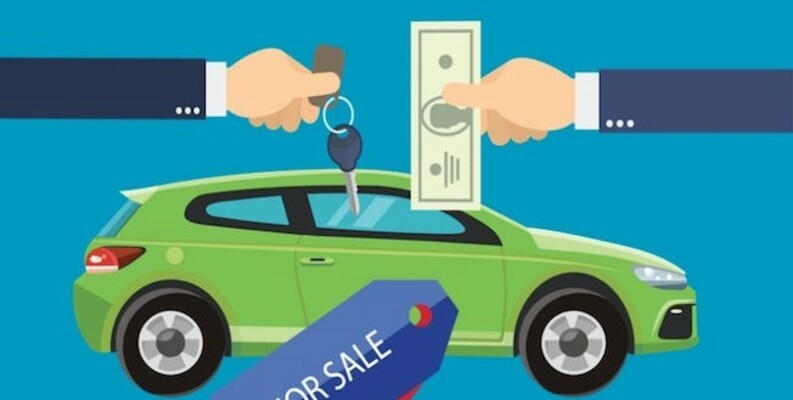

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv('/content/car_price_data.csv')

# Explanatory Data Analysis

In [ ]:
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [ ]:
df.tail()

ID  Price  Levy   Manufacturer    Model  Prod. year Category  \
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999    Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011    Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010     Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007     Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012    Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
19232              Yes       CNG     2.0 Turbo  300000 km          4   
19233              Yes    Petrol           2.4  161600 km          4   
19234              Yes    Diesel             2  116365 km          4   
19235              Yes    Diesel             2   51258 km          4   
19236              Yes    Hybrid           2.4  186923 km          4   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
19232        Manual         Rear  02-Mar  Left wheel  Silver        5  
19233     Tiptronic        Front  04-May  Left wheel     Red        8  
19234     Automatic        Front  04-May  Left wheel    Grey        4  
19235     Automatic        Front  04-May  Left wheel   Black        4  
19236     Automatic        Front  04-May  Left wheel   White       12

In [ ]:
df.shape

(19237, 18)

In [ ]:
df.columns

Index(['      ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df = df.drop(['Doors'], axis = 1)

In [ ]:
df.columns[0]

'      ID'

In [ ]:
df = df.drop(['      ID'], axis = 1)

In [ ]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df.duplicated().sum()

3512

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             15725 non-null  int64 
 1   Levy              15725 non-null  object
 2   Manufacturer      15725 non-null  object
 3   Model             15725 non-null  object
 4   Prod. year        15725 non-null  int64 
 5   Category          15725 non-null  object
 6   Leather interior  15725 non-null  object
 7   Fuel type         15725 non-null  object
 8   Engine volume     15725 non-null  object
 9   Mileage           15725 non-null  object
 10  Cylinders         15725 non-null  int64 
 11  Gear box type     15725 non-null  object
 12  Drive wheels      15725 non-null  object
 13  Wheel             15725 non-null  object
 14  Color             15725 non-null  object
 15  Airbags           15725 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.0+ MB


In [ ]:
df.describe()

Price    Prod. year     Cylinders       Airbags
count  1.572500e+04  15725.000000  15725.000000  15725.000000
mean   2.027944e+04   2010.518919      4.483561      6.543339
std    2.106390e+05      6.012122      1.134466      4.067728
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    7.527000e+03   2008.000000      4.000000      4.000000
50%    1.416600e+04   2012.000000      4.000000      6.000000
75%    2.336400e+04   2014.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

 **Description** is only for numerical attributes \\
 Q = Quartile or Quantile ,
 IQR = Inter Quartile Range = Q3 - Q1 \\
 25% - Q1 - A point at which below this 25% of data is present \\
 50% - Q2 - A point at which below this 50% of data is present \\
 75% - Q3 - A point at which below this 75% of data is present \\

 **Turkish Rule / 1.5 Rule** --> if any point is less than (Q1 - 1.5 IQR) or more than (Q3 + 1.5 IQR) is said to be an **outlier**

In [ ]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

Numerical type columns:
Index(['Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')


# Data Cleaning

In [ ]:
df['Levy'] = df['Levy'].replace('-', pd.NA)

In [ ]:
median_levy = df['Levy'].dropna().astype(int).median()

In [ ]:
df['Levy'] = df['Levy'].fillna(median_levy)

In [ ]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '', regex=False)

In [ ]:
df['Mileage'] = df['Mileage'].str.replace(' km', '')

In [ ]:
df['Drive wheels'] = df['Drive wheels'].replace('4x4', 'All-wheel drive')

In [ ]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

In [ ]:
df

Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19230              Yes    Hybrid            1.8   307325          4   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  
0         Automatic  All-wheel drive        Left wheel  Silver       12  
1         Tiptronic  All-wheel drive        Left wheel   Black        8  
2          Variator            Front  Right-hand drive   Black        2  
3         Automatic  All-wheel drive        Left wheel   White        0  
4         Automatic            Front        Left wheel  Silver        4  
...             ...              ...               ...     ...      ...  
19230     Automatic            Front        Left wheel  Silver       12  
19232        Manual             Rear        Left wheel  Silver        5  
19233     Tiptronic            Front        Left wheel     Red        8  
19234     Automatic            Front        Left wheel    Grey        4  
19236     Automatic            Front        Left wheel   White       12  

[15725 rows x 16 columns]

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

Numerical type columns:
Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')


**Univariate** \\
    1. Discrete - count plot, pie plot \\
    2. Continuous - hist plot, dist plot, boxplot, violin plot, boxer plot \\
    3. Categorical - count plot, pie plot \\
**Bivariate** \\
    1. Continuous V/S Continuous - Scatter plot, line plot
    2. Categorical V/S Continuous - bar plot, box plot




**Under fitting** \\
**Over fitting** \\
**Best fit** - if all the points of prediction come over actual, that is the best fit , In ML we can't get 100% accuracy. \\
We just want a good fit. \\
--> If variance is high (data distribution is away from mean) - model score is high , accuracy is less \\
--> If Bias is high - model score is less, accuracy is less \\
So generalized model is required which is a good fit.


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Non-Categorical Features: ['Manufacturer', 'Model']
Discrete Features: ['Cylinders', 'Airbags']
Continuous Features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']


**VARIANCE | BIAS** \\
High | High ====> \\
Low | Low ===> \\
High | Low ===> over fitting \\
Low | High ===> undervfitting

# Data Visualization

In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Cylinders
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]

Airbags
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

Cylinders
4     12279
6      2429
8       605
5       165
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64

Airbags
4     5104
12    3963
8     1566
0     1393
6     1288
2     1047
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64



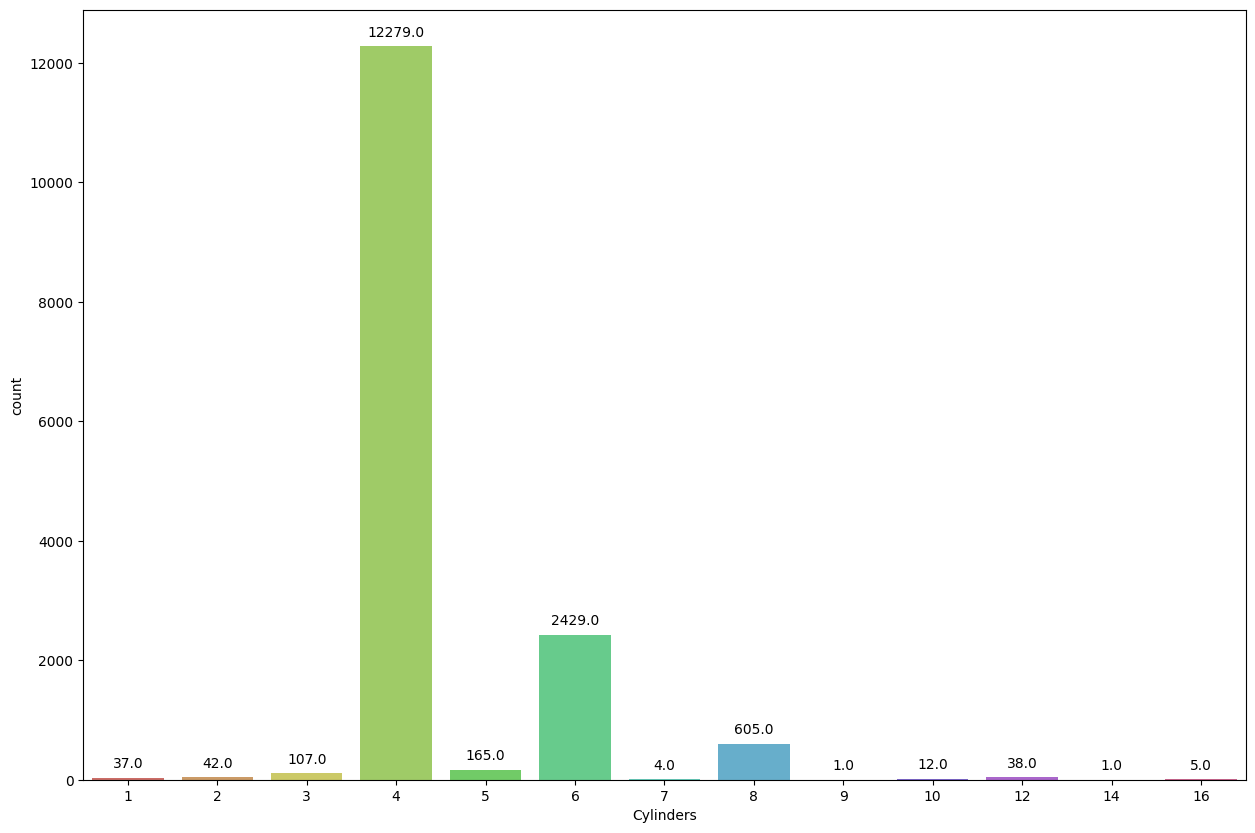

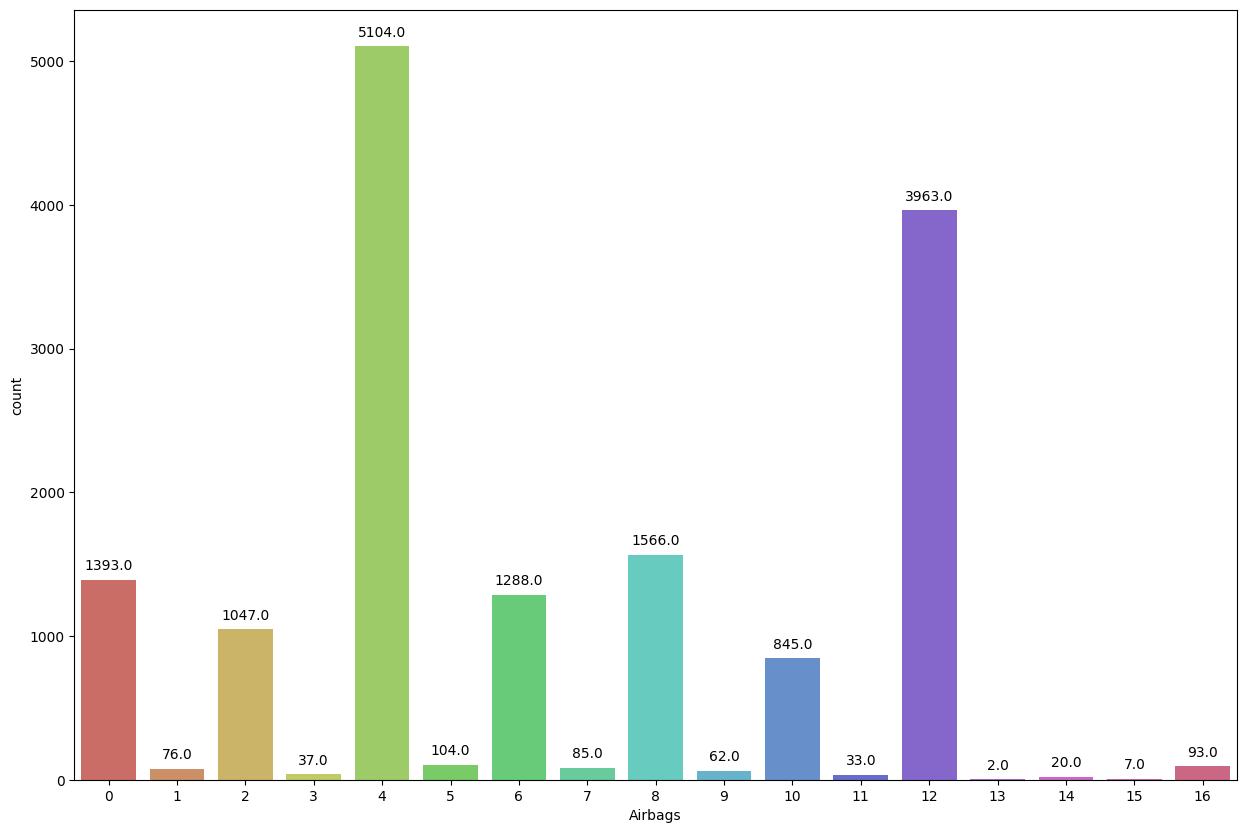

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

Refer Seaborn tutorial \\
Tower/ bins --> annotate

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Category
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather interior
['Yes' 'No']

Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Gear box type
['Automatic' 'Tiptronic' 'Variator' 'Manual']

Drive wheels
['All-wheel drive' 'Front' 'Rear']

Wheel
['Left wheel' 'Right-hand drive']

Color
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Category
Category
Sedan          7010
Jeep           4225
Hatchback      2548
Minivan         534
Coupe           476
Universal       311
Microbus        295
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

Leather interior
Leather interior
Yes    10558
No      5167
Name: count, dtype: int64

Fuel type
Fuel type
Petrol            8824
Diesel            3209
Hybrid            2424
LPG                714
CNG                468
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

Gear box type
Gear box type
Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: count, dtype: int64

Drive wheels
Drive wheels
Front              10990
All-wheel drive     2766
Rear                1969
Name: count, dtype: int64

Wheel
Wheel
Left wheel          14293
Right-hand drive     1432
Name: count, dtype: int64

Color
Color
Black            3835
White            3611
Silver           3149
Grey        

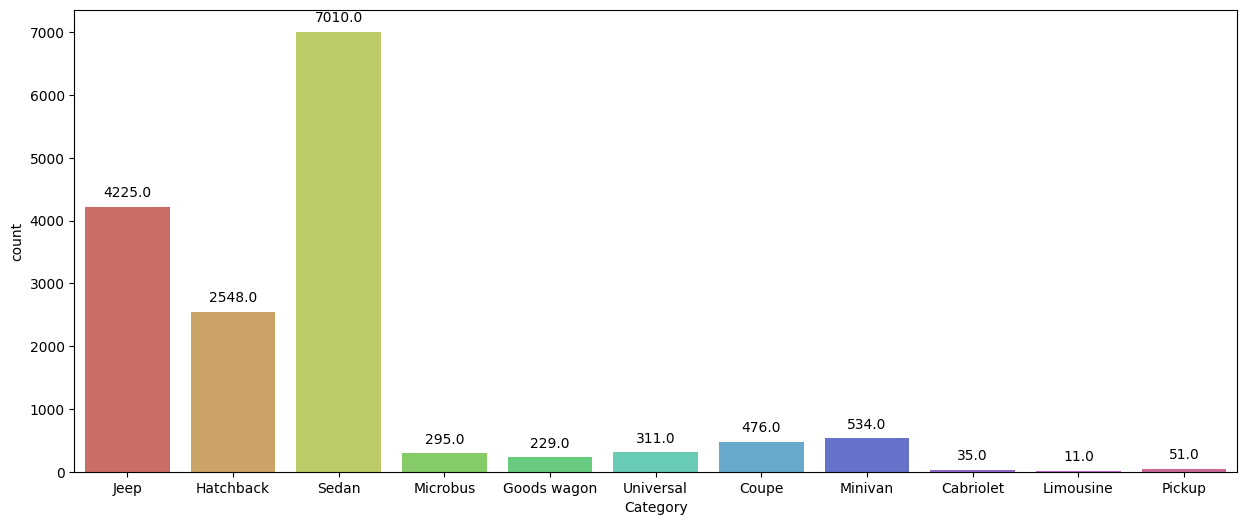

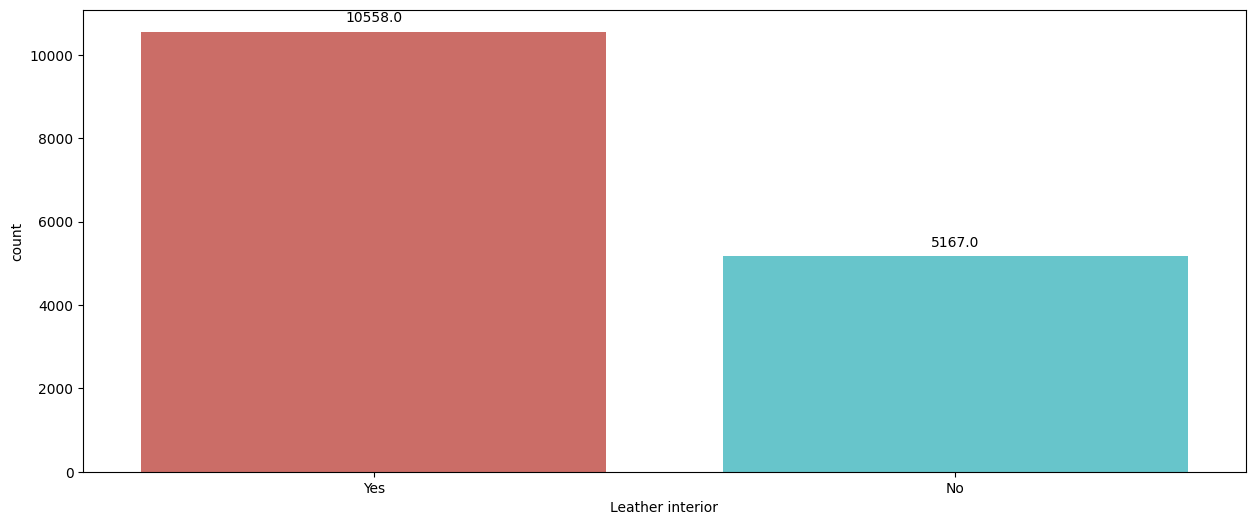

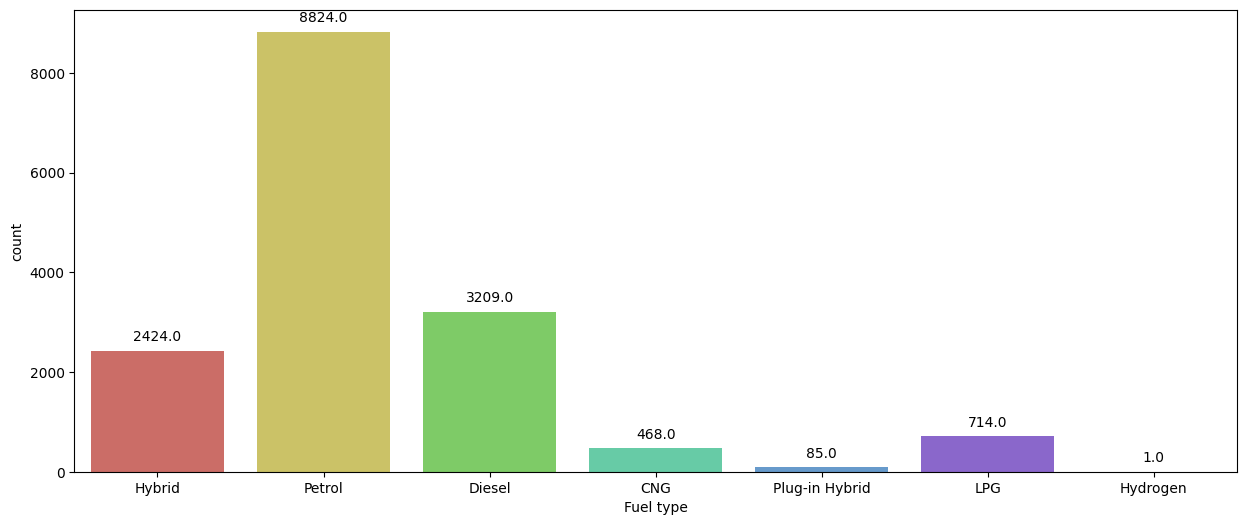

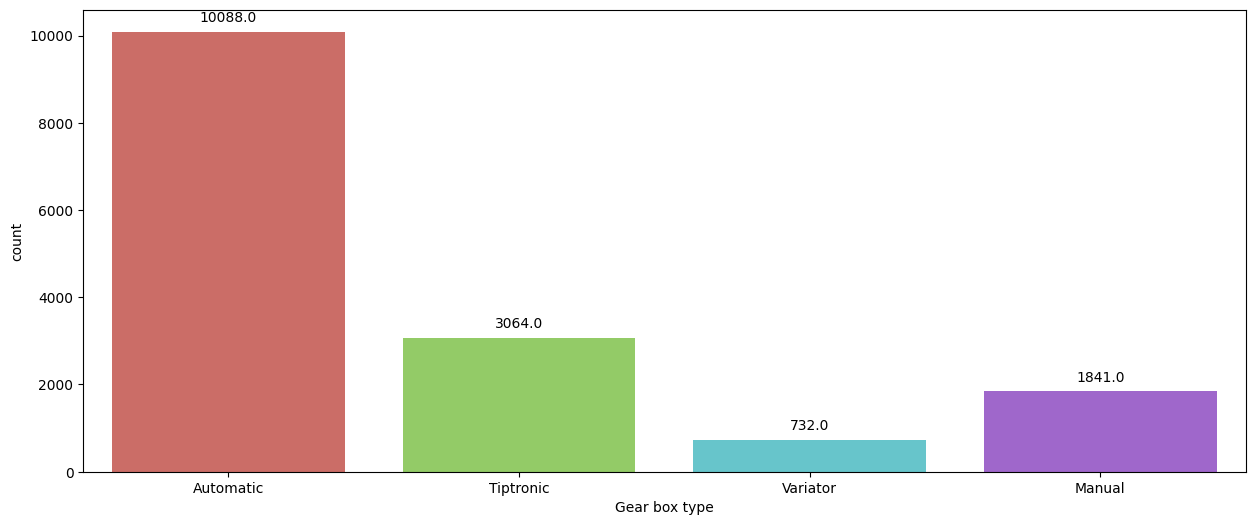

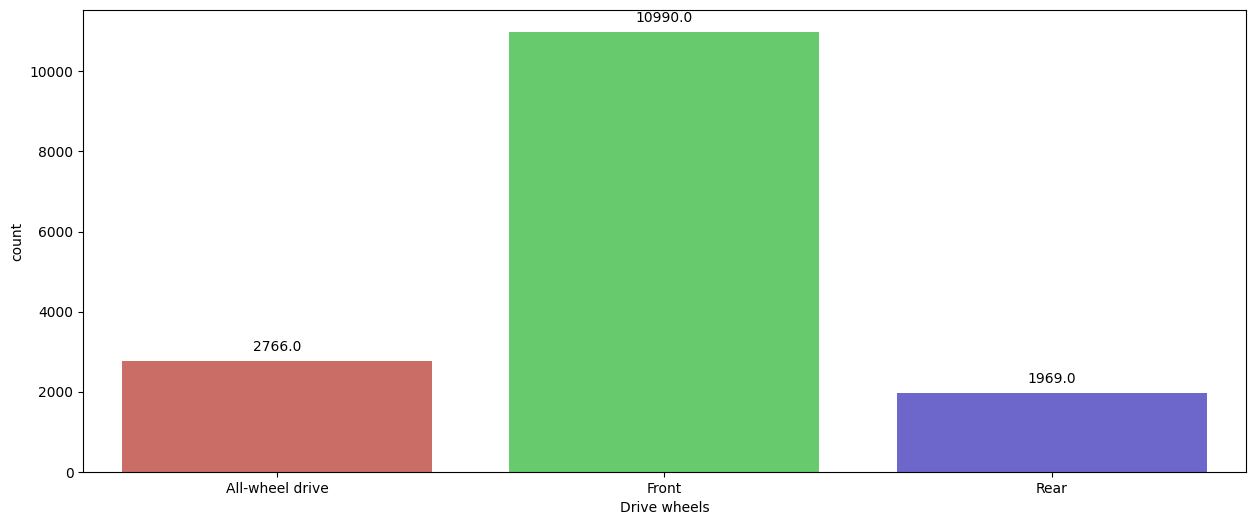

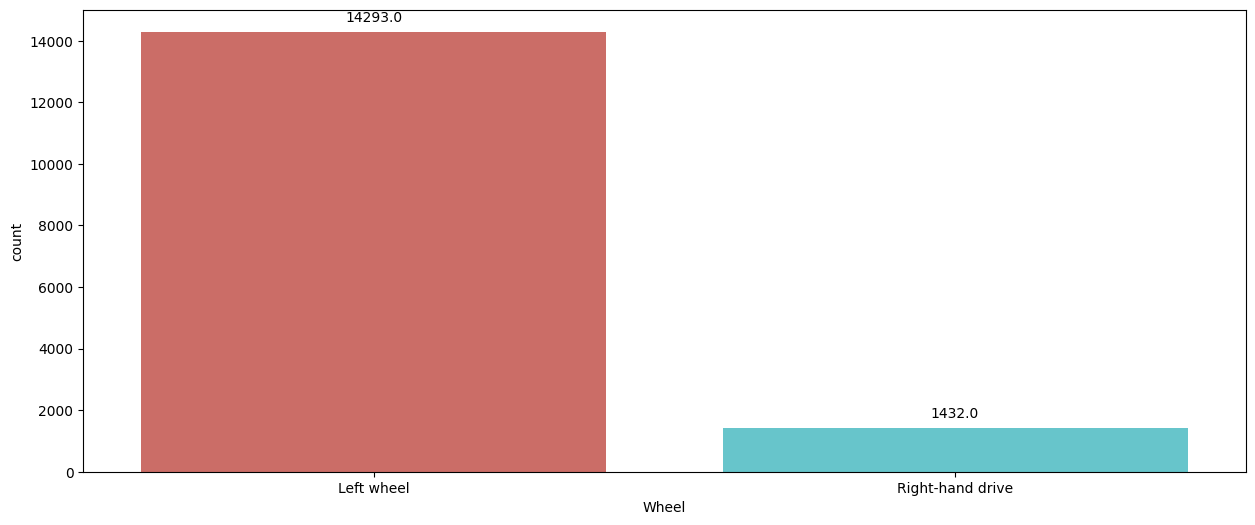

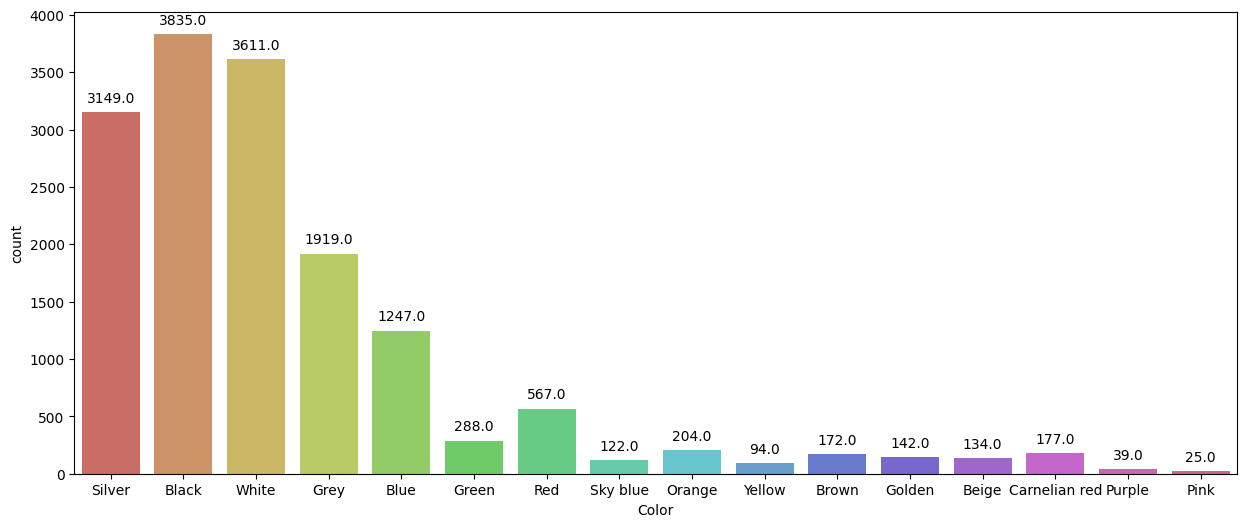

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

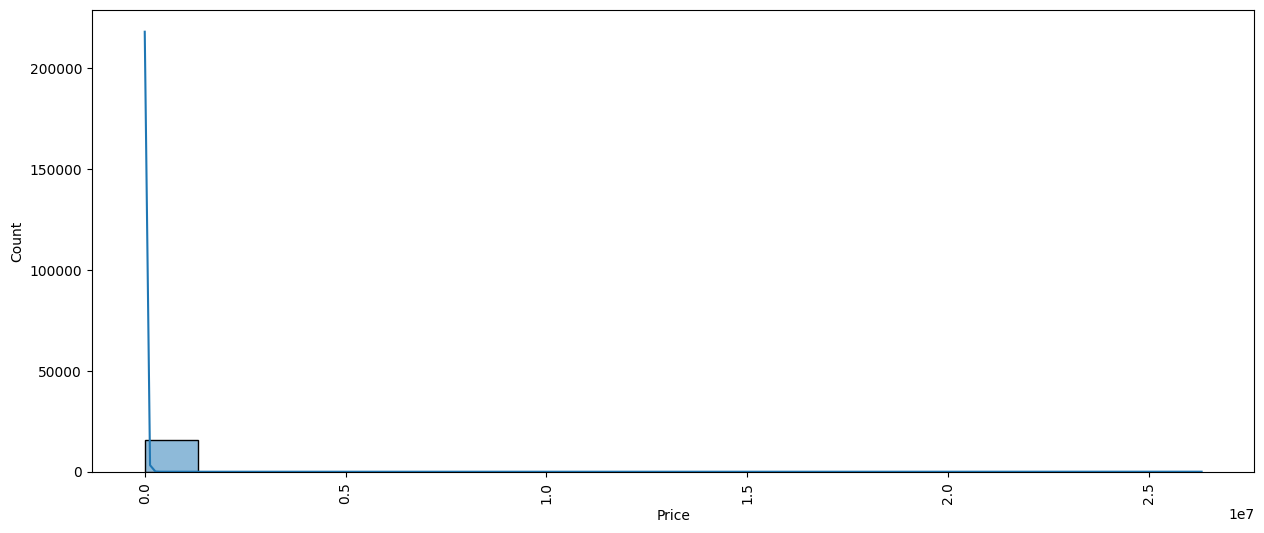

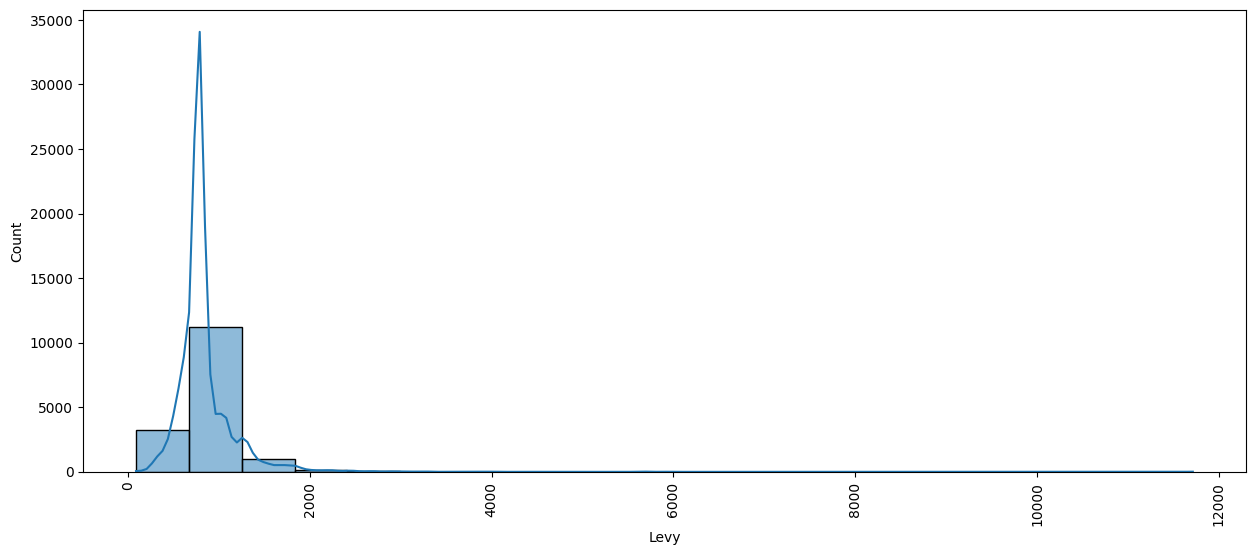

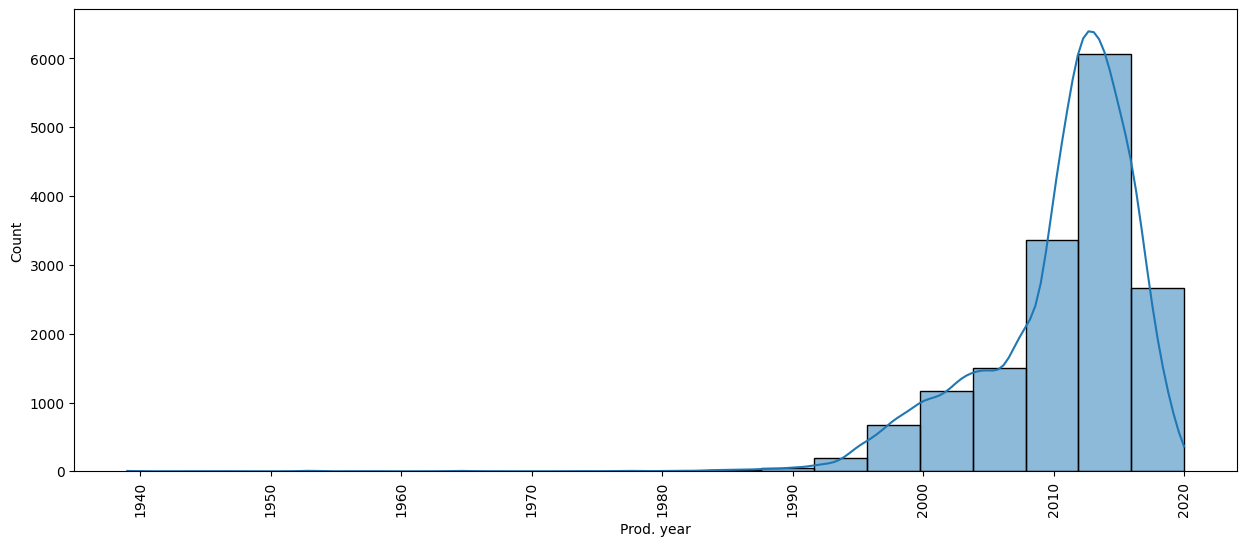

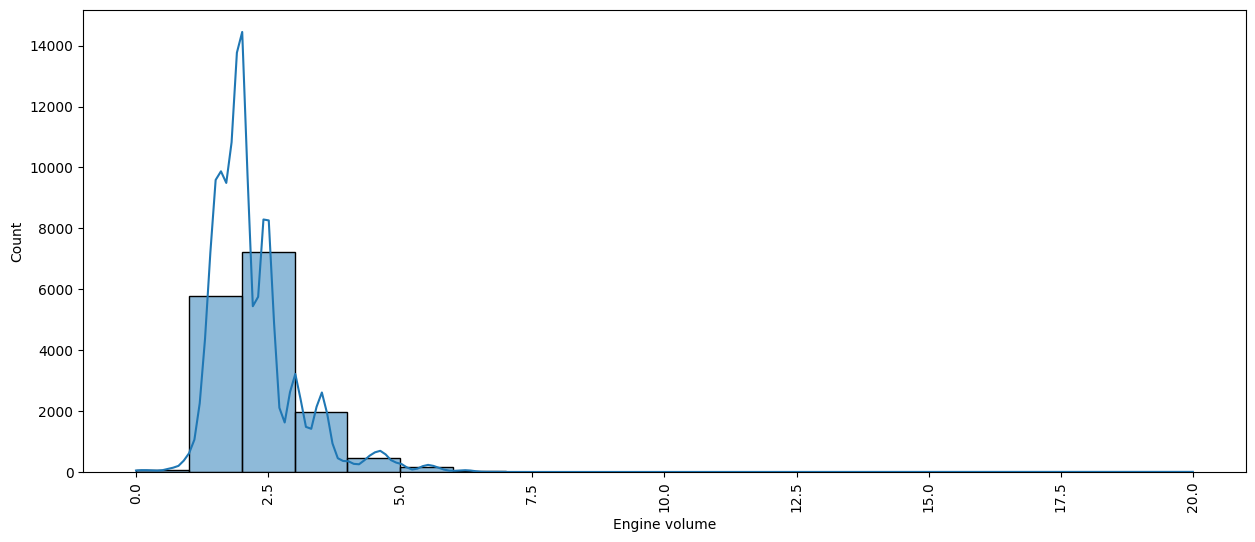

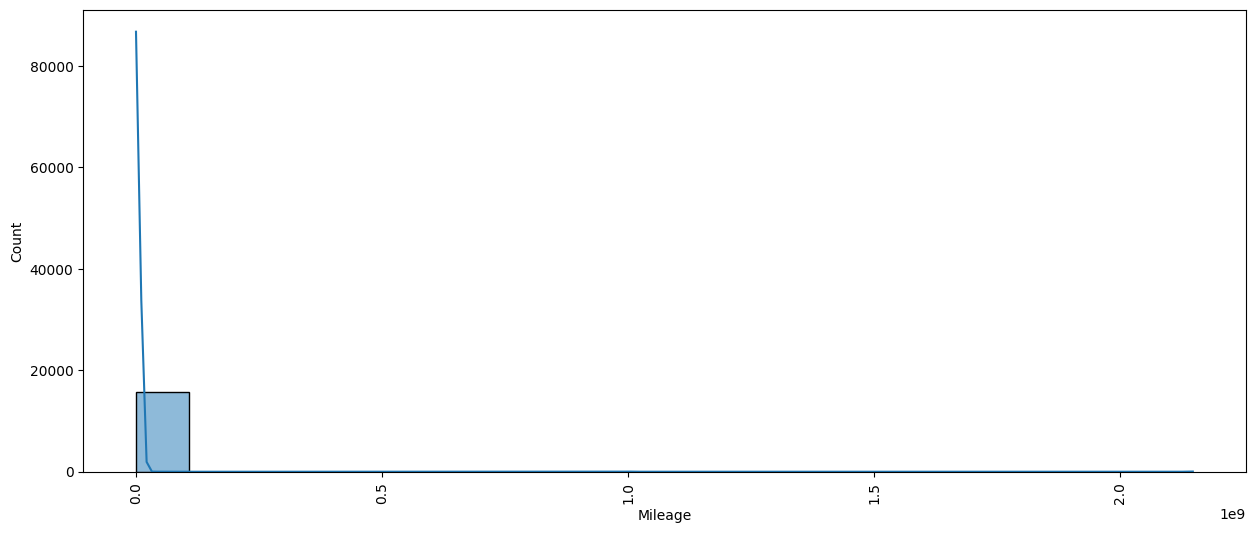

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

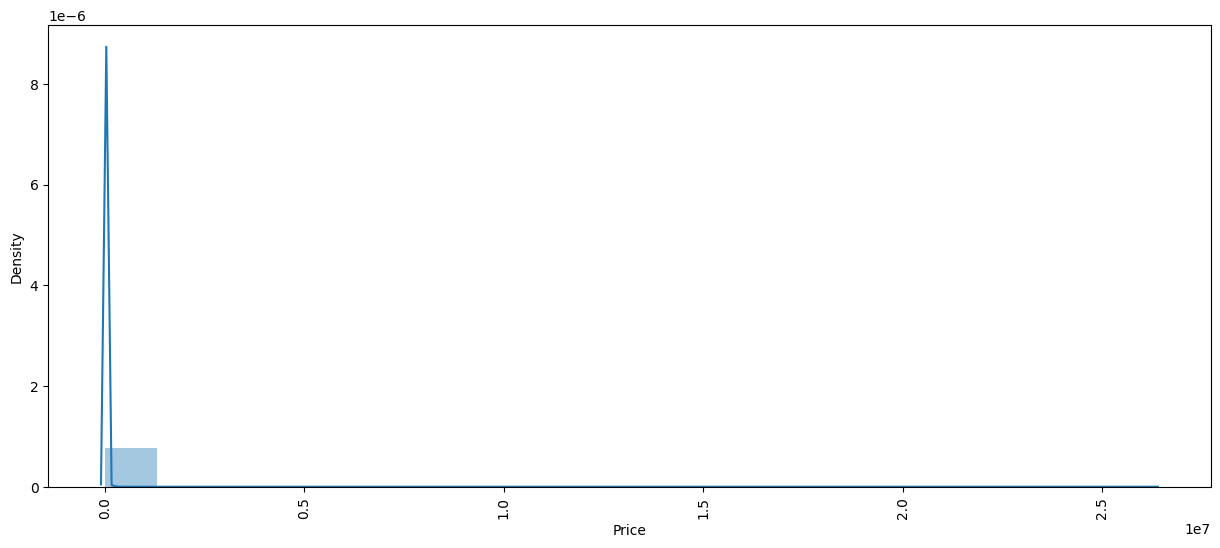

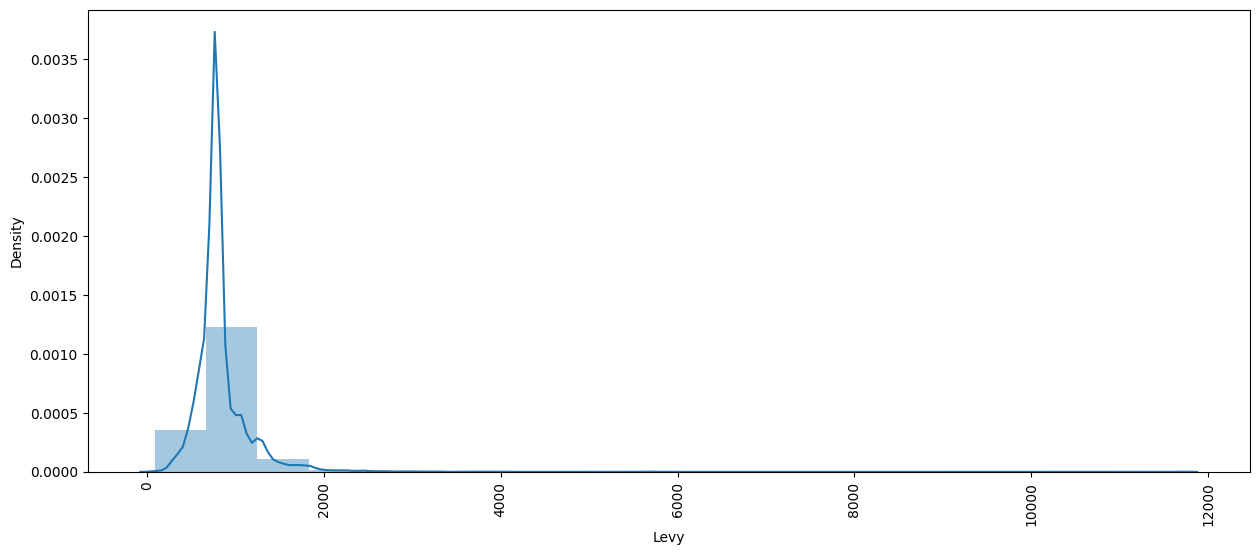

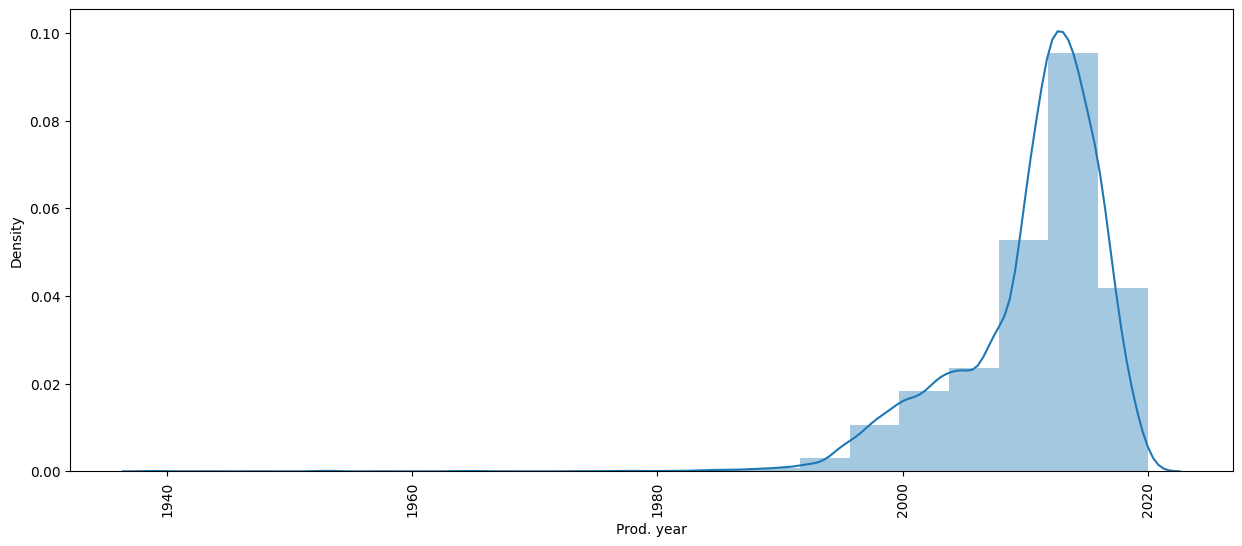

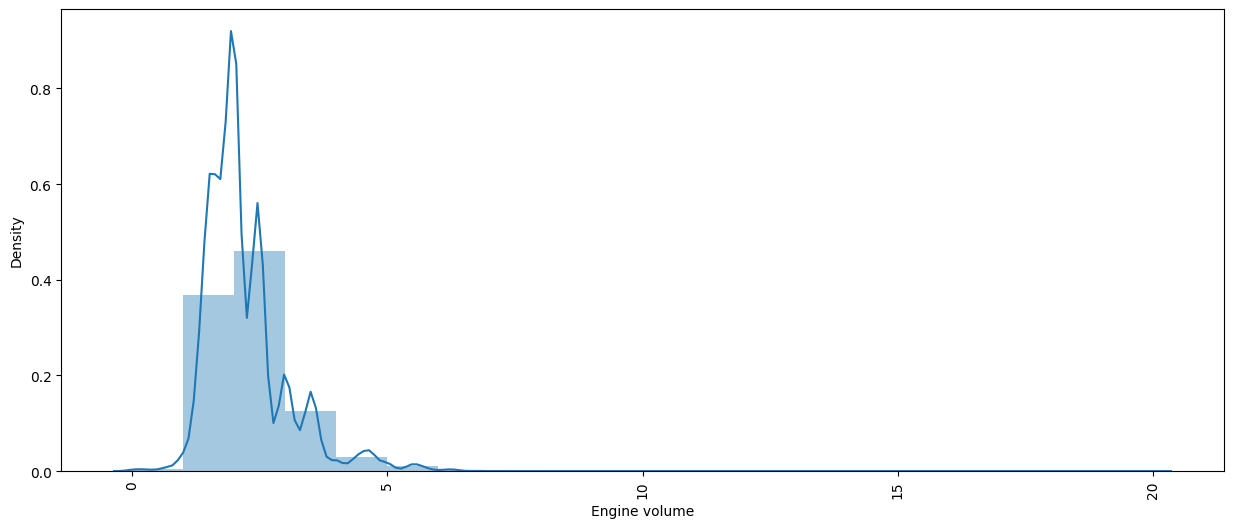

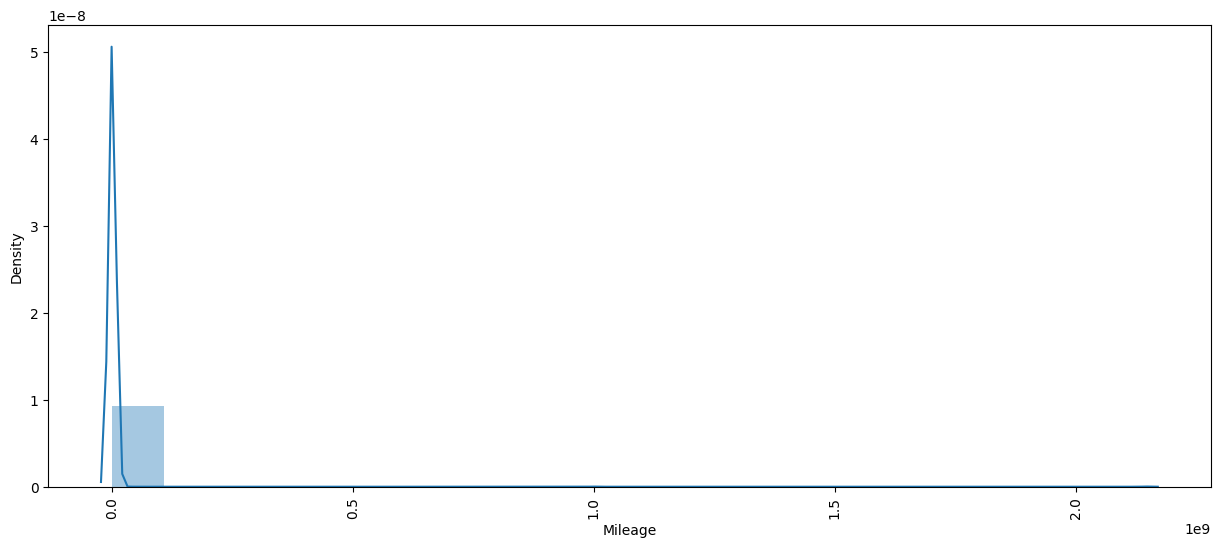

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

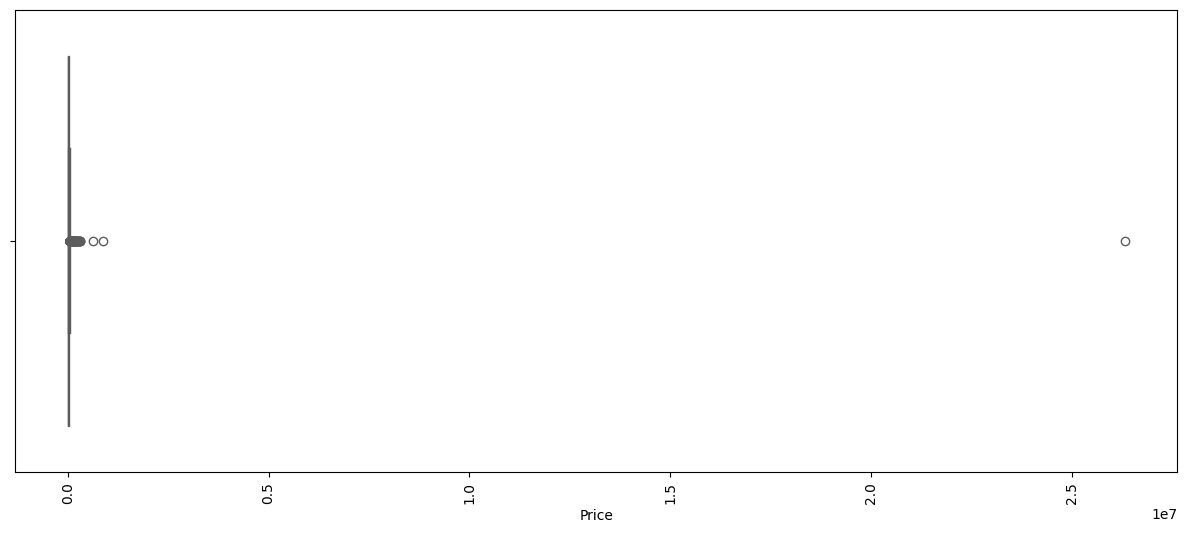

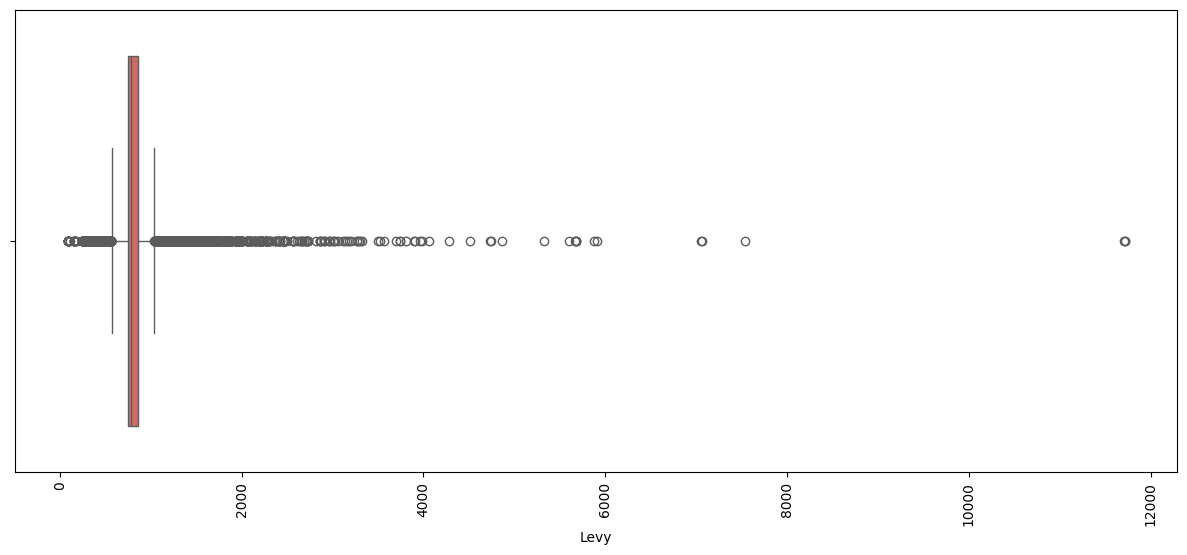

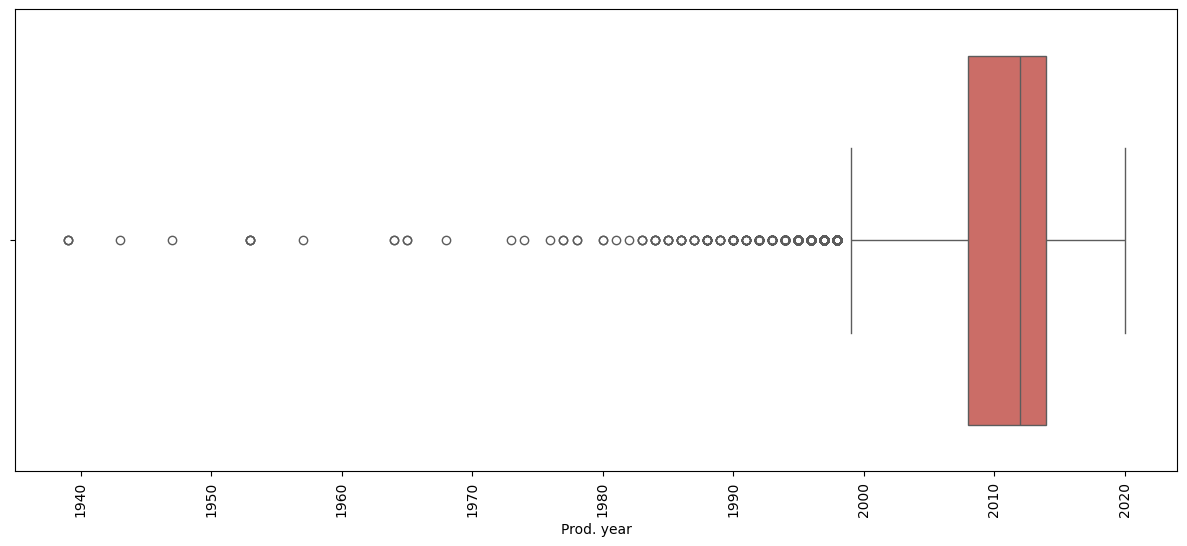

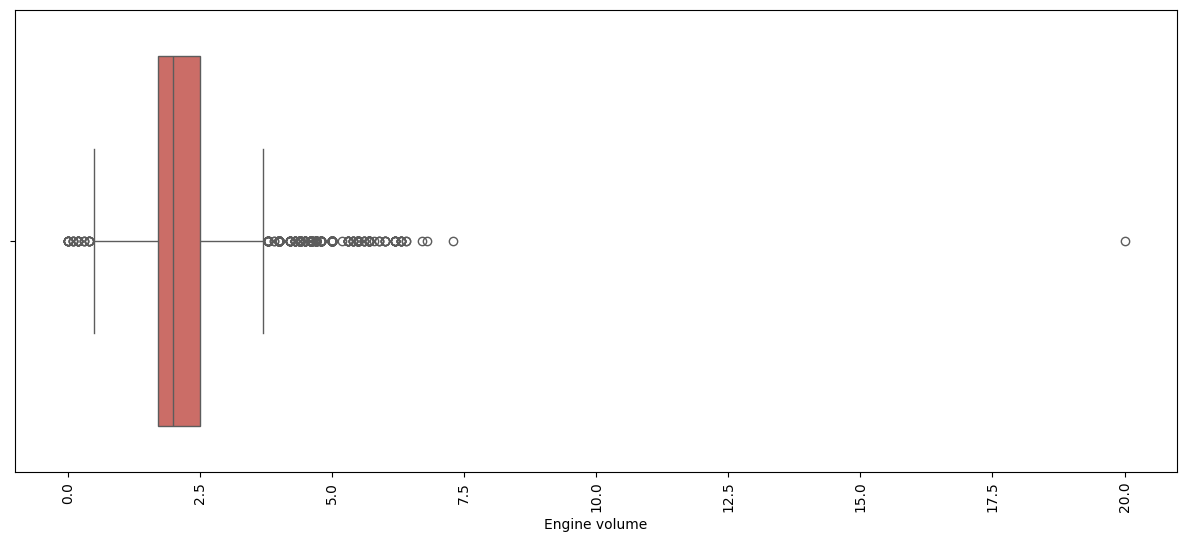

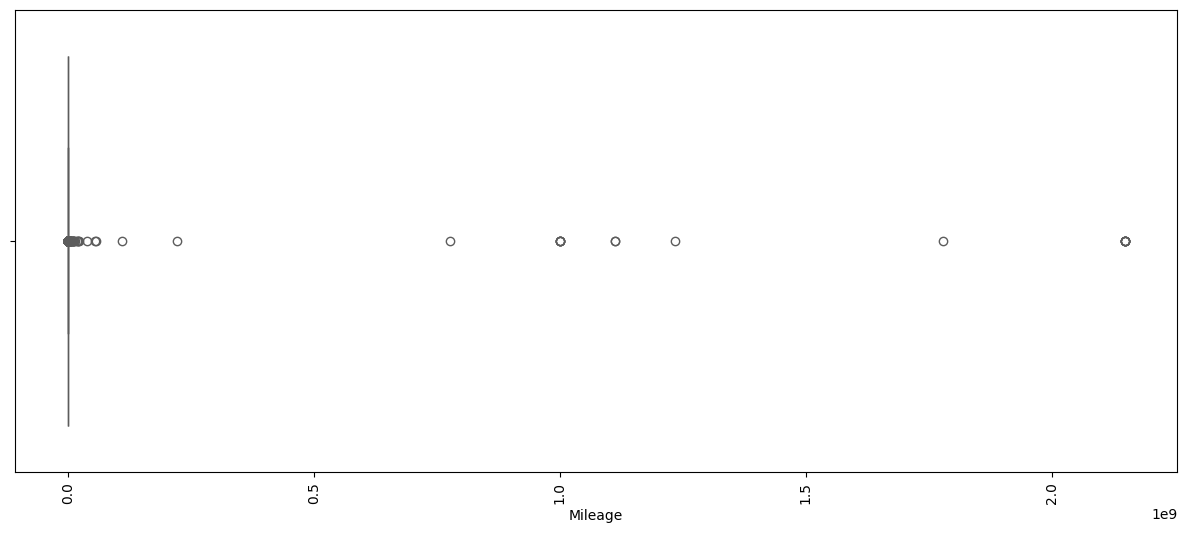

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

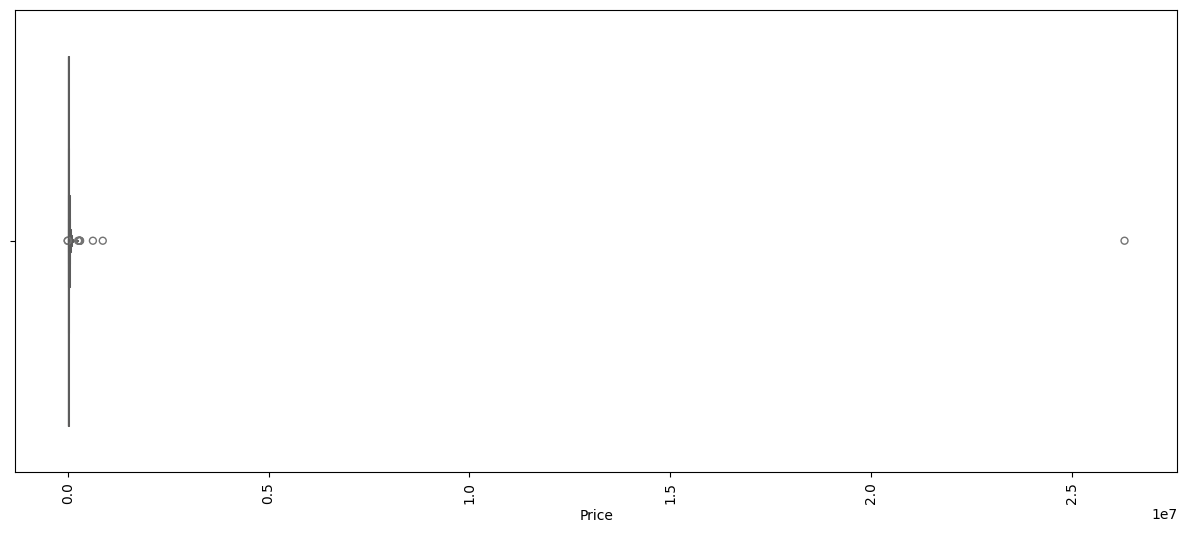

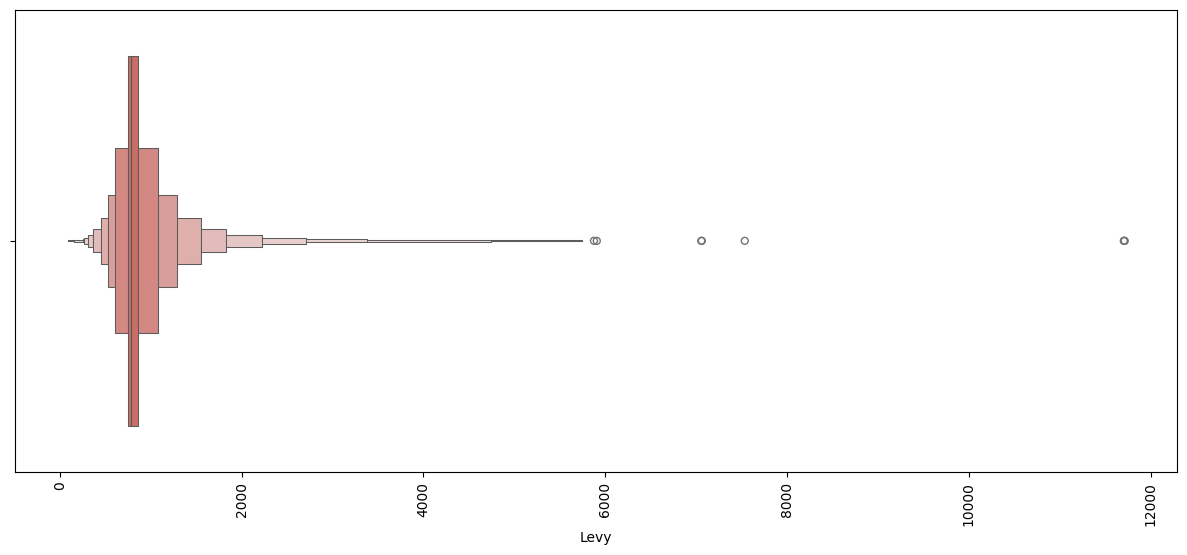

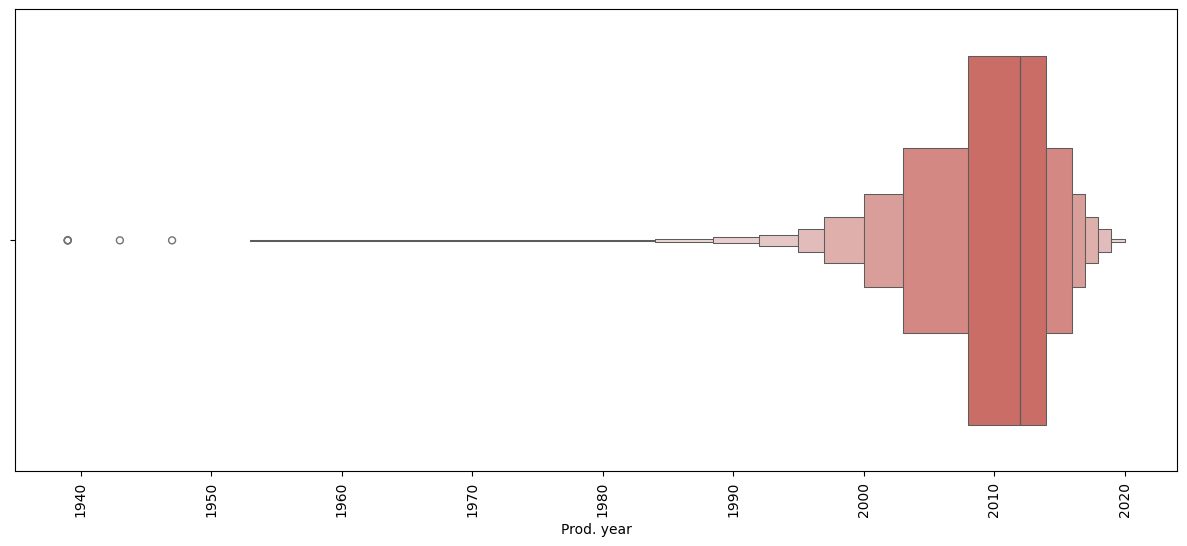

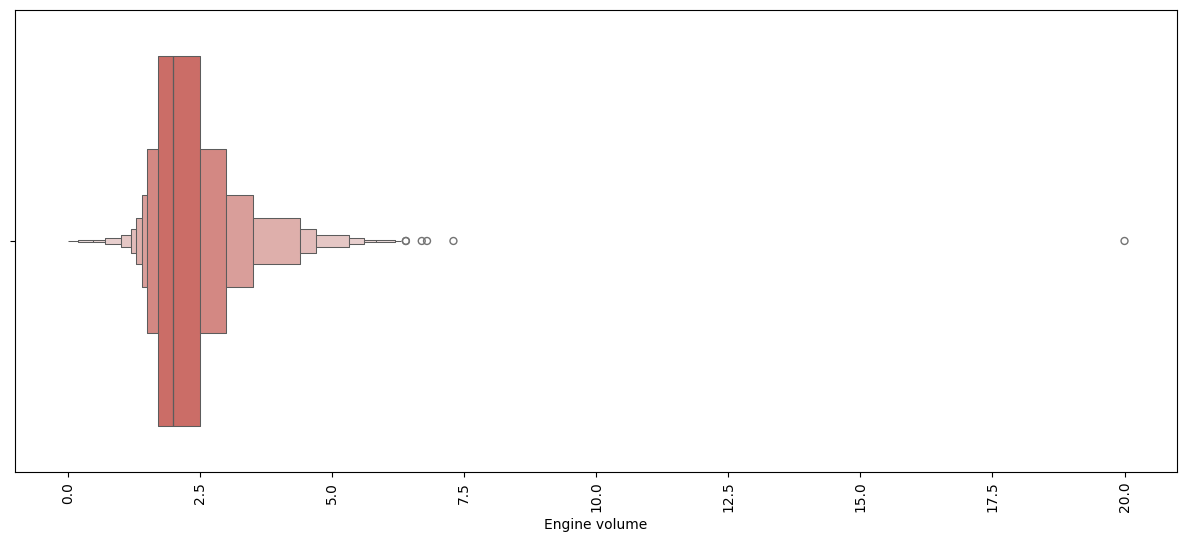

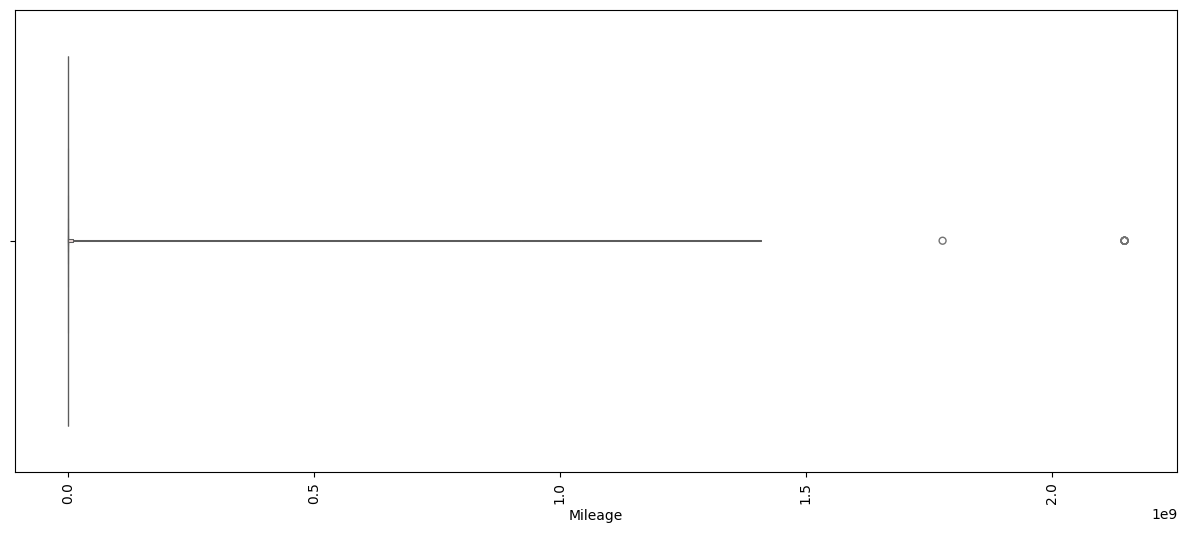

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

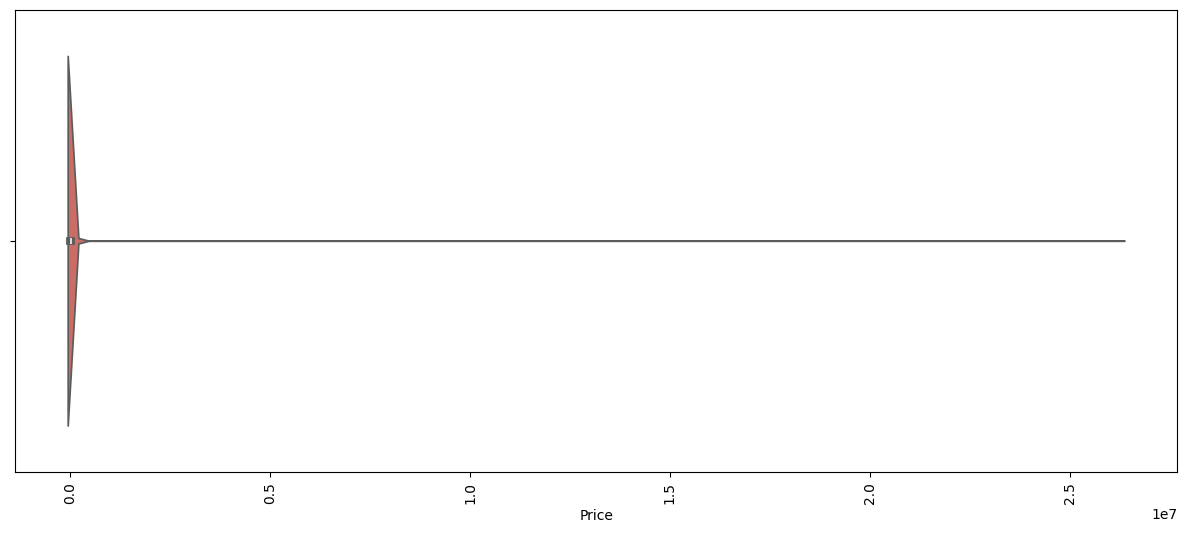

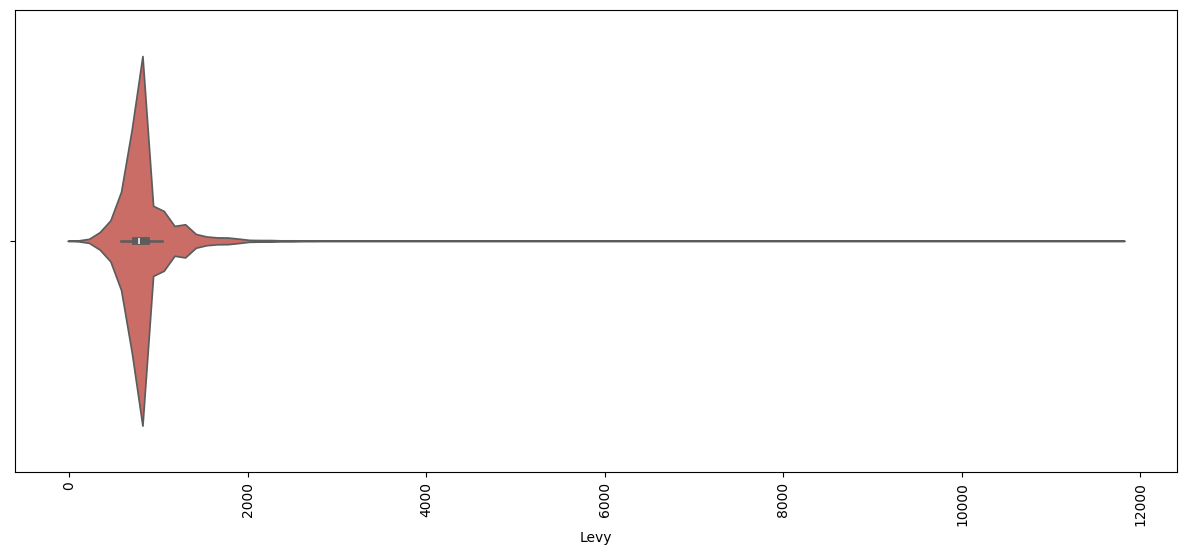

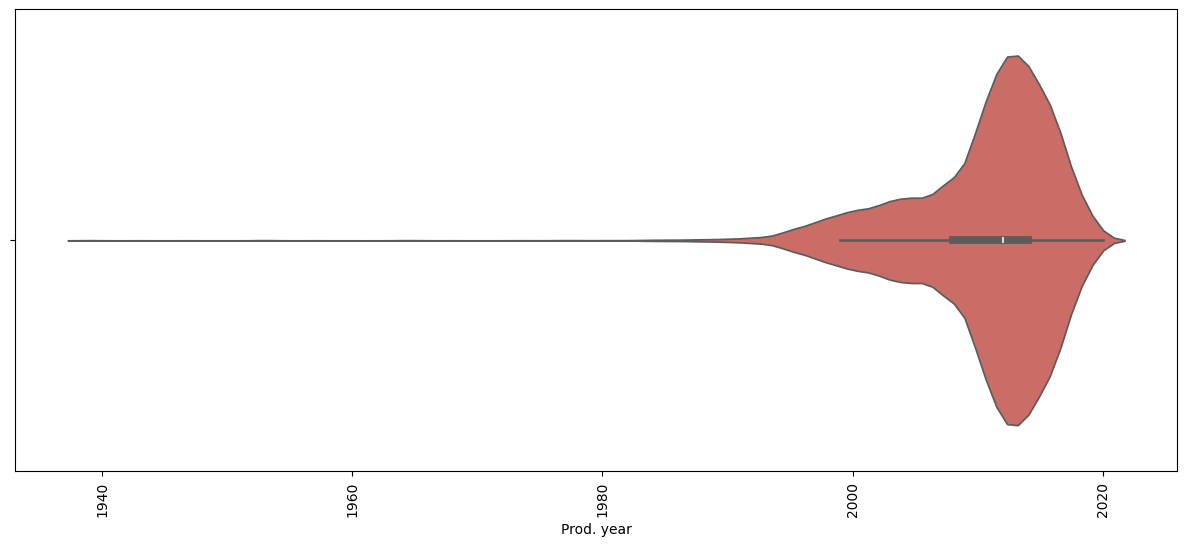

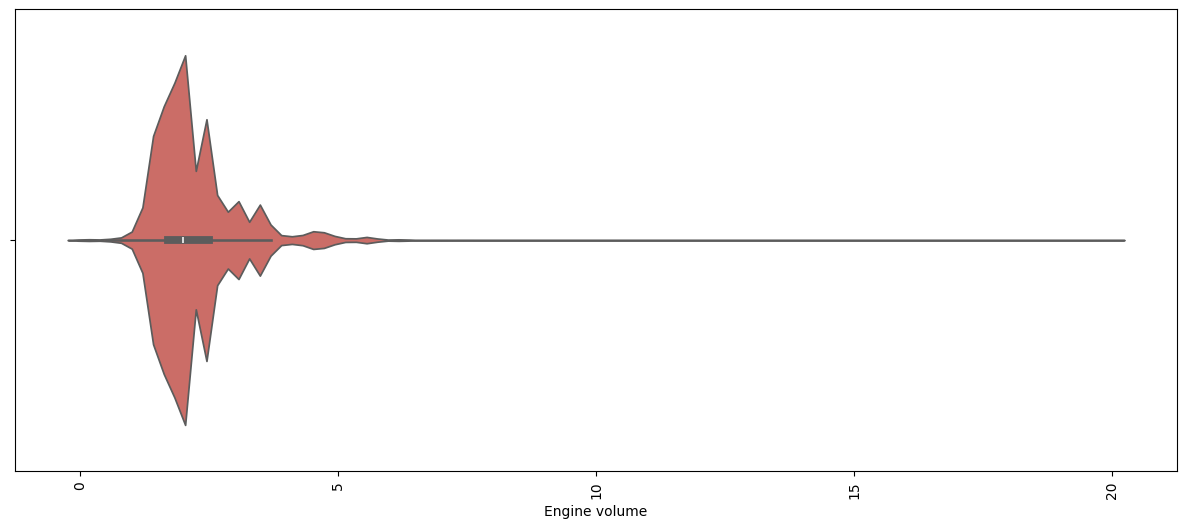

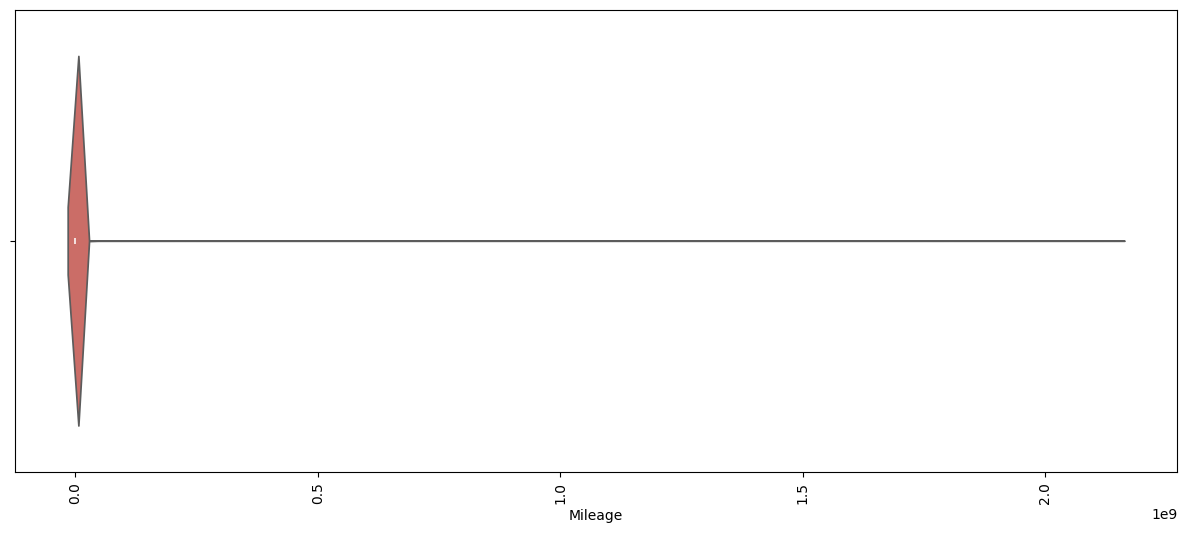

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

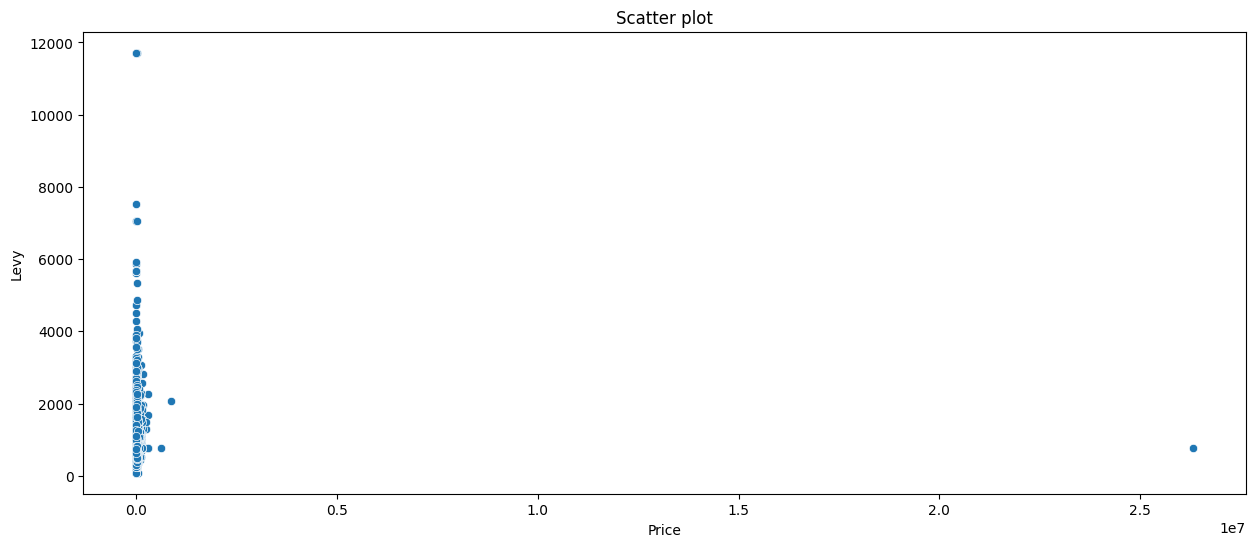

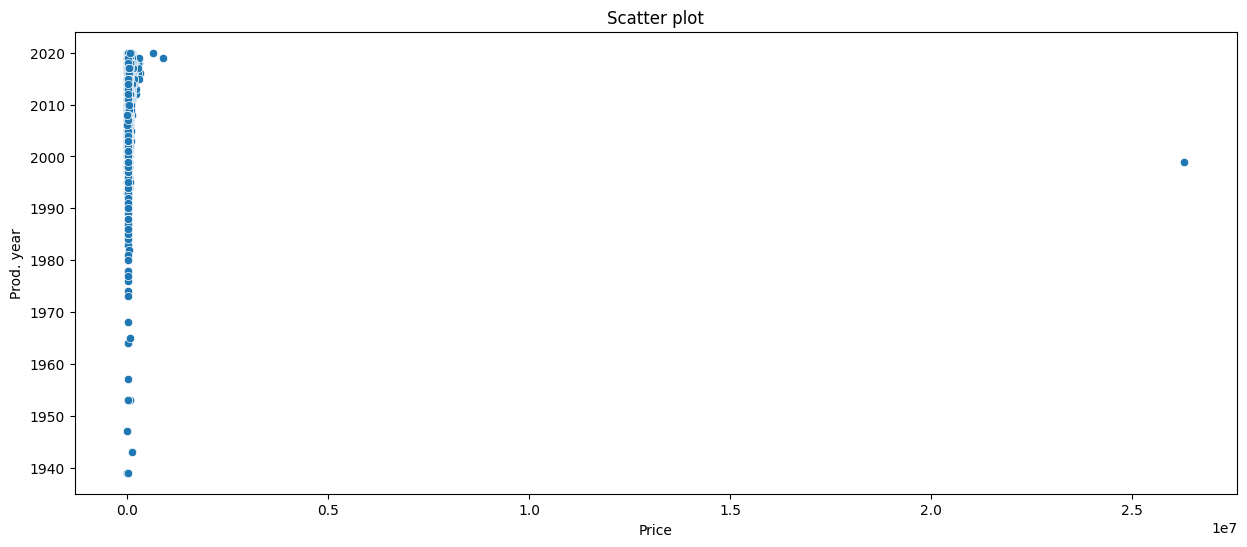

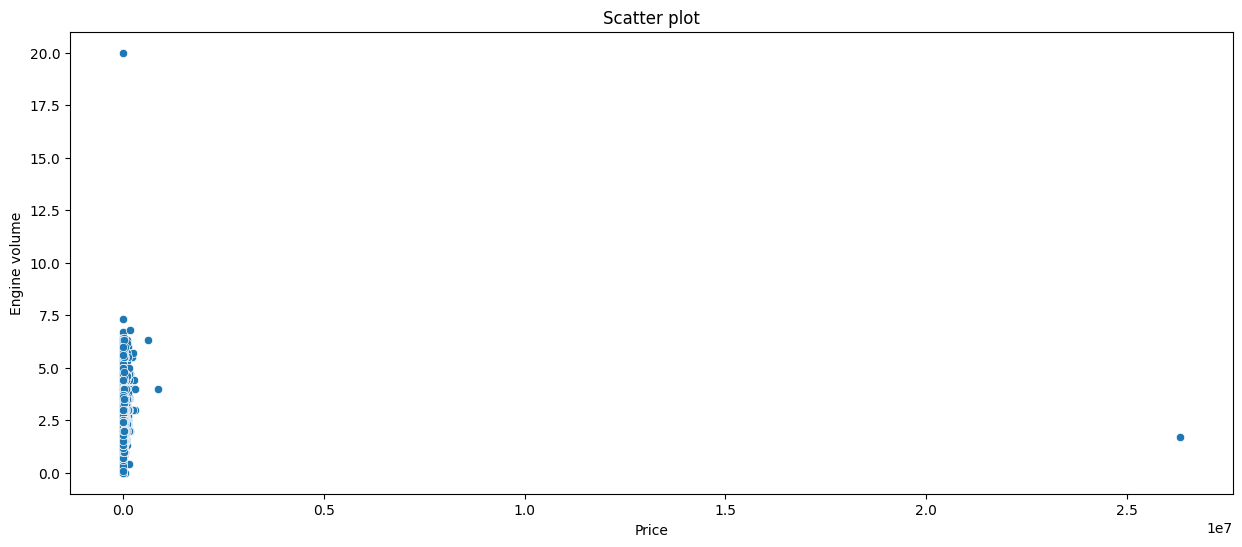

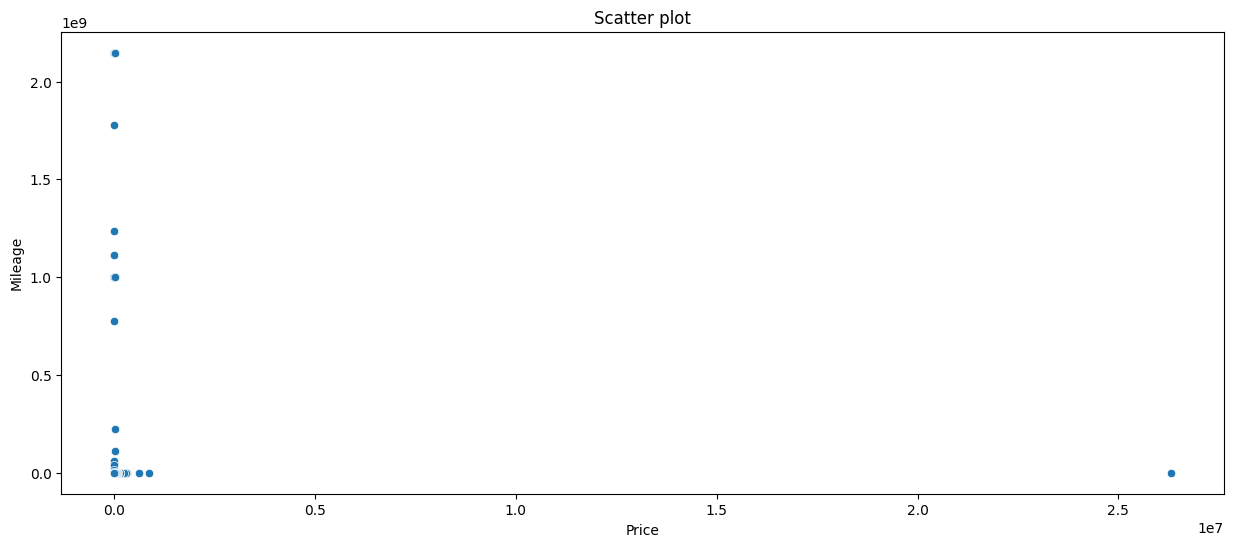

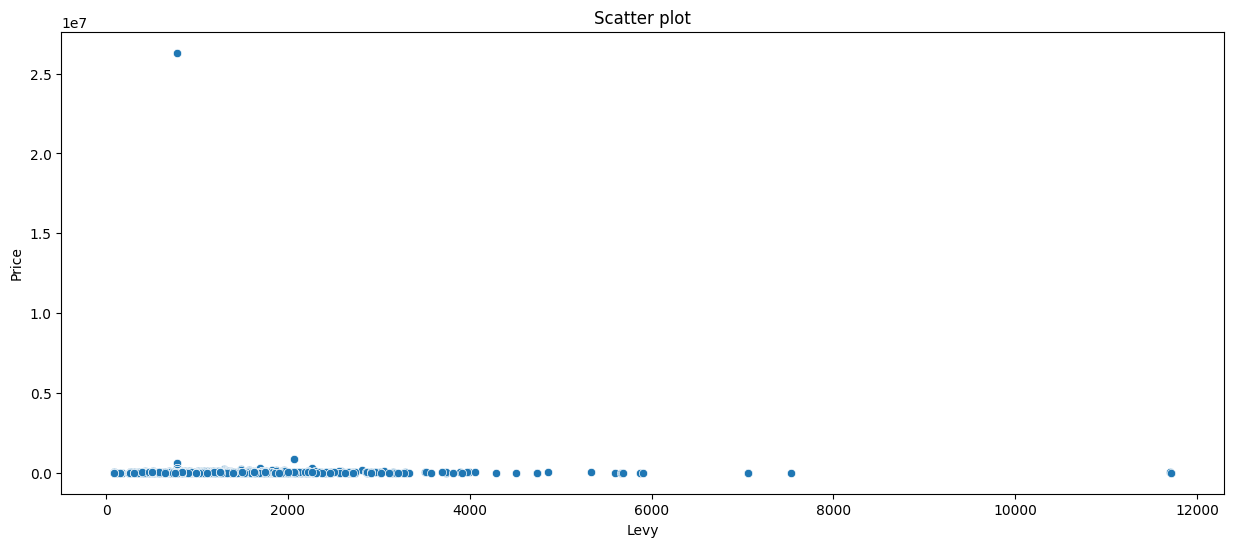

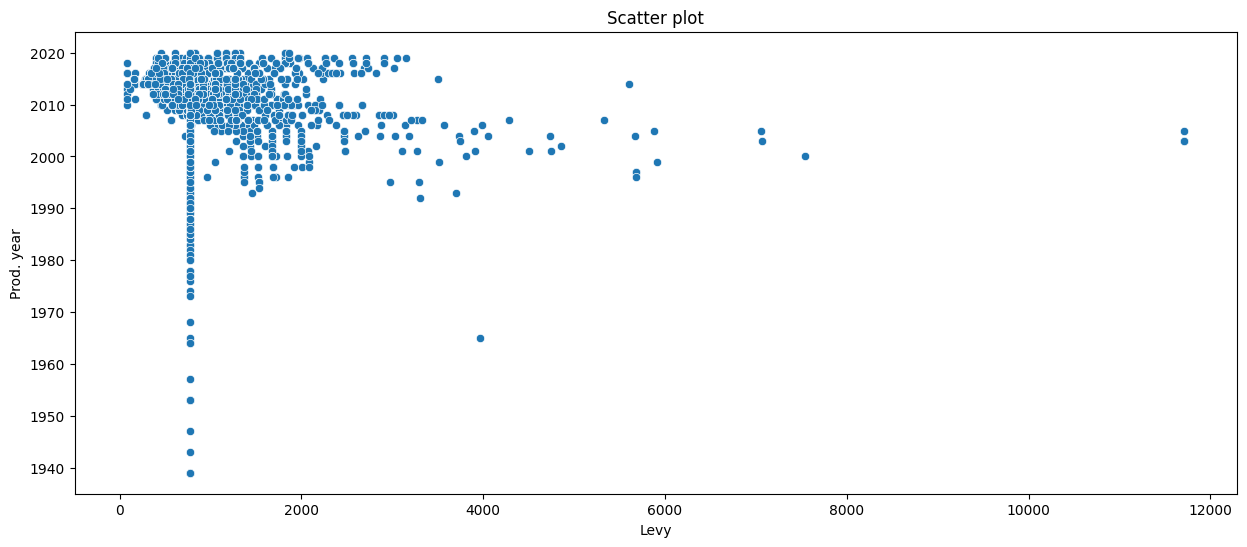

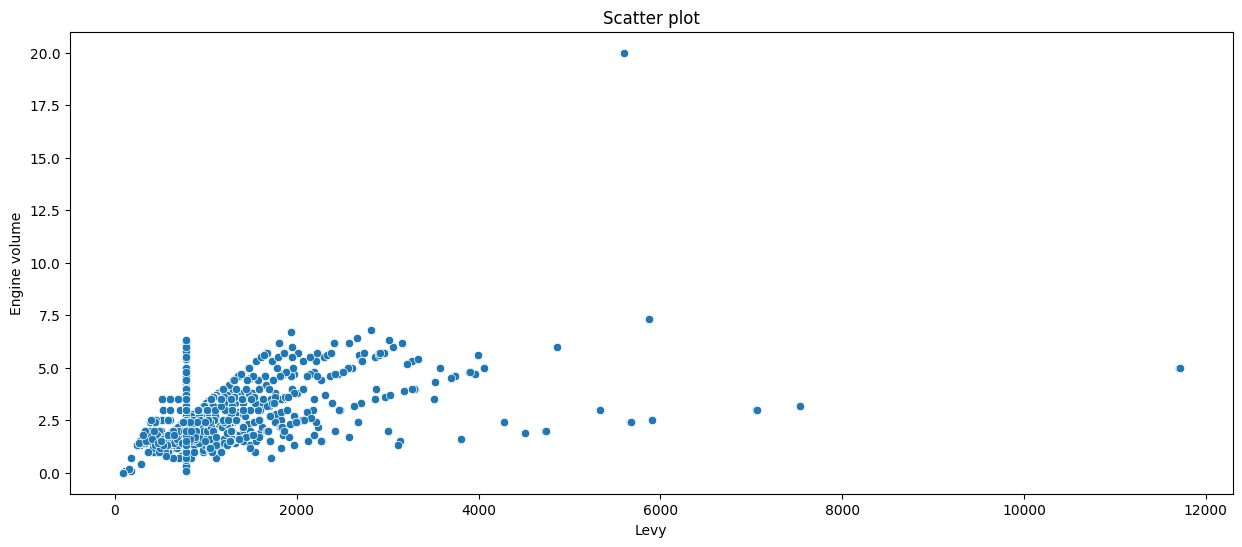

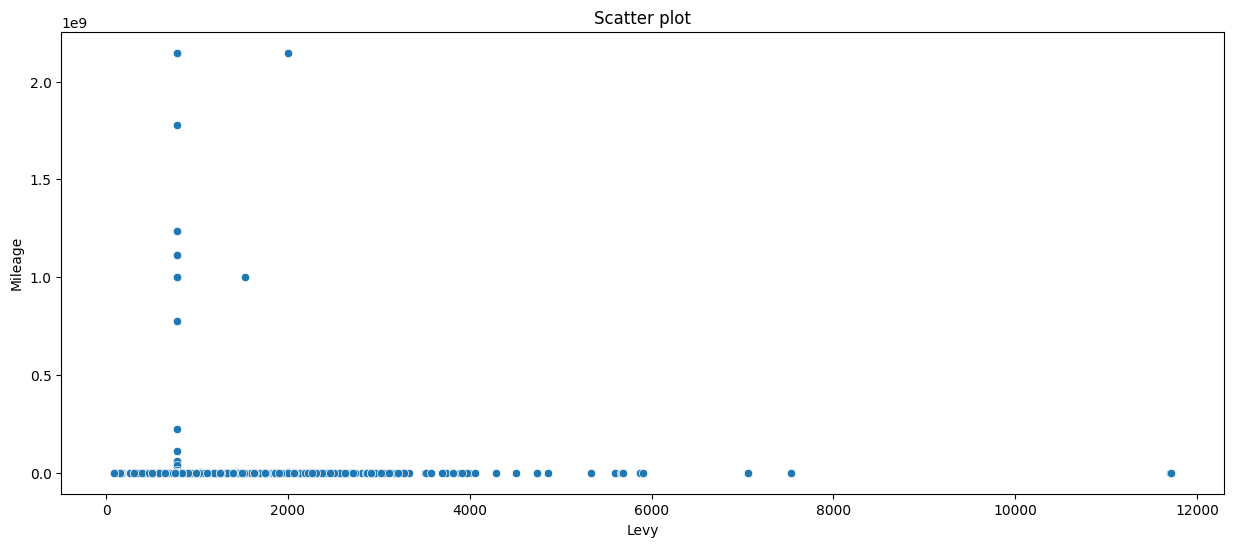

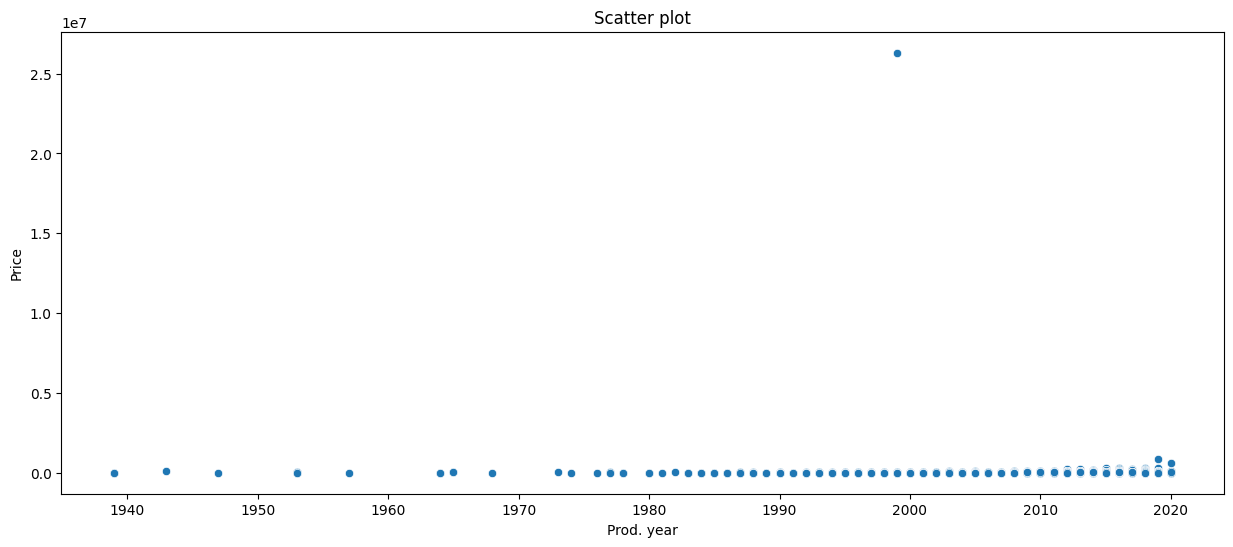

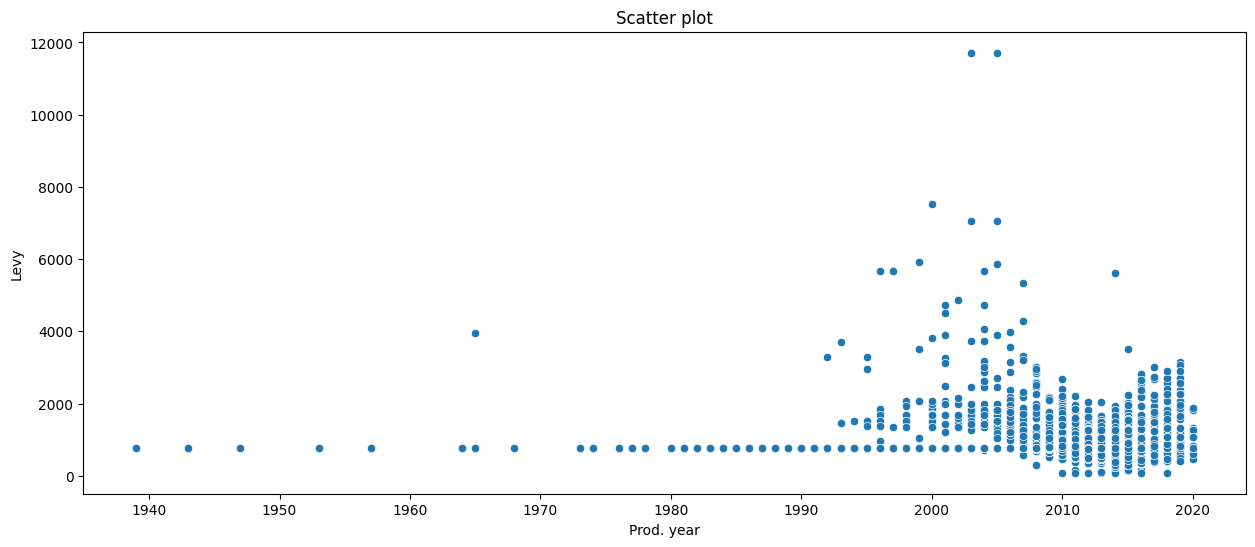

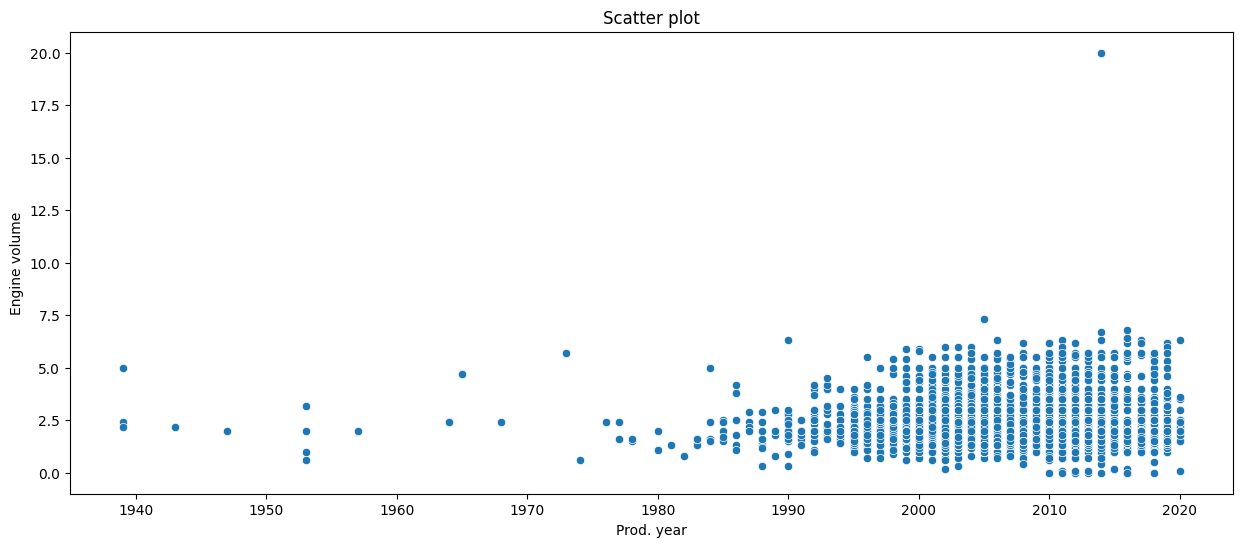

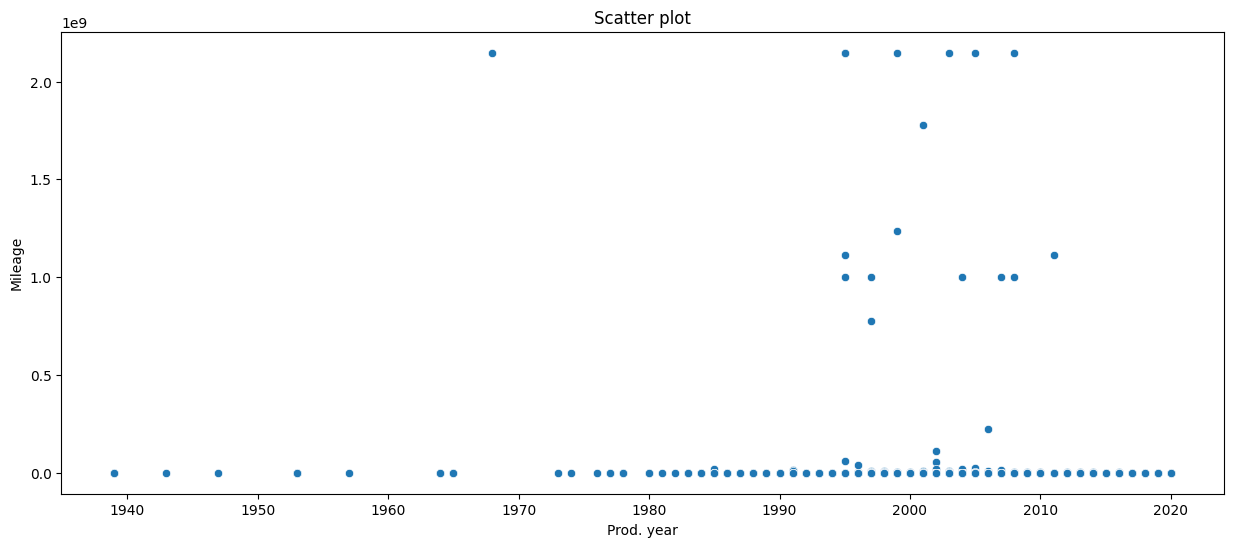

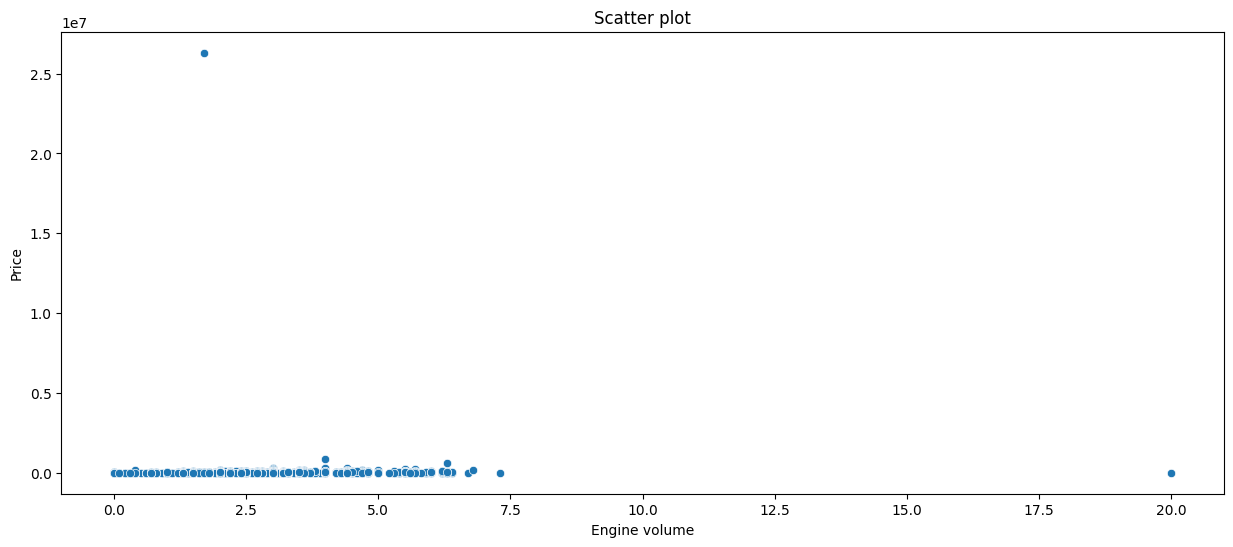

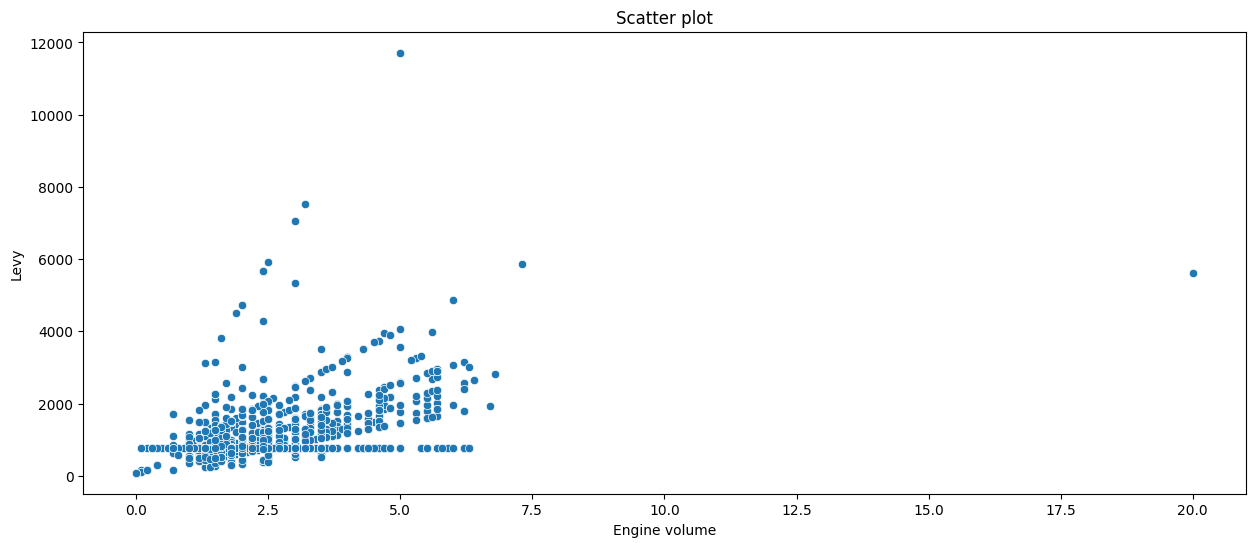

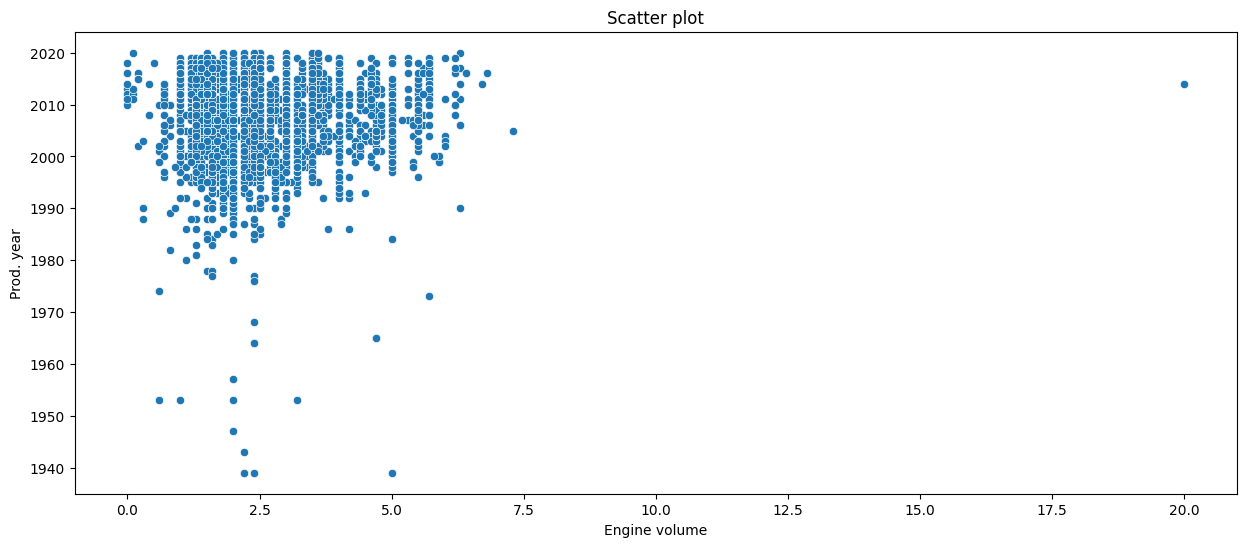

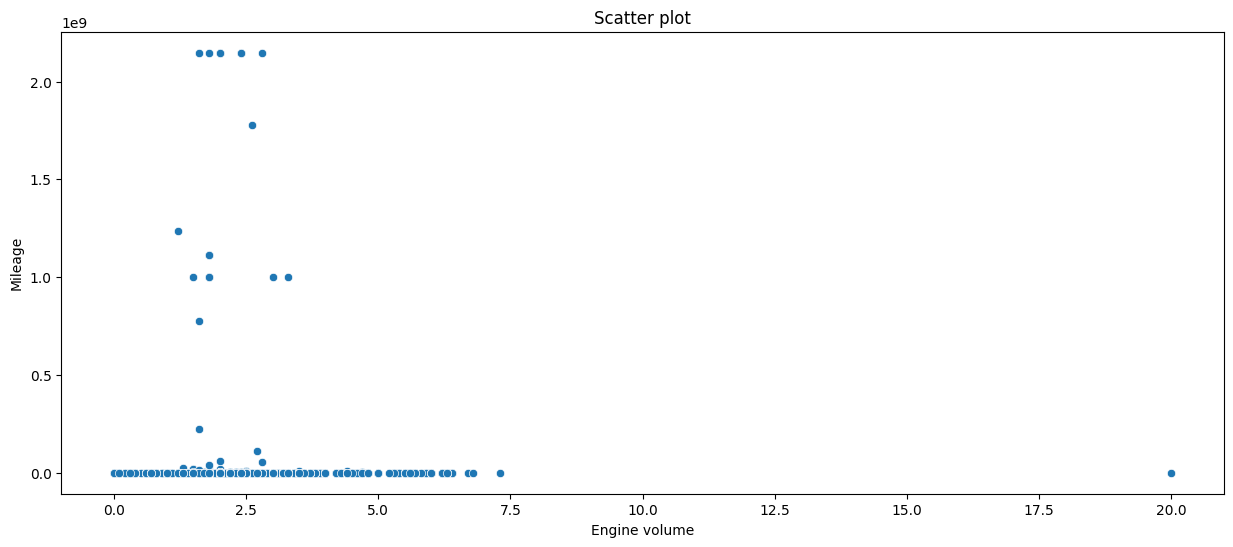

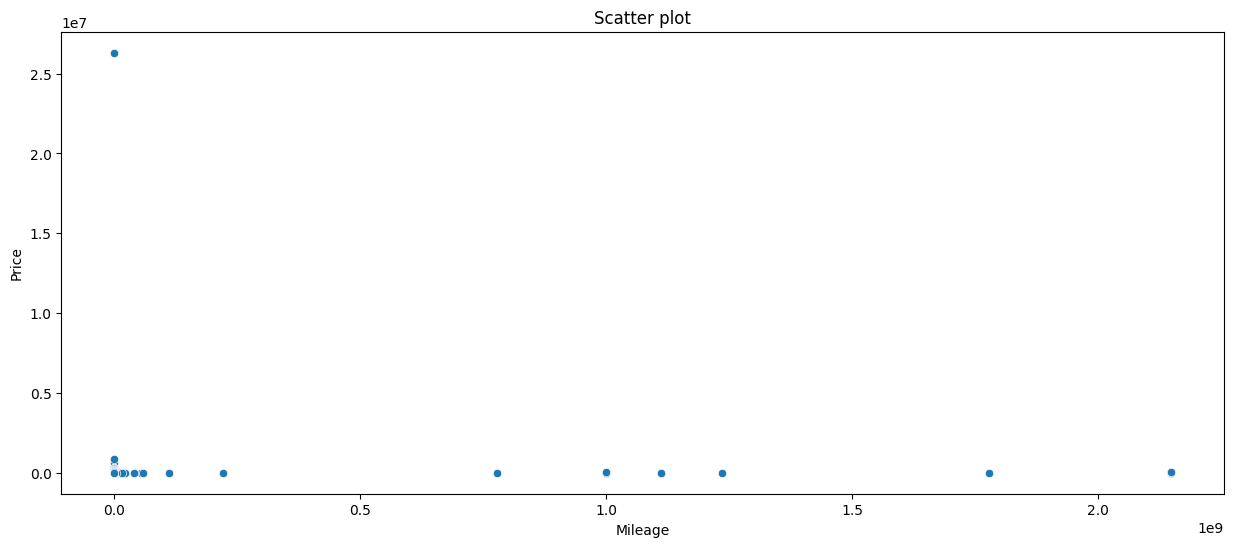

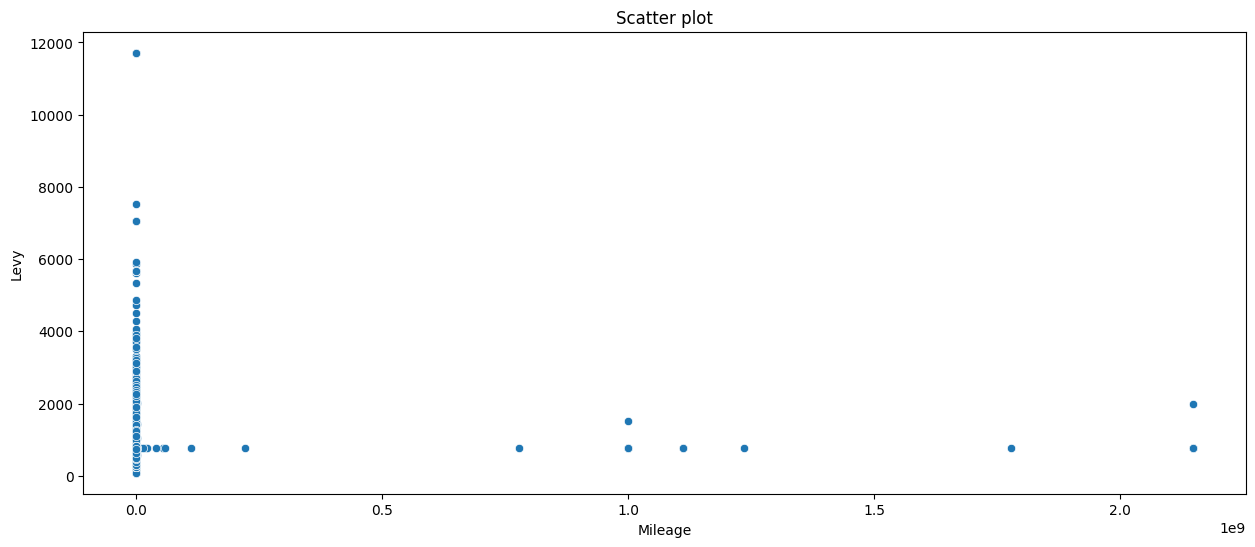

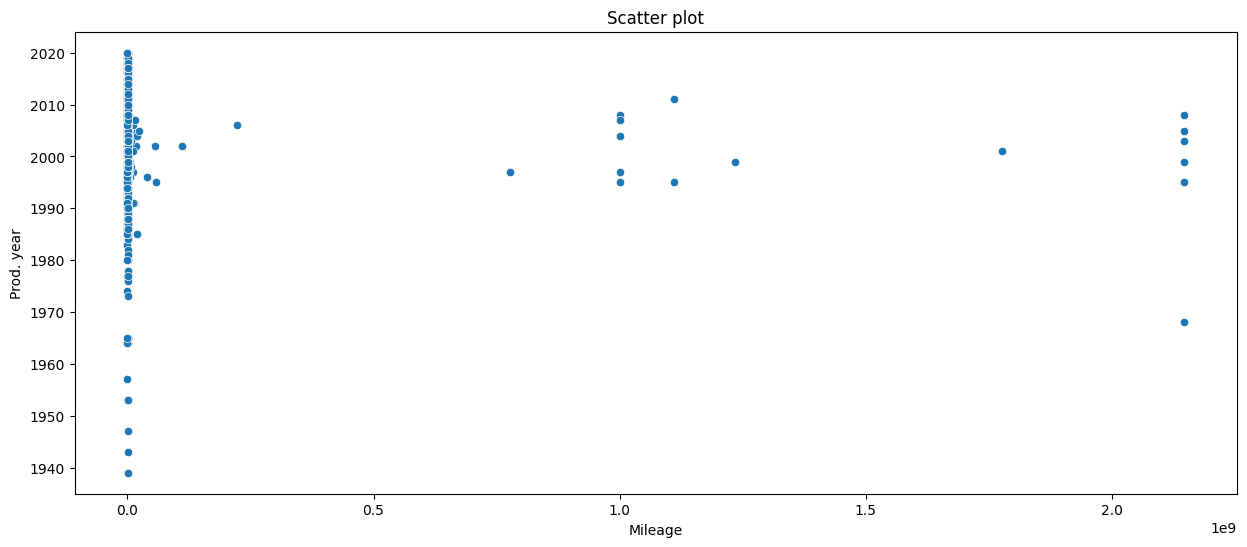

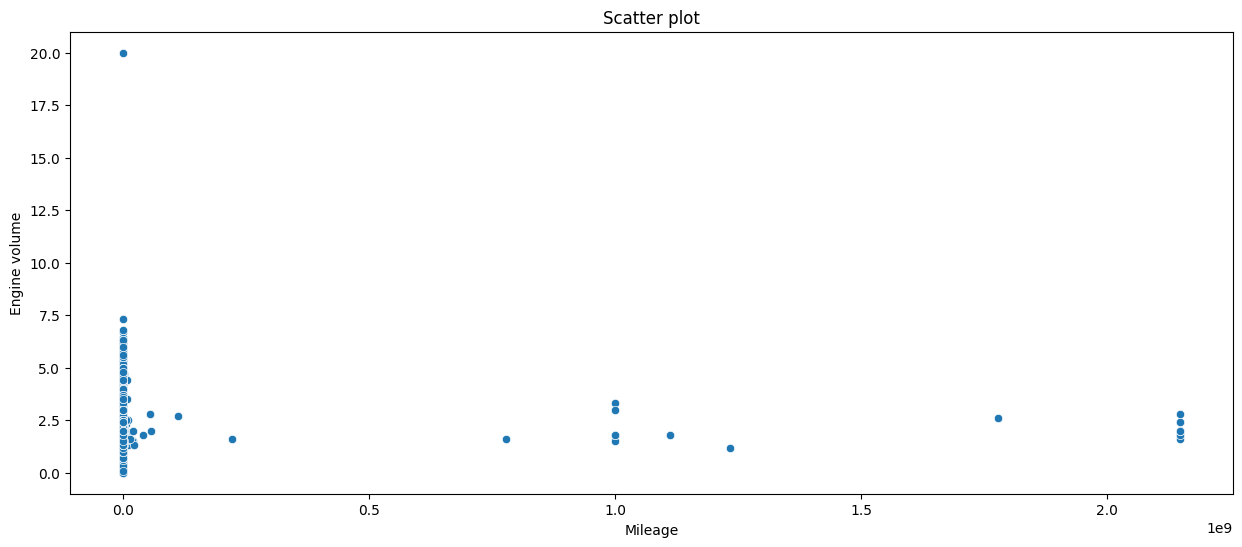

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

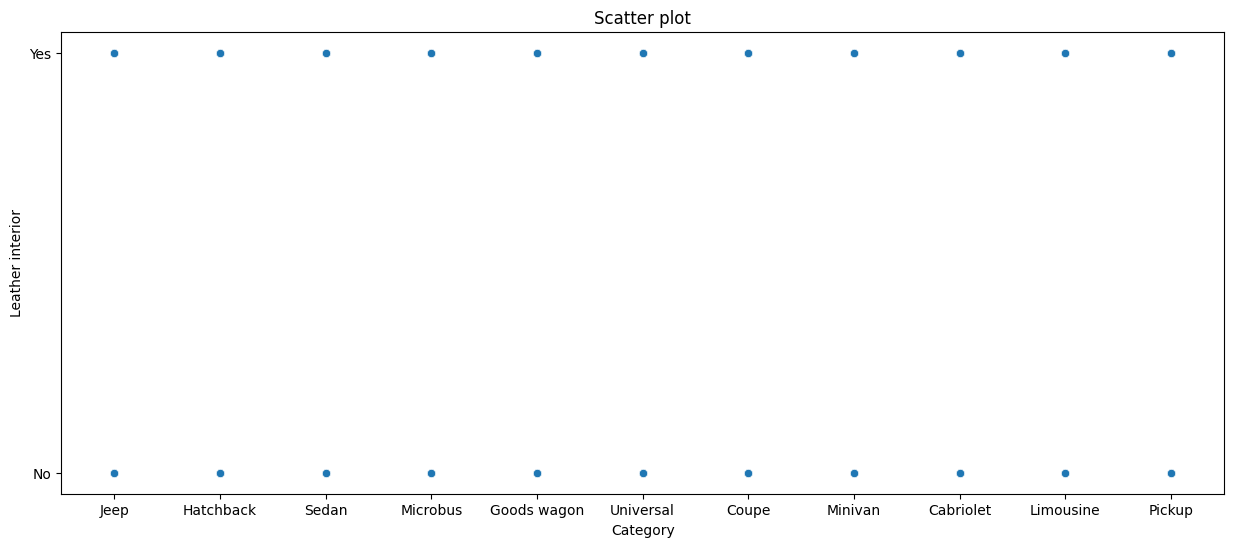

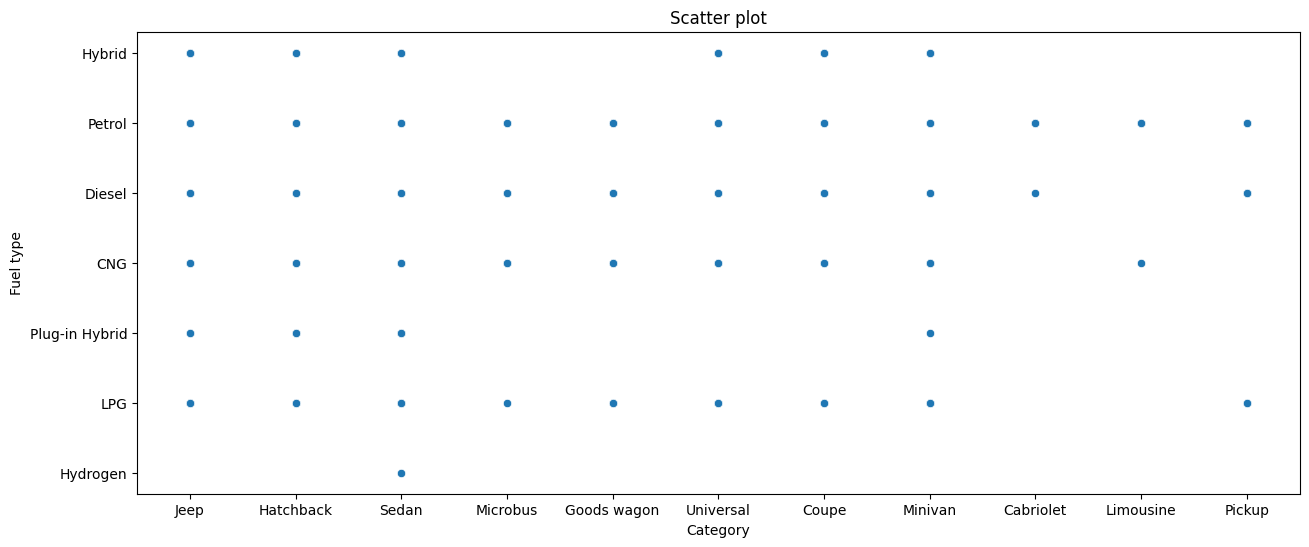

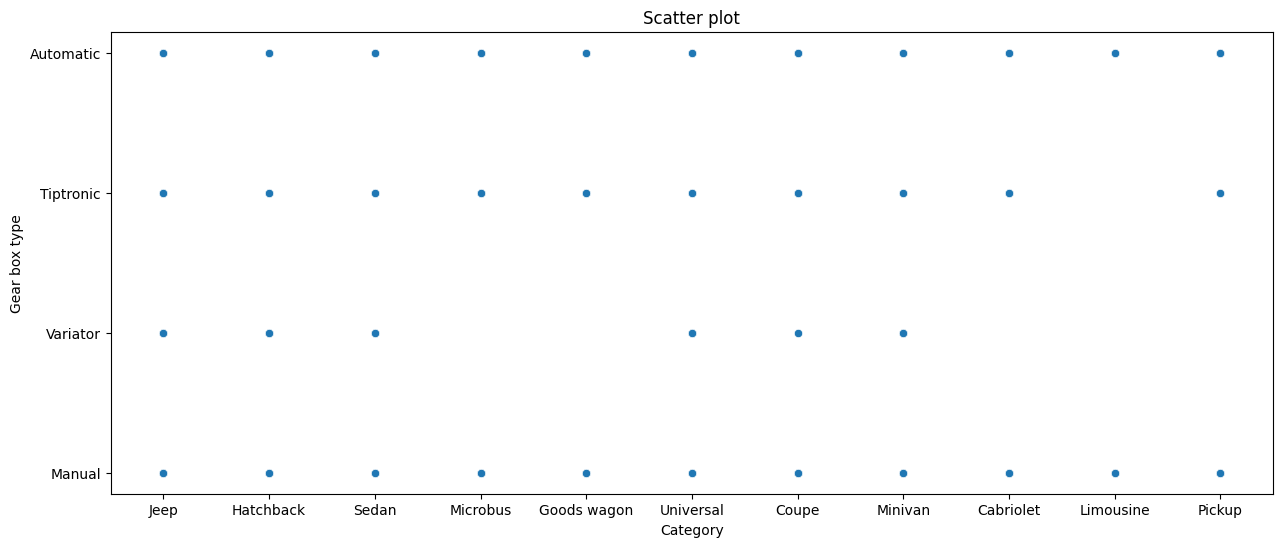

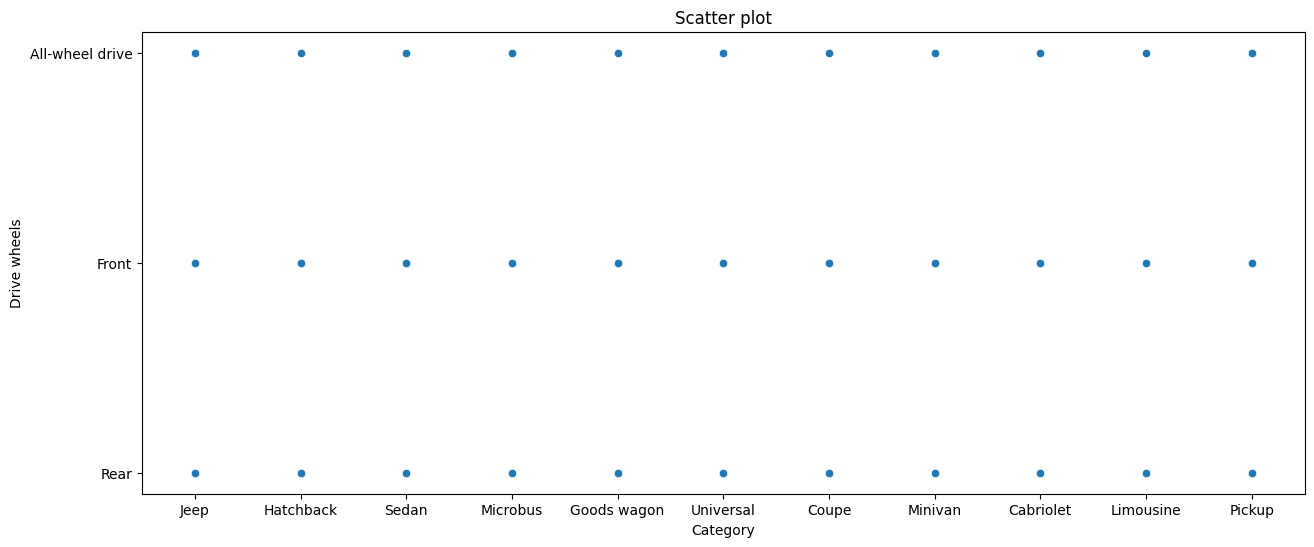

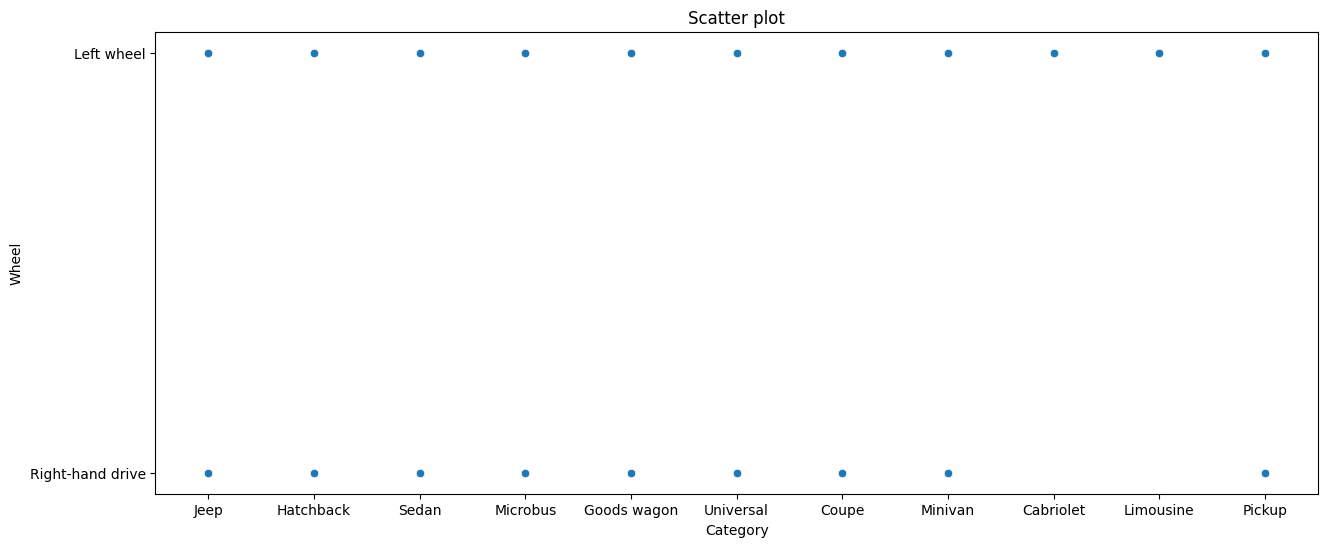

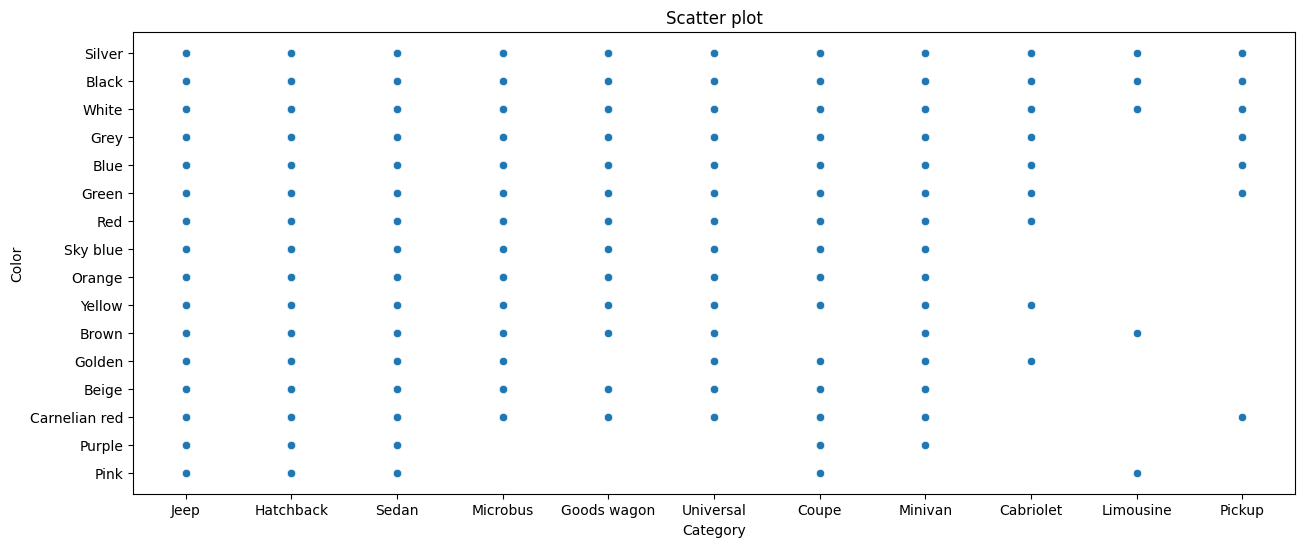

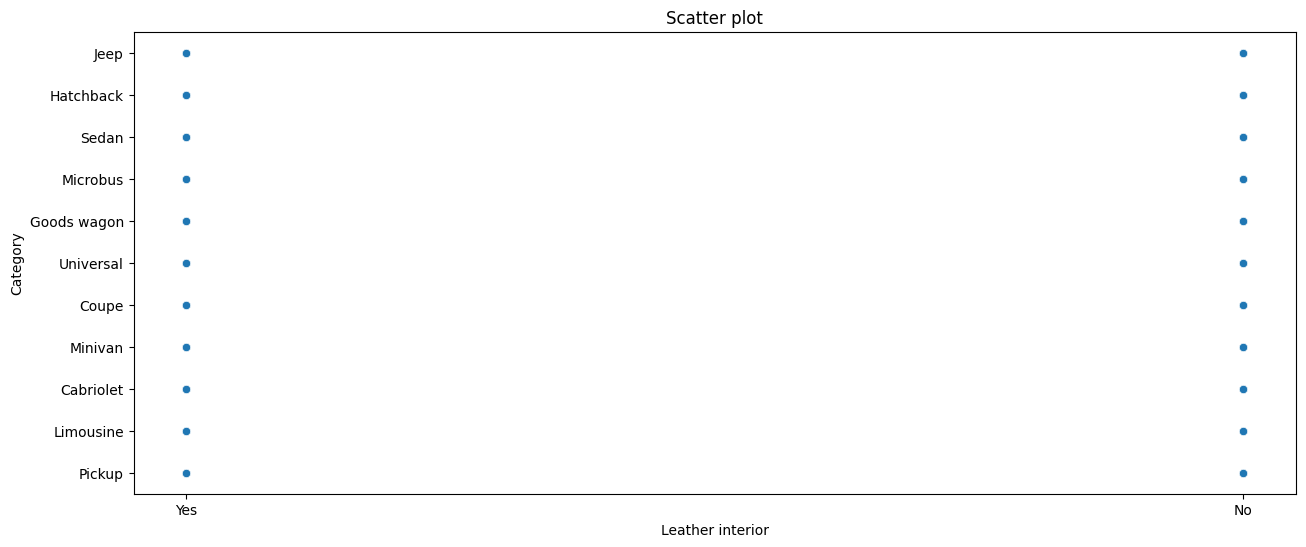

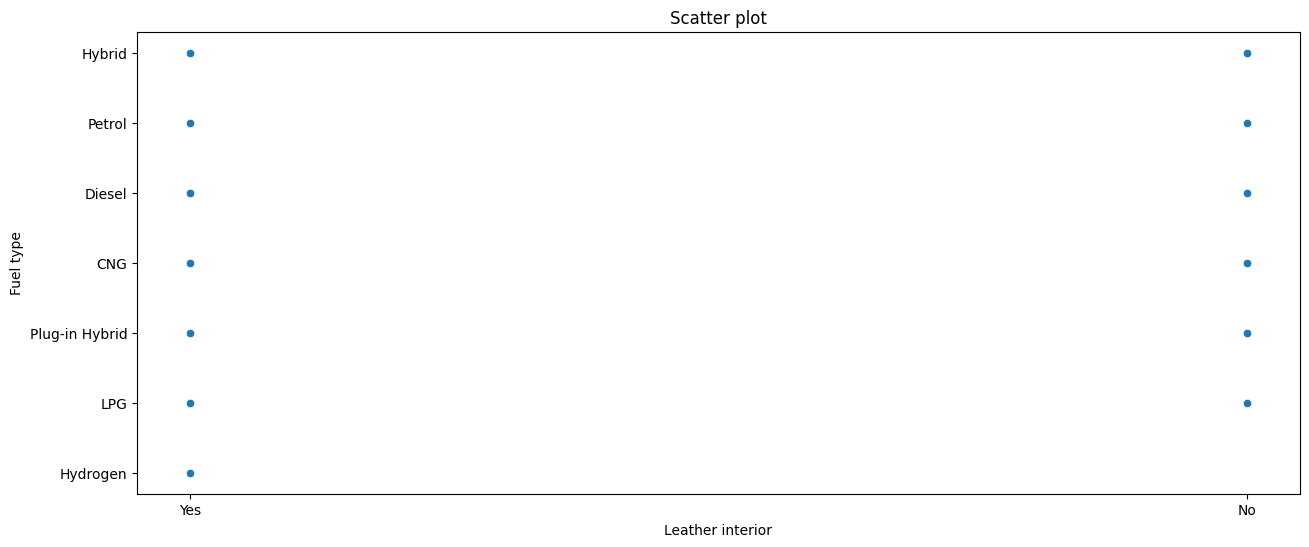

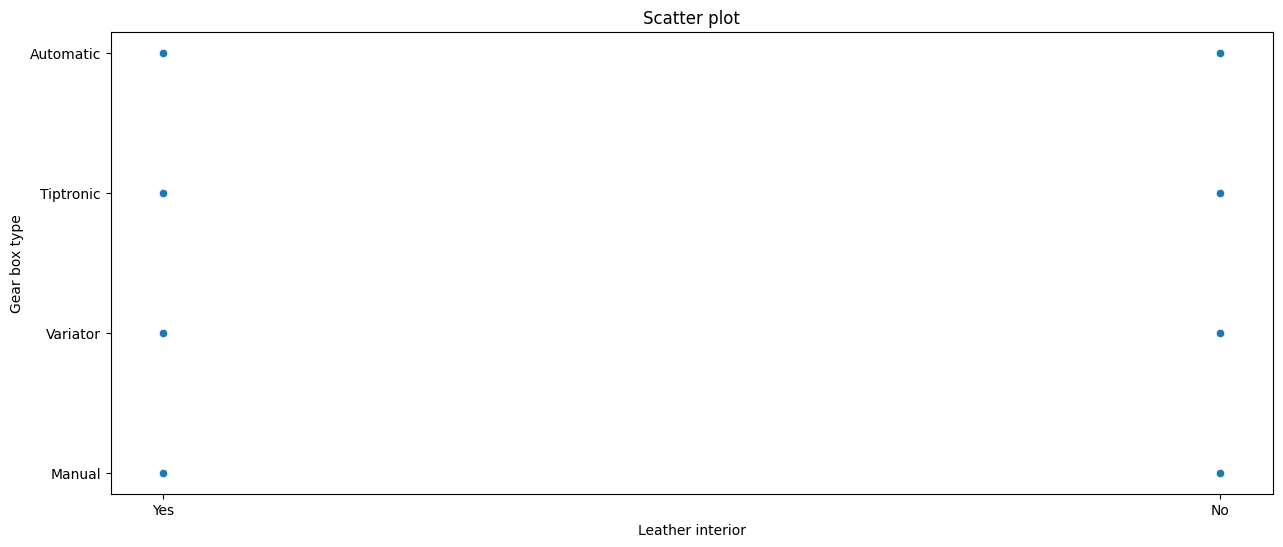

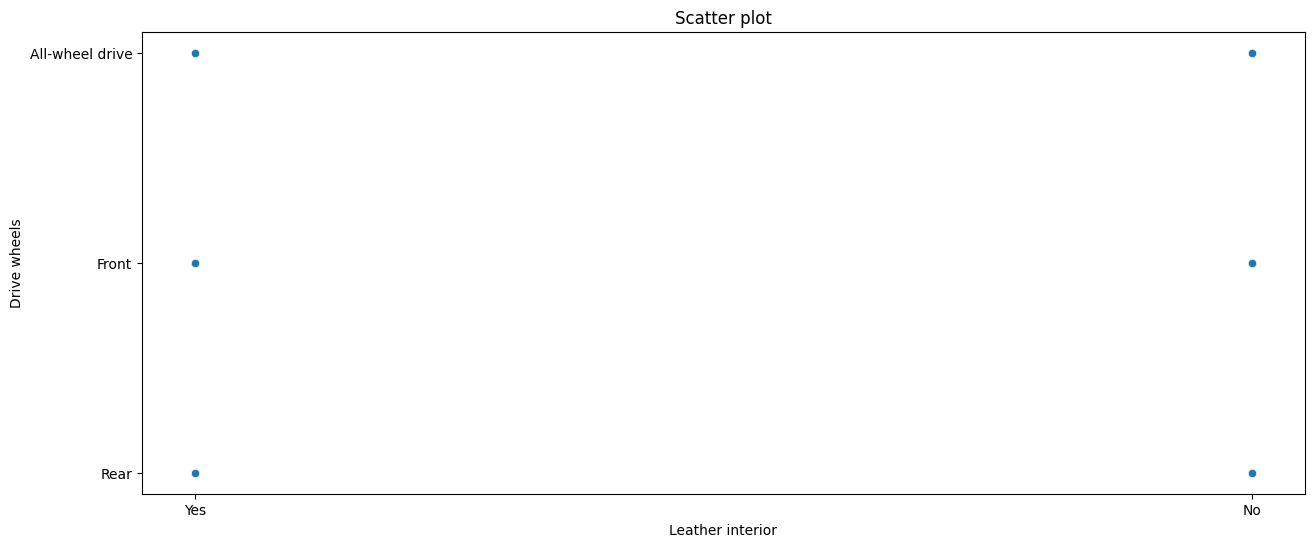

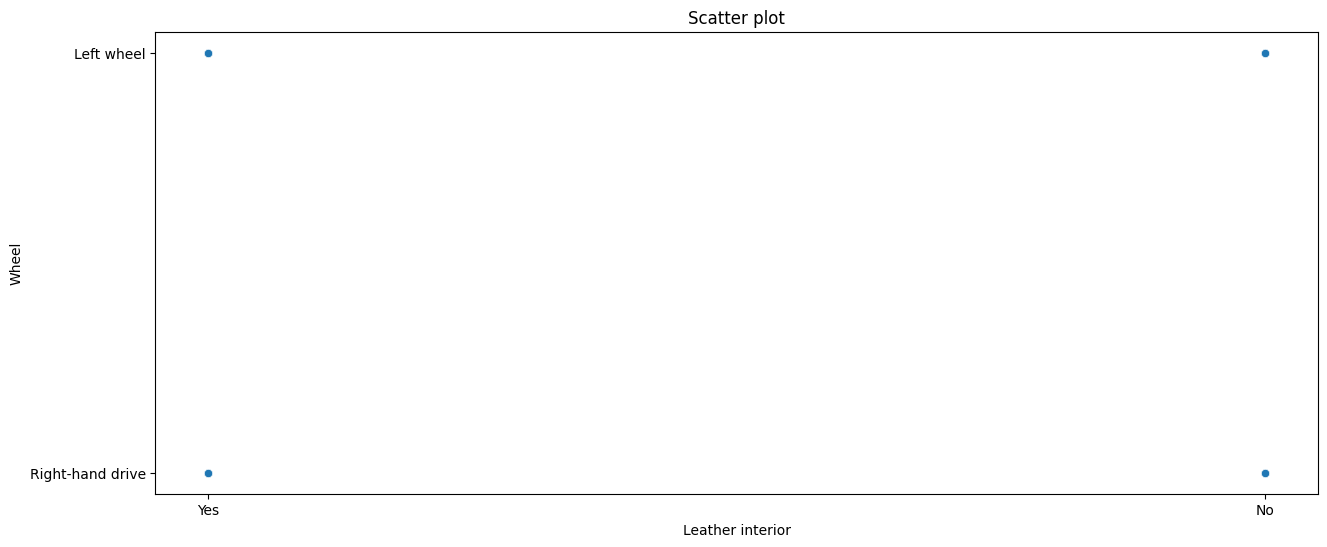

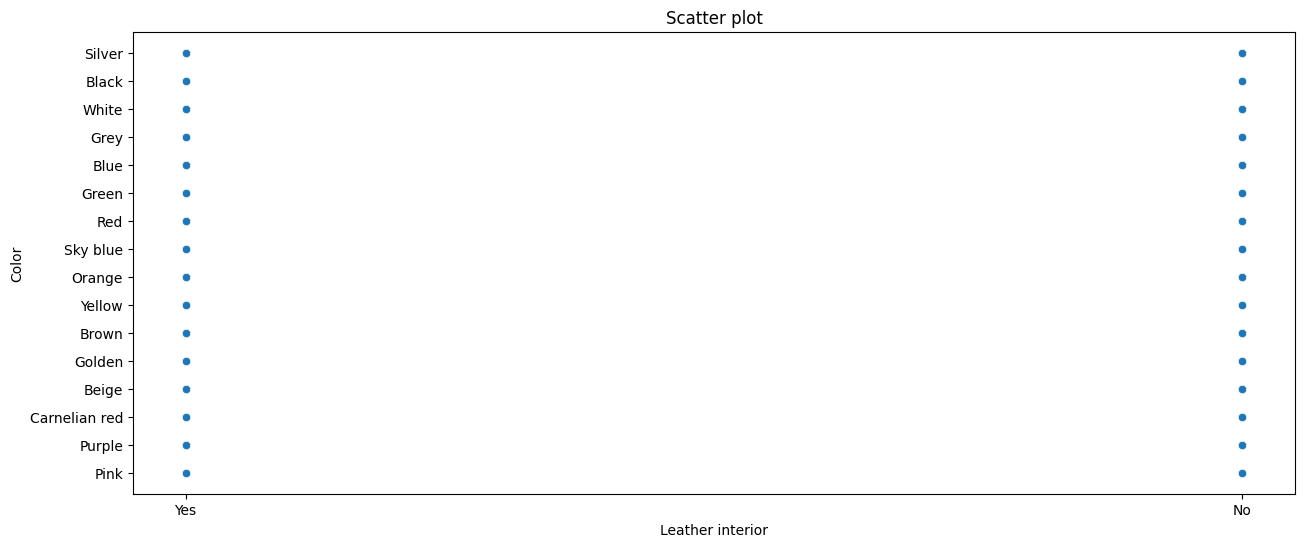

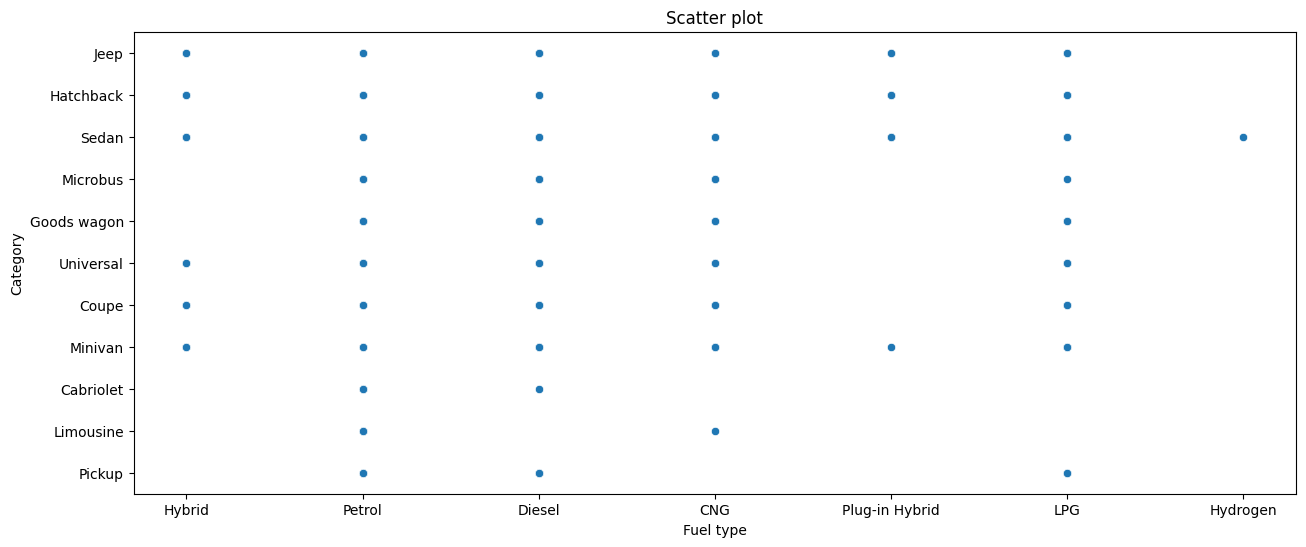

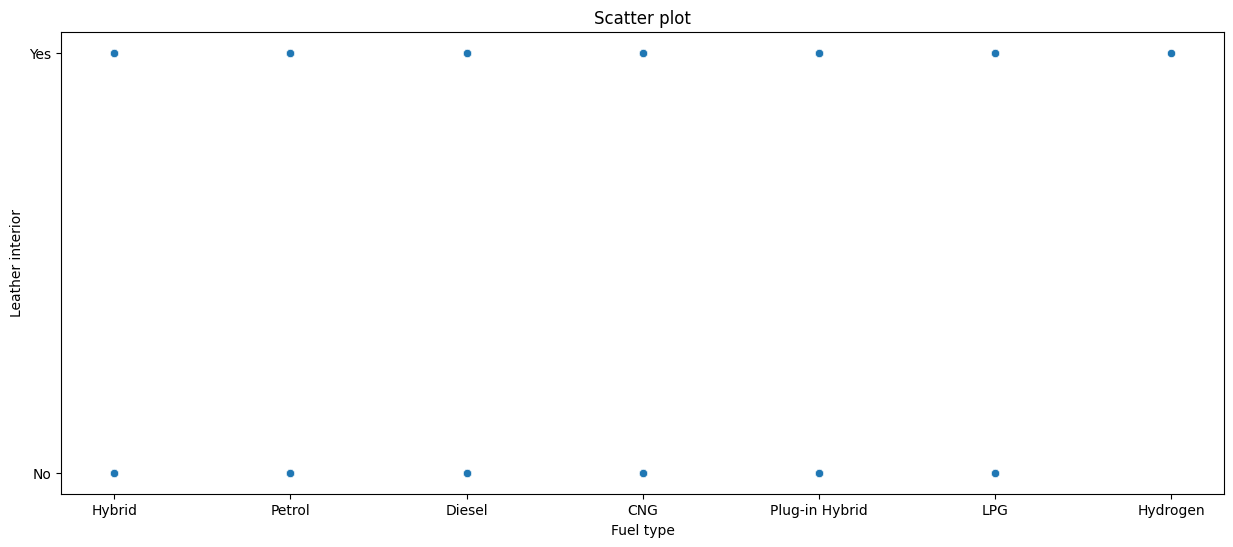

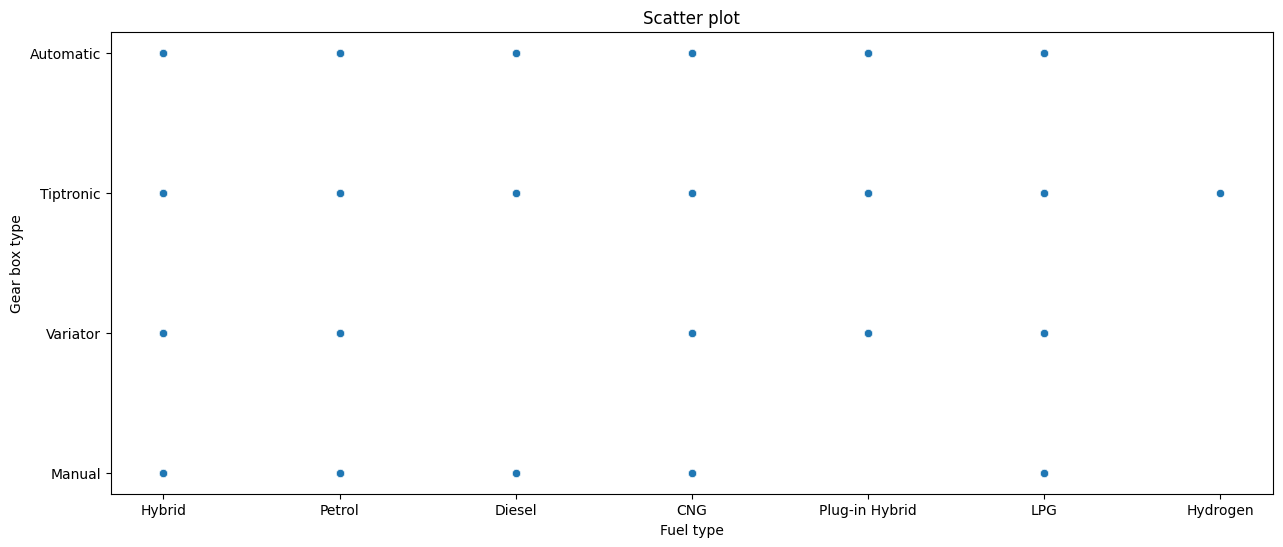

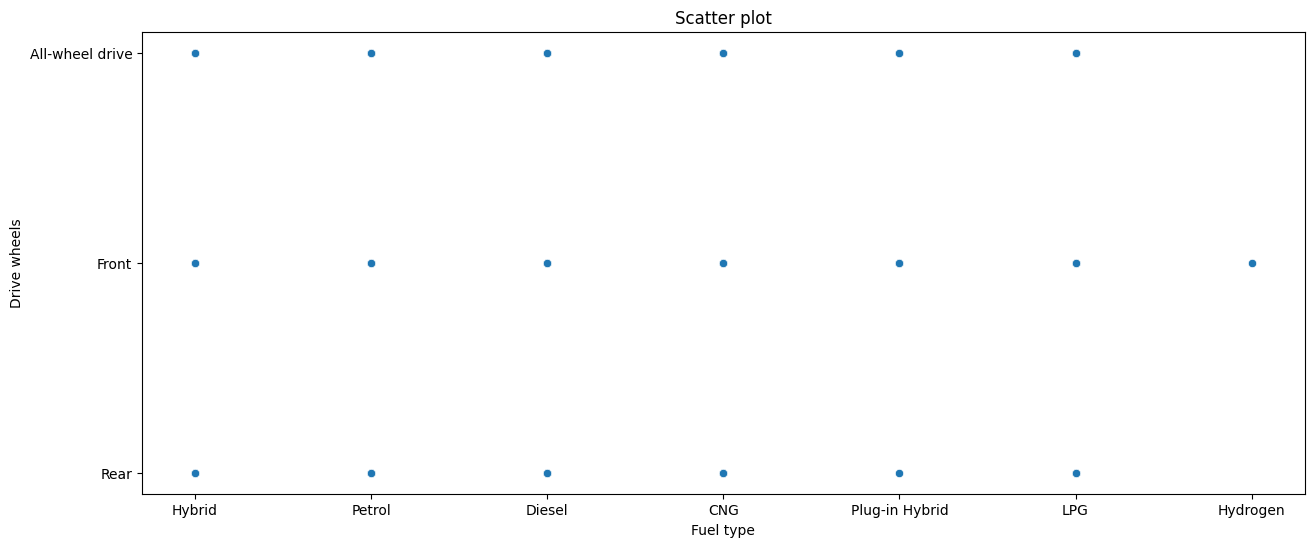

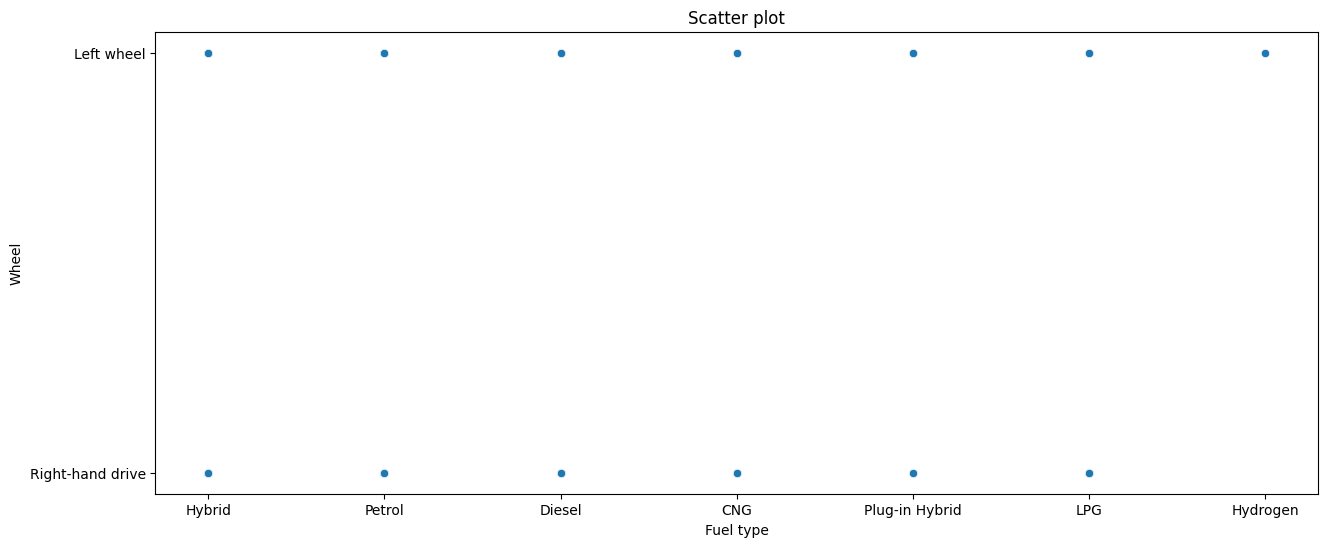

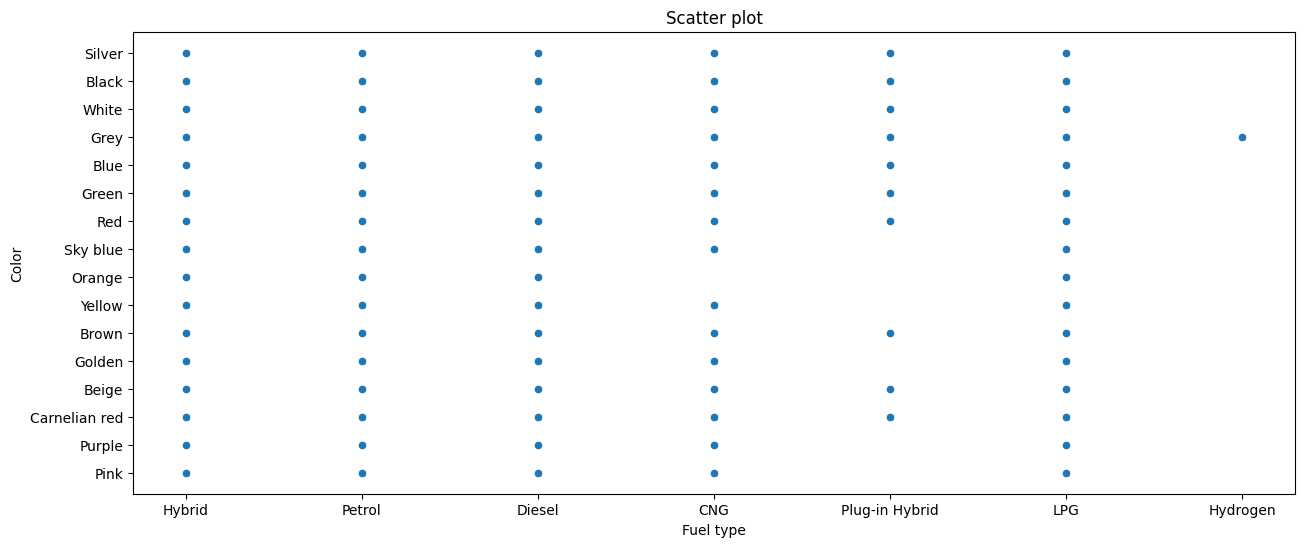

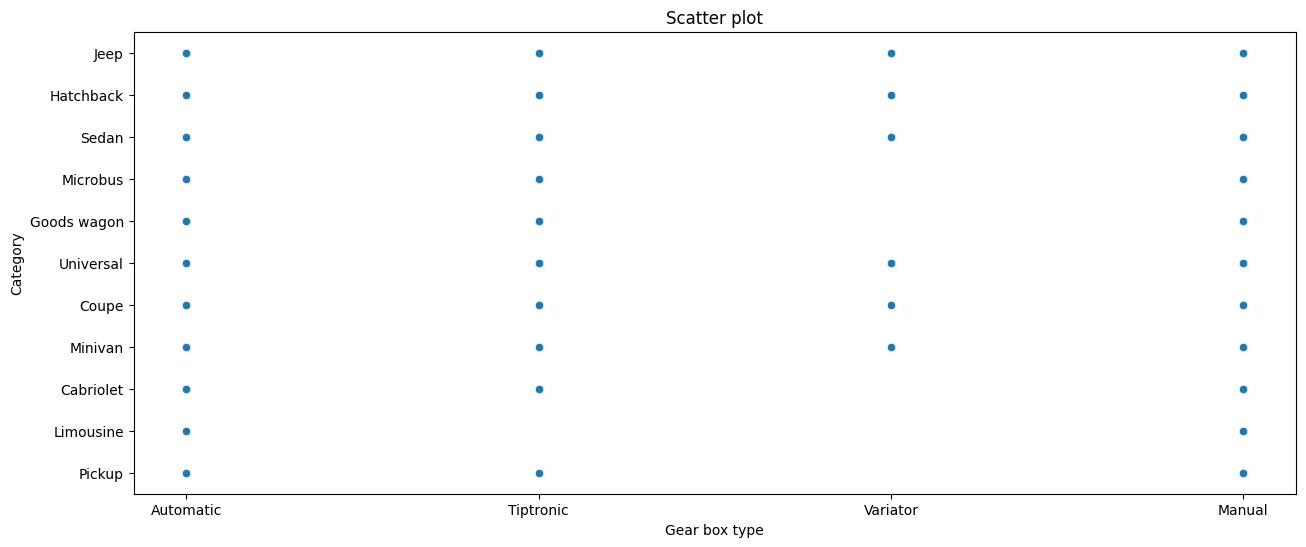

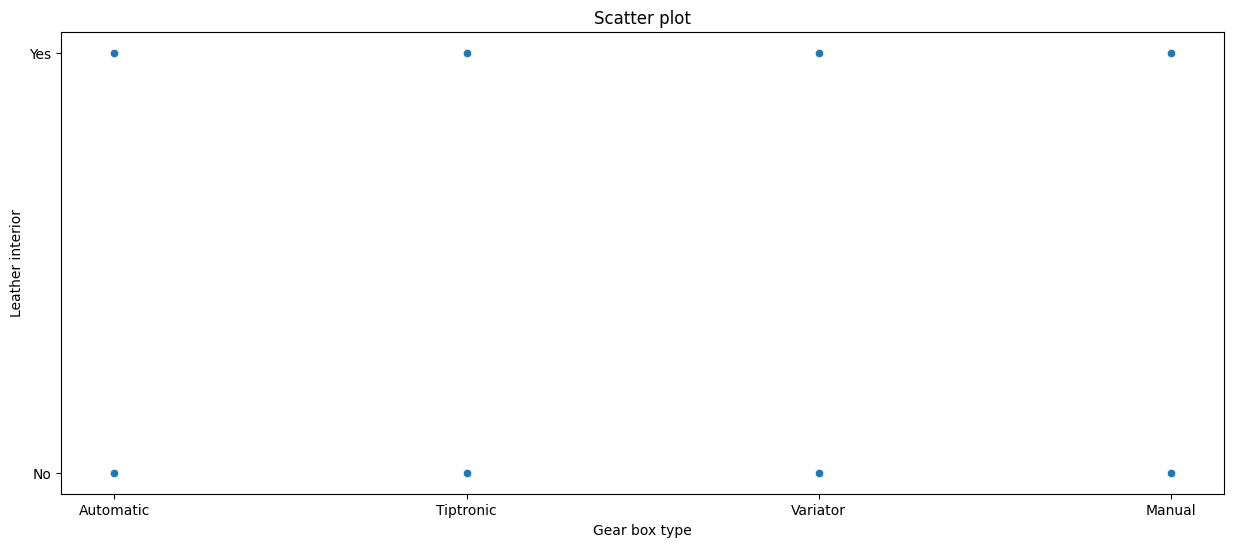

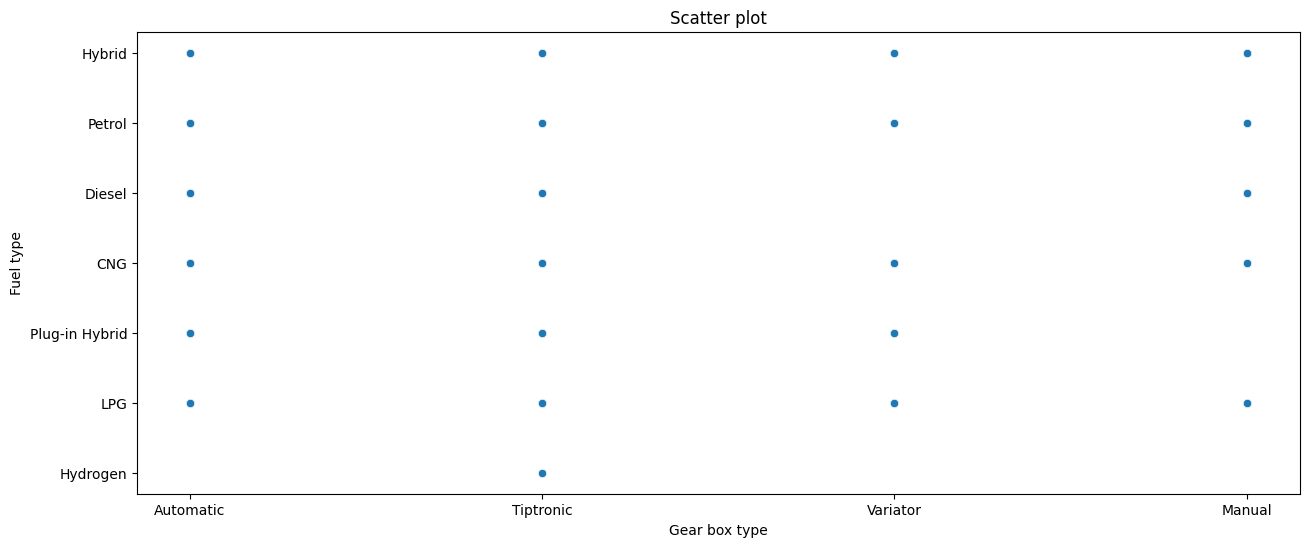

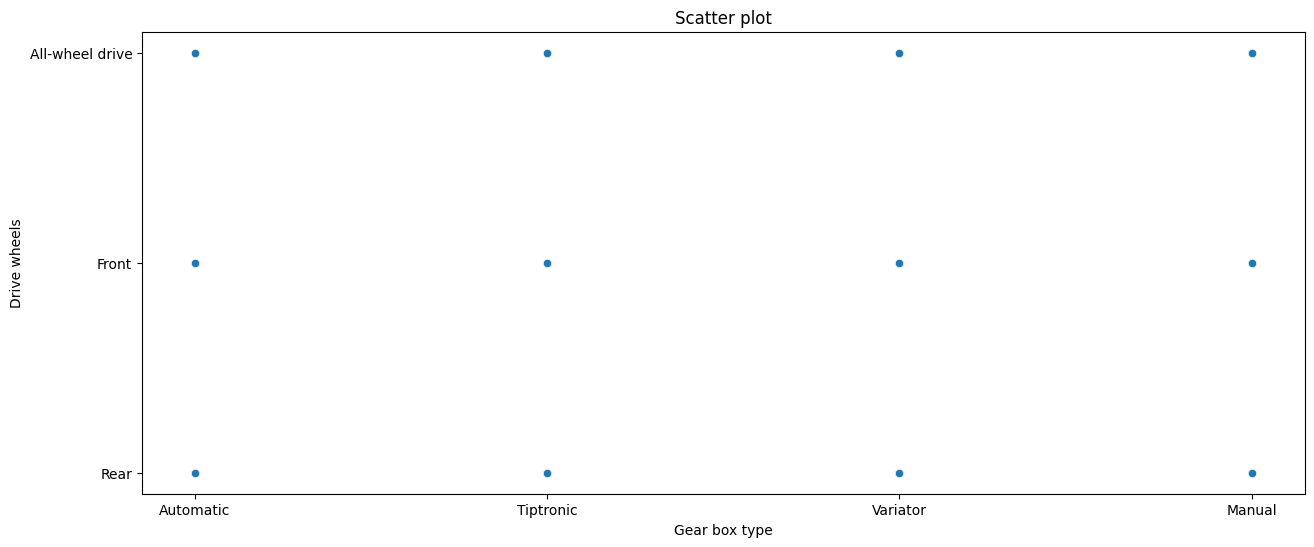

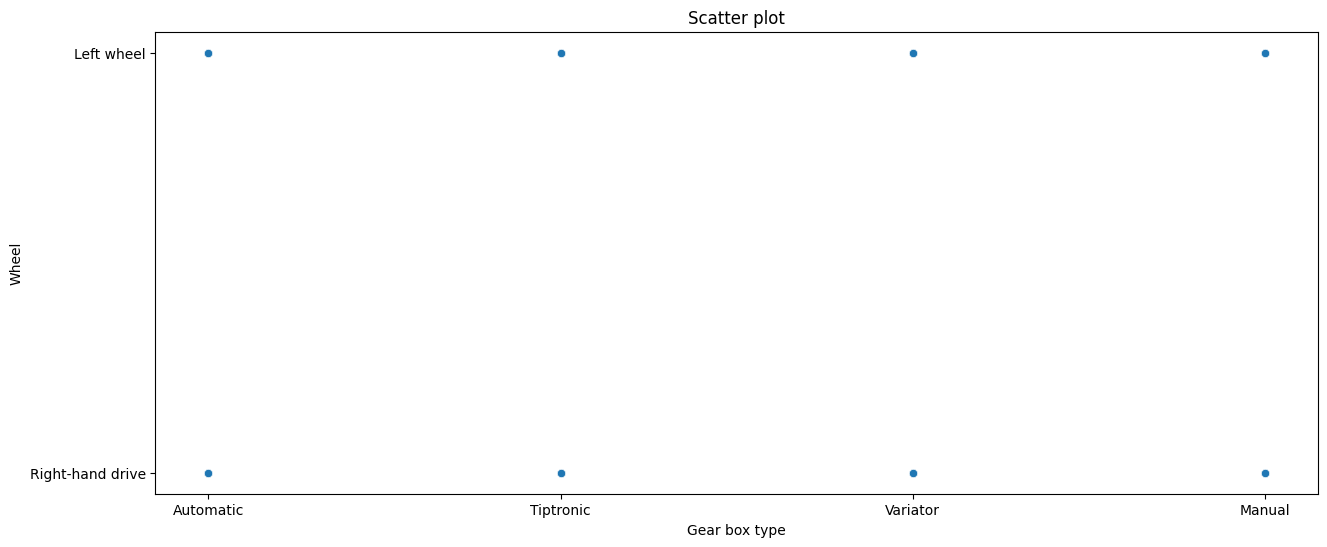

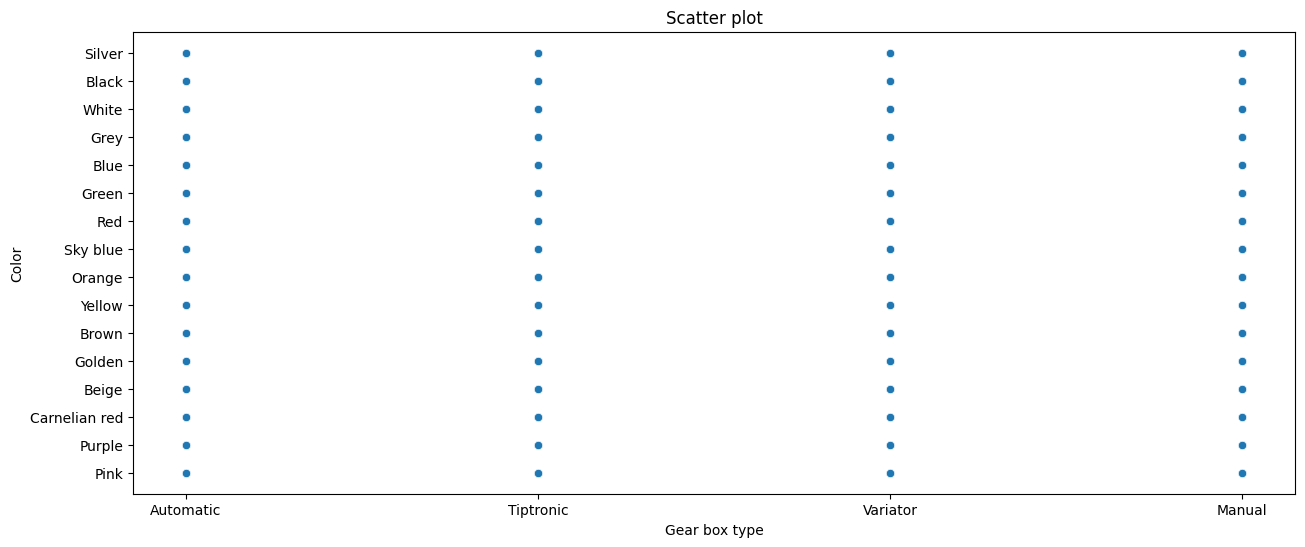

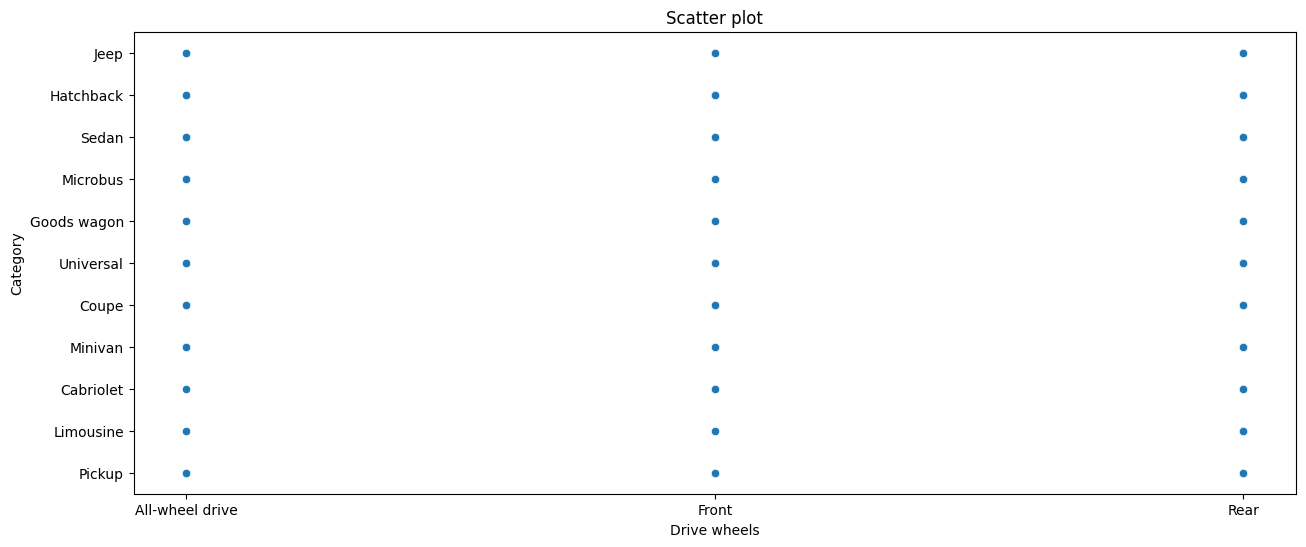

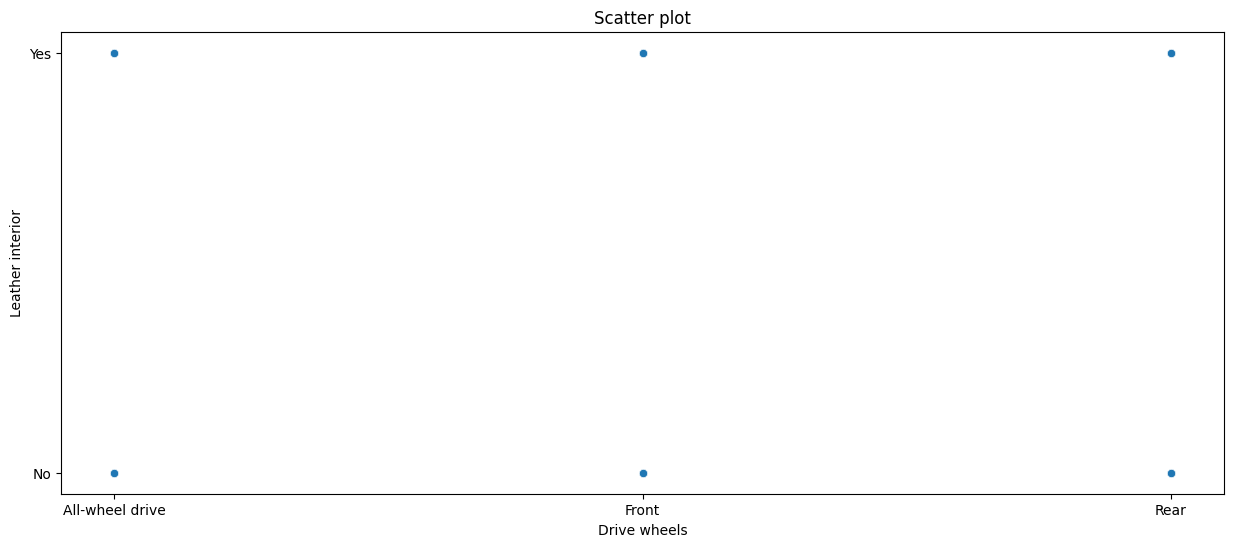

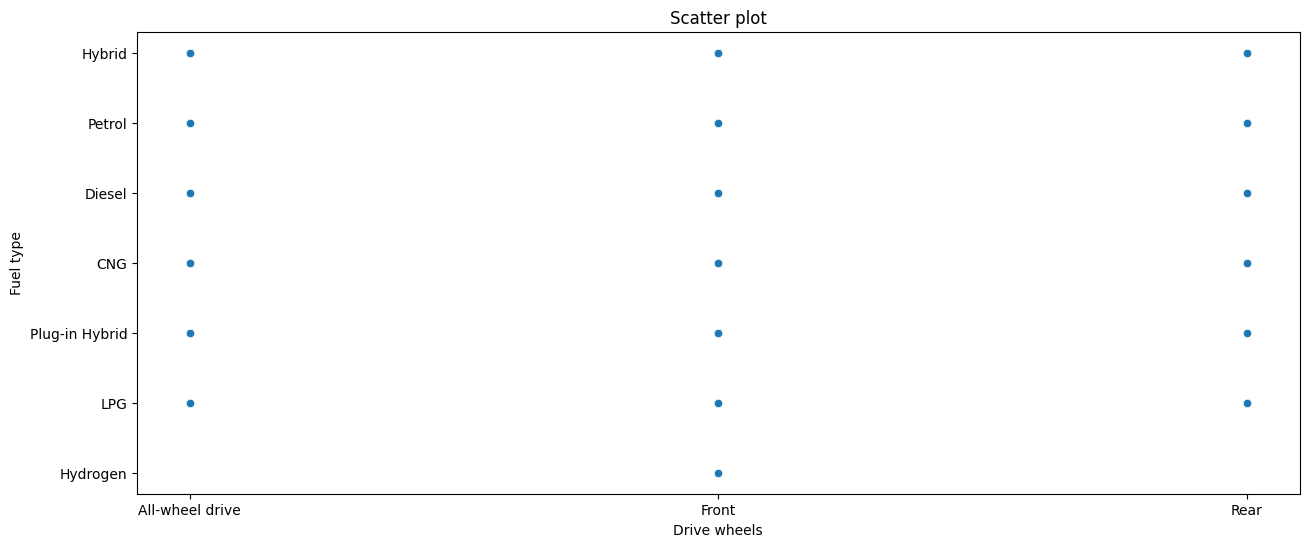

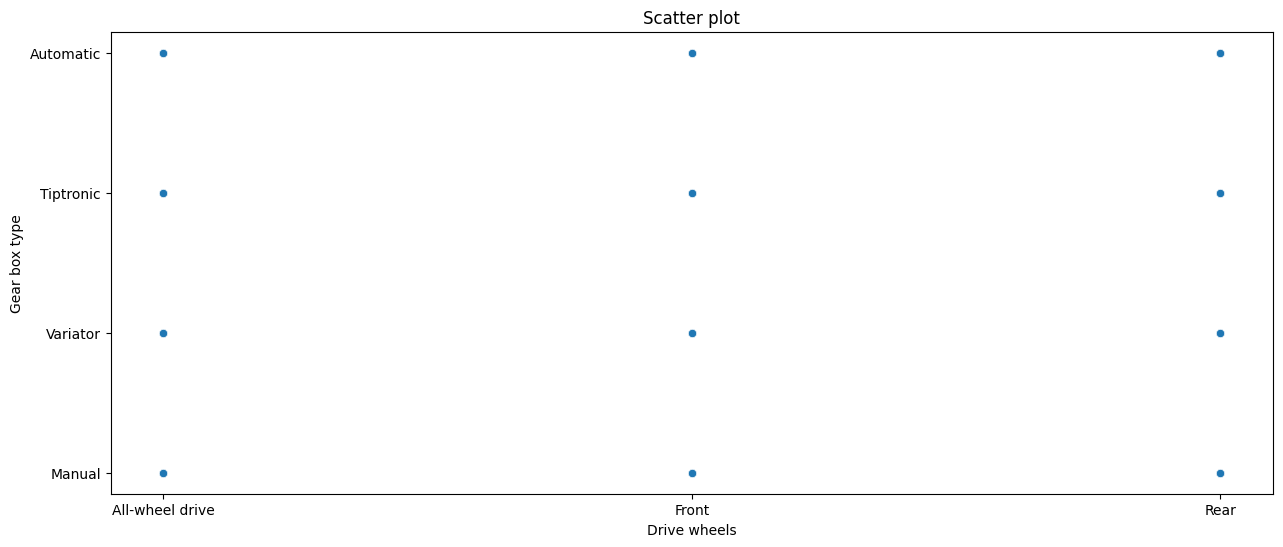

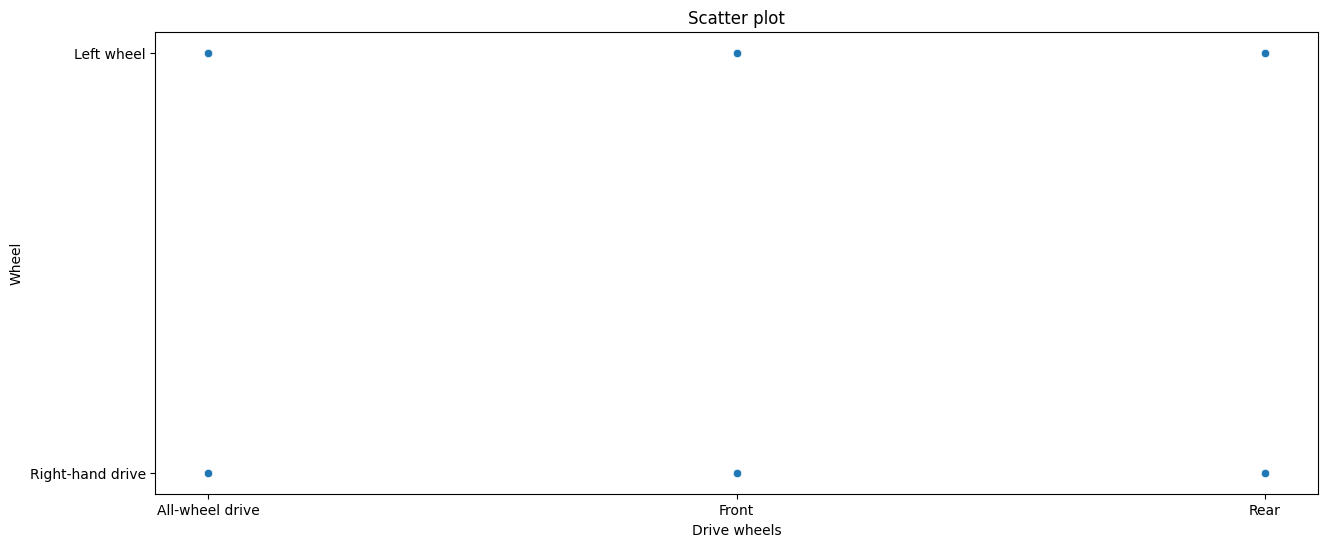

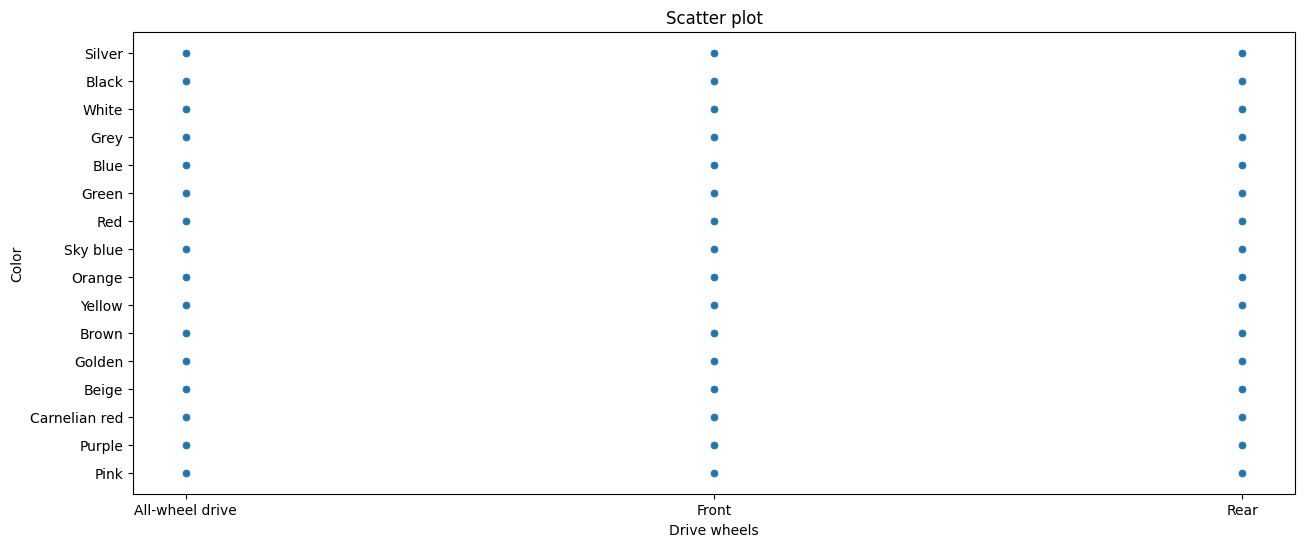

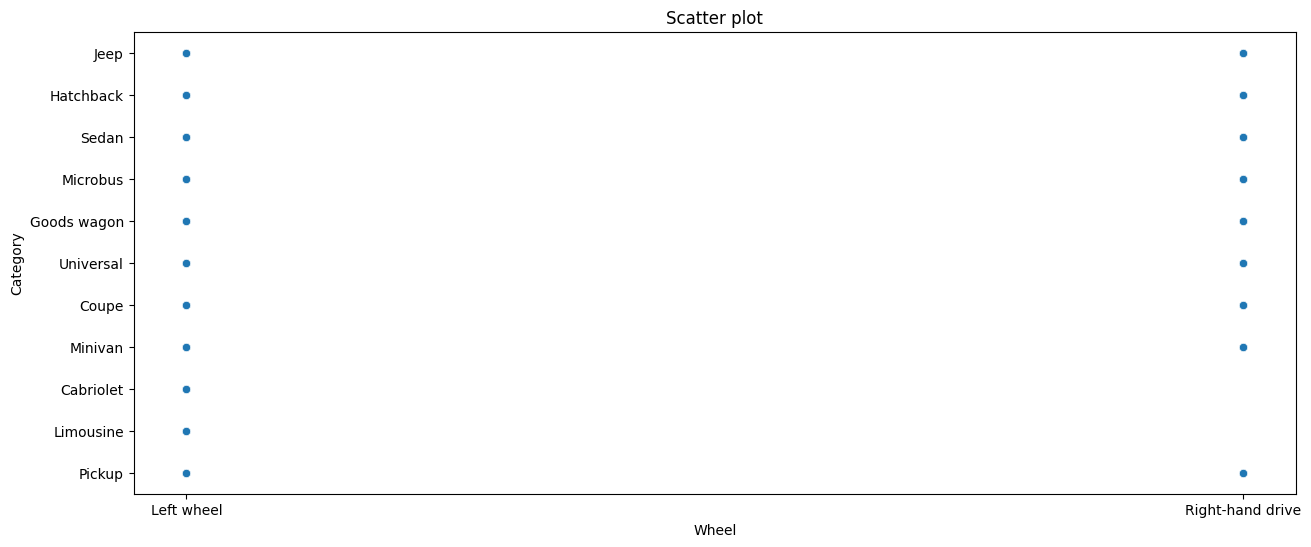

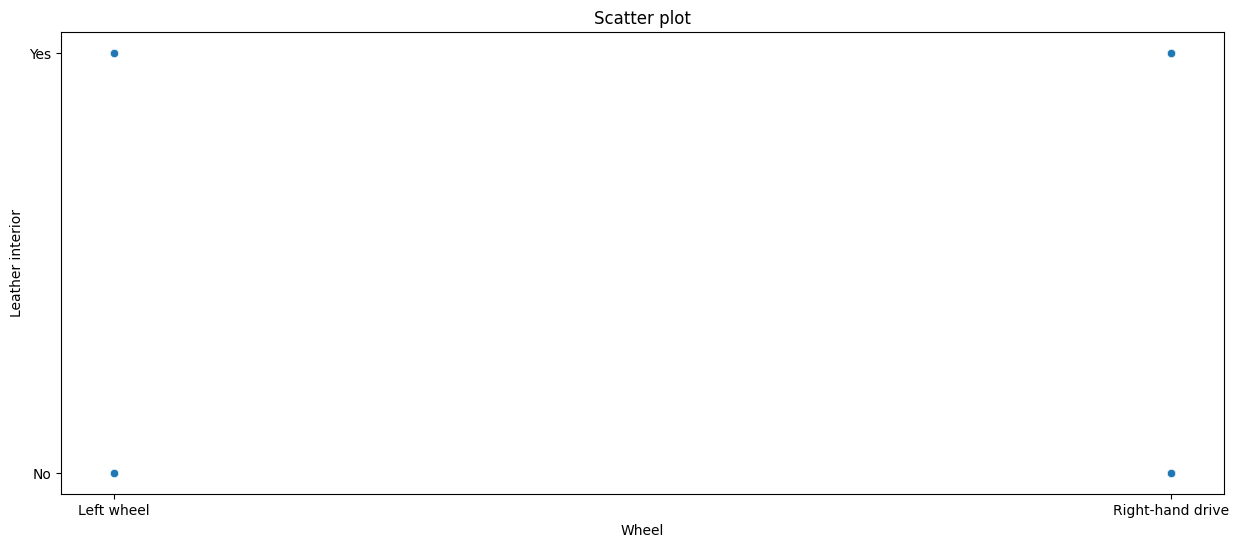

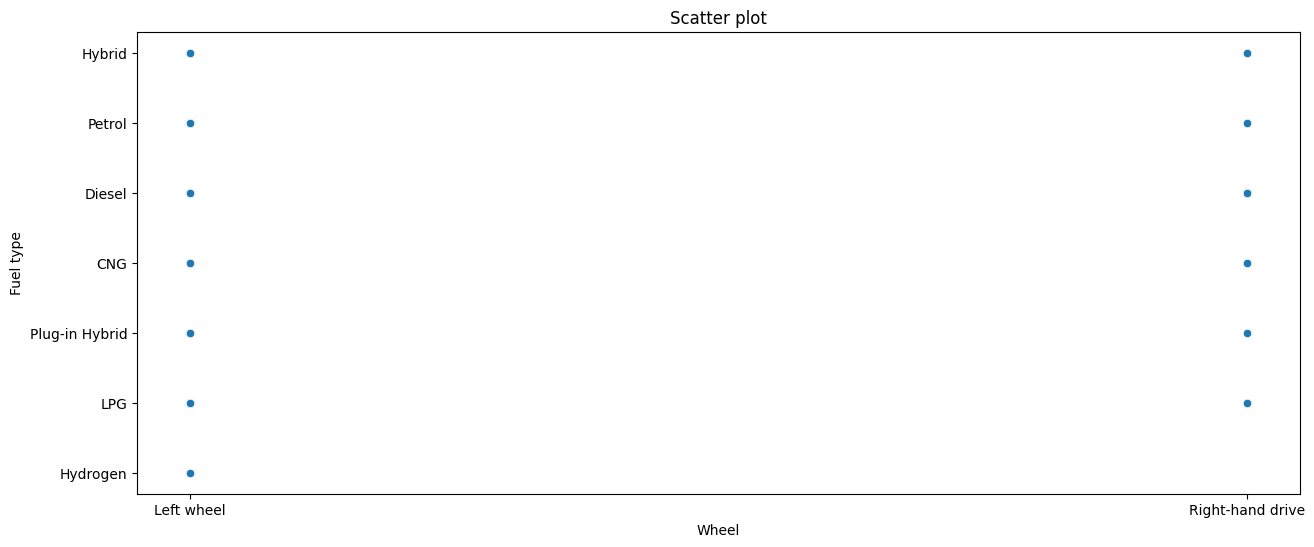

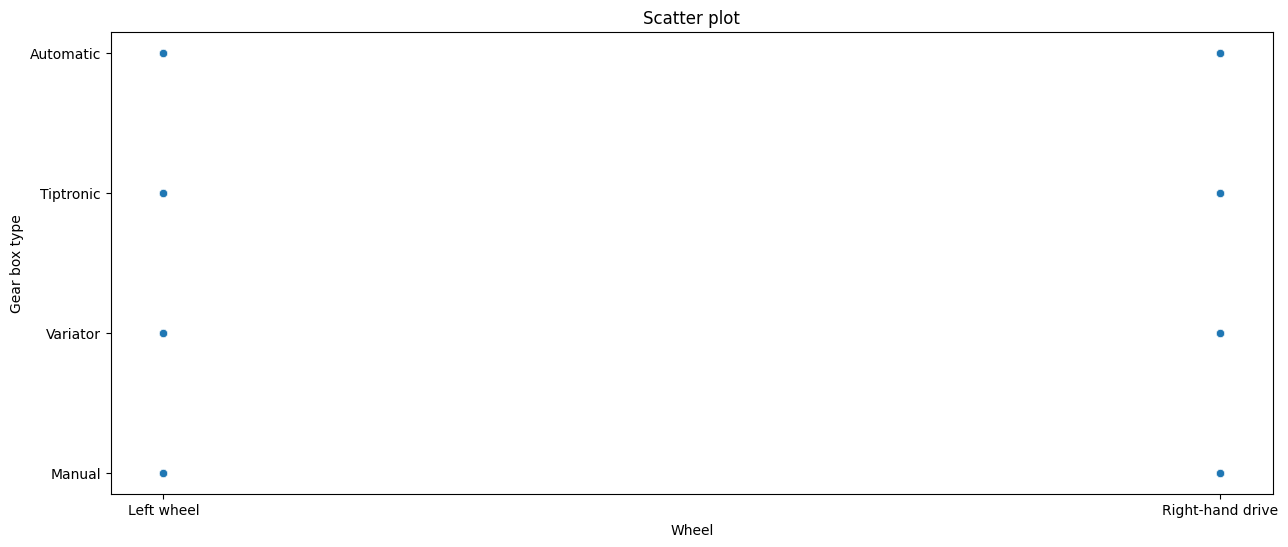

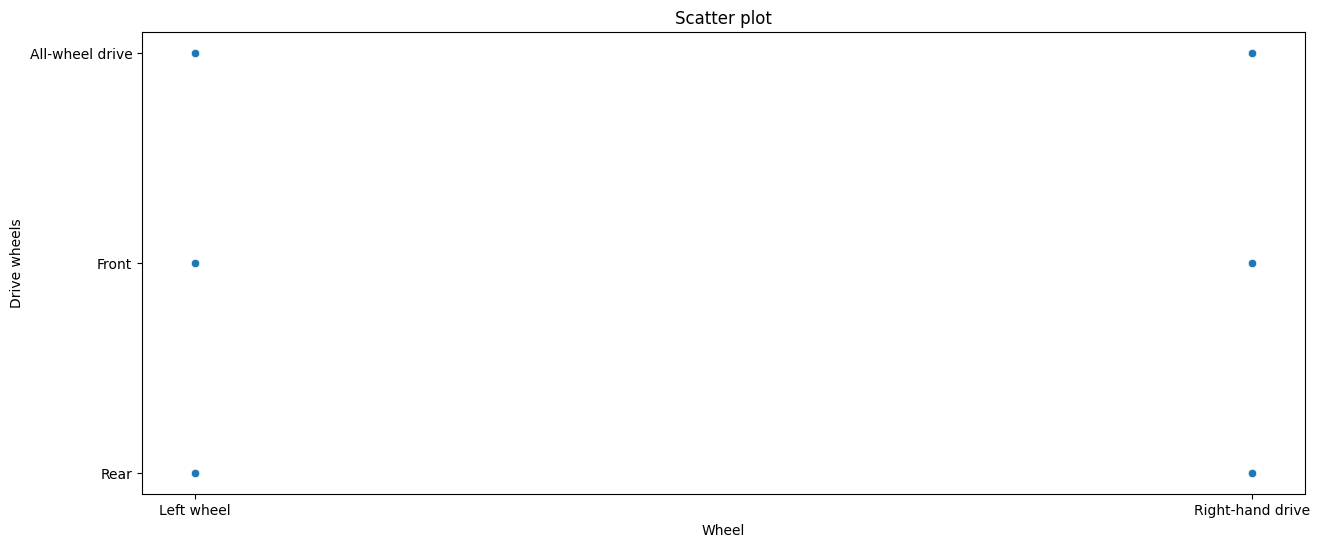

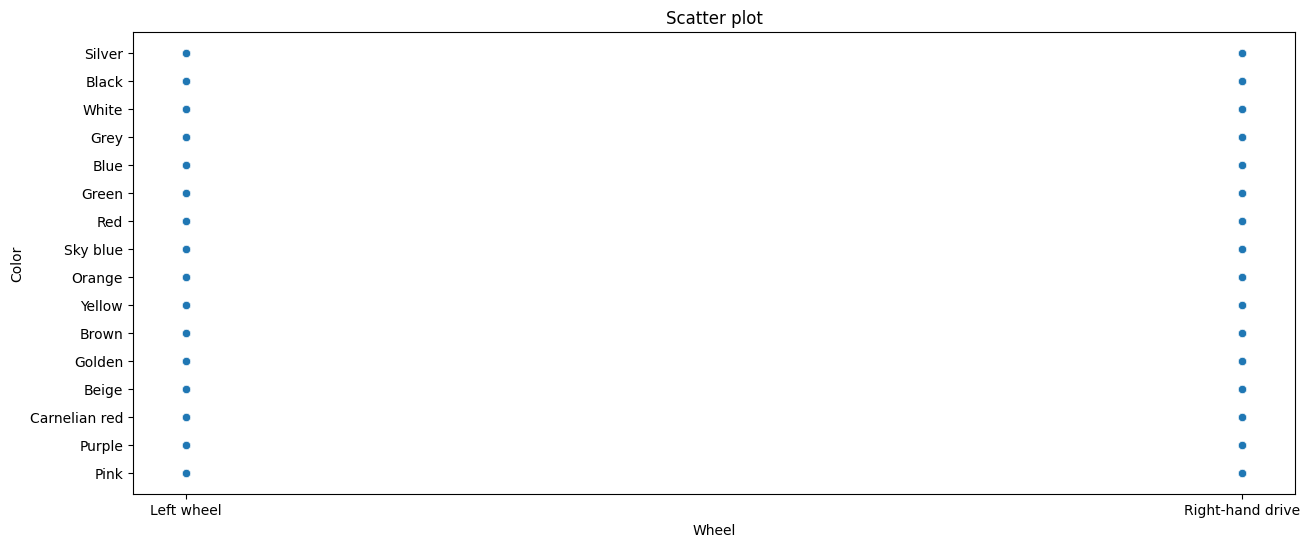

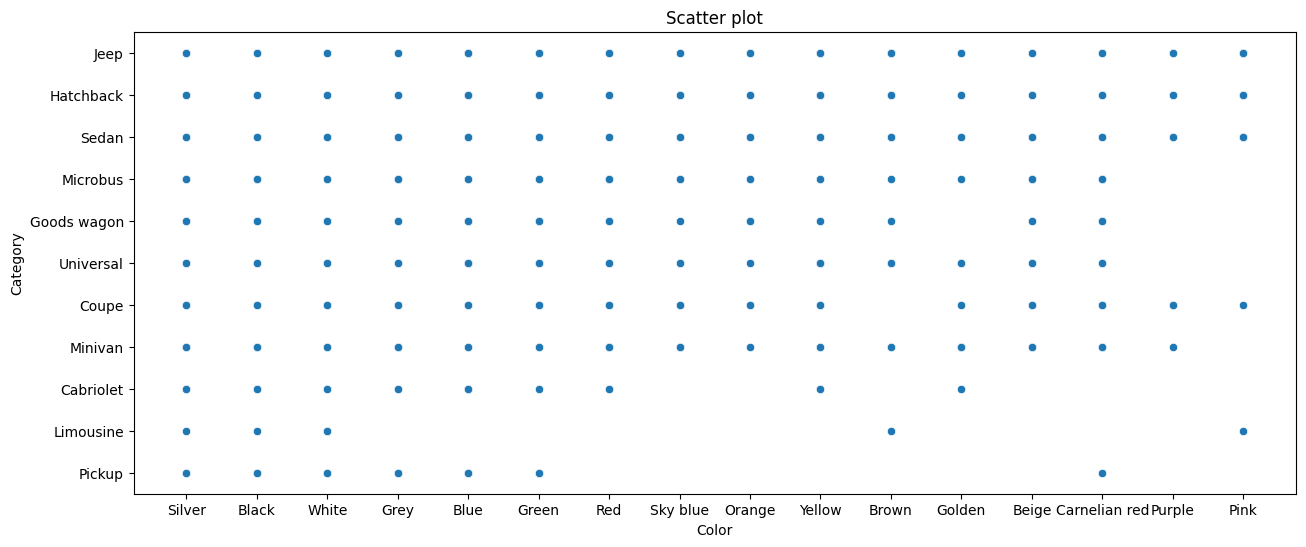

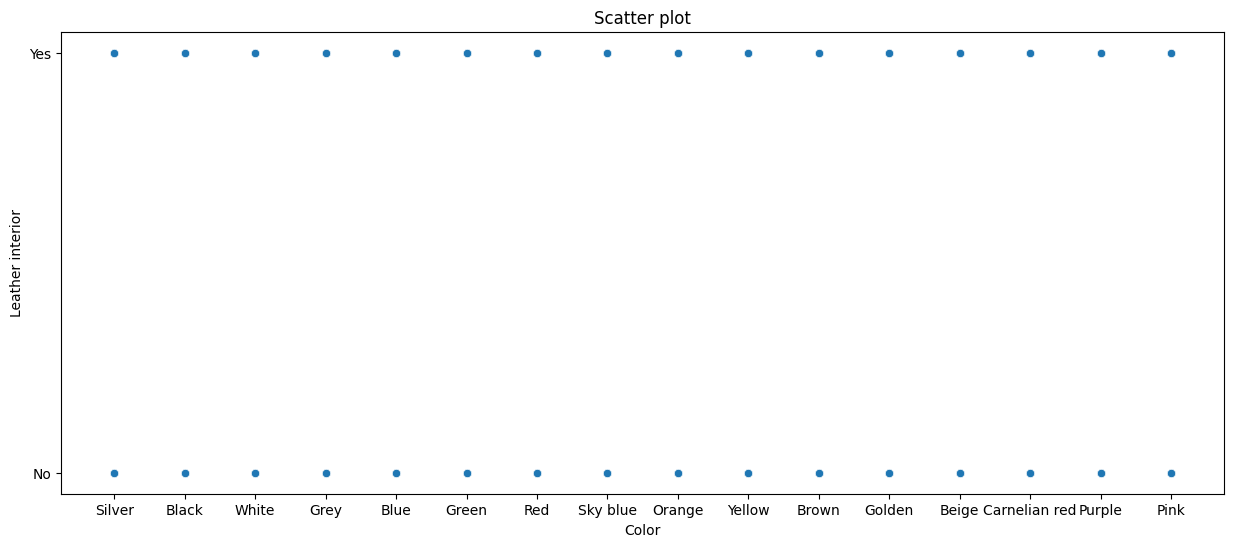

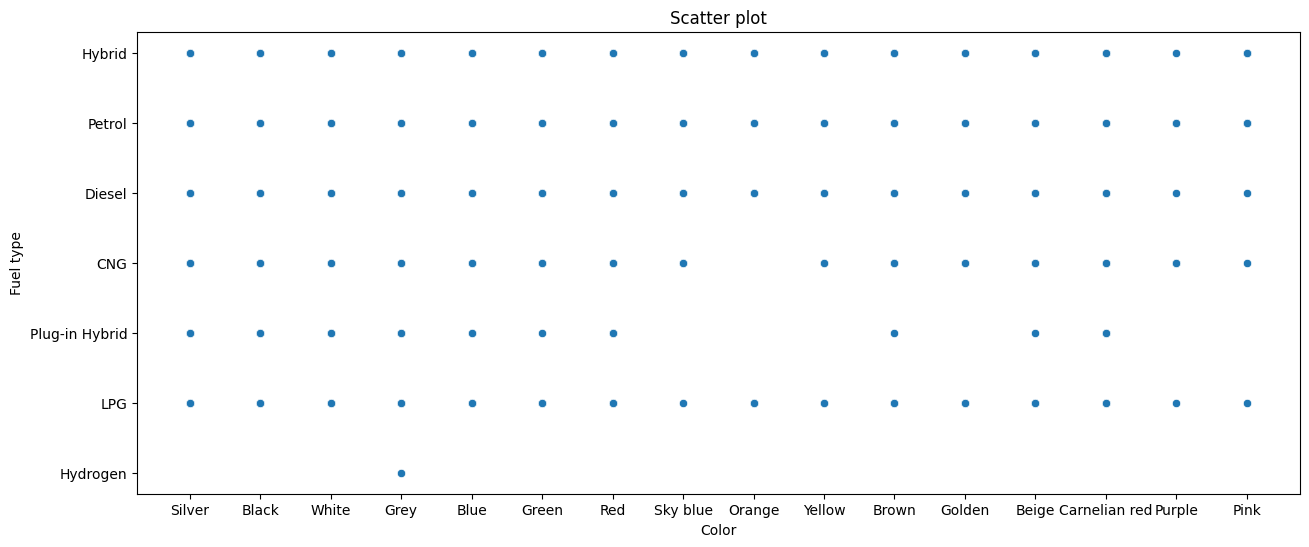

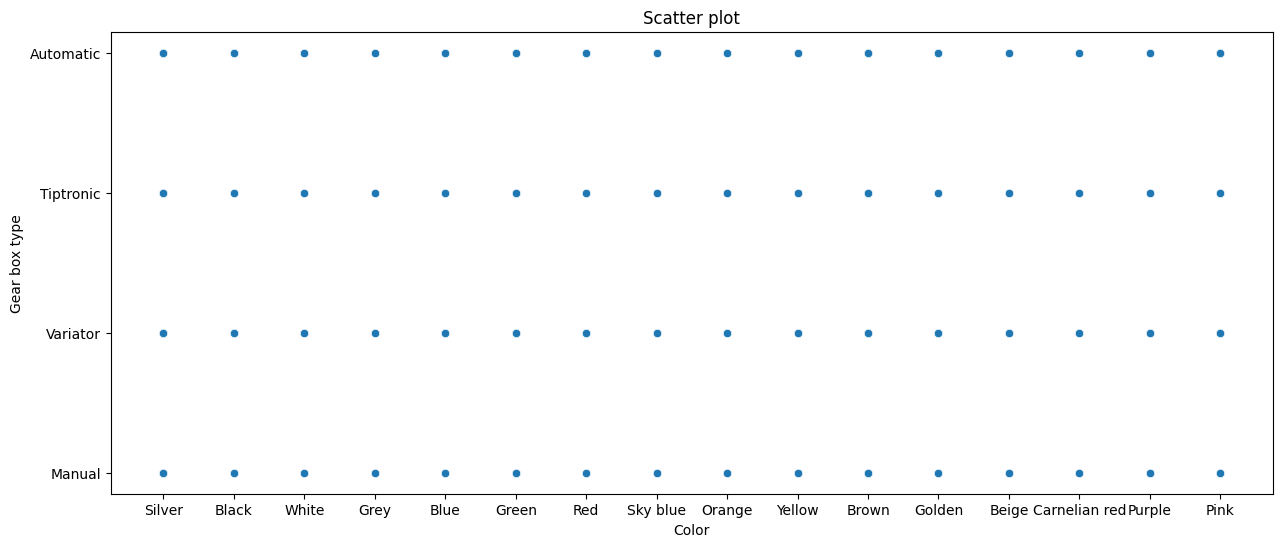

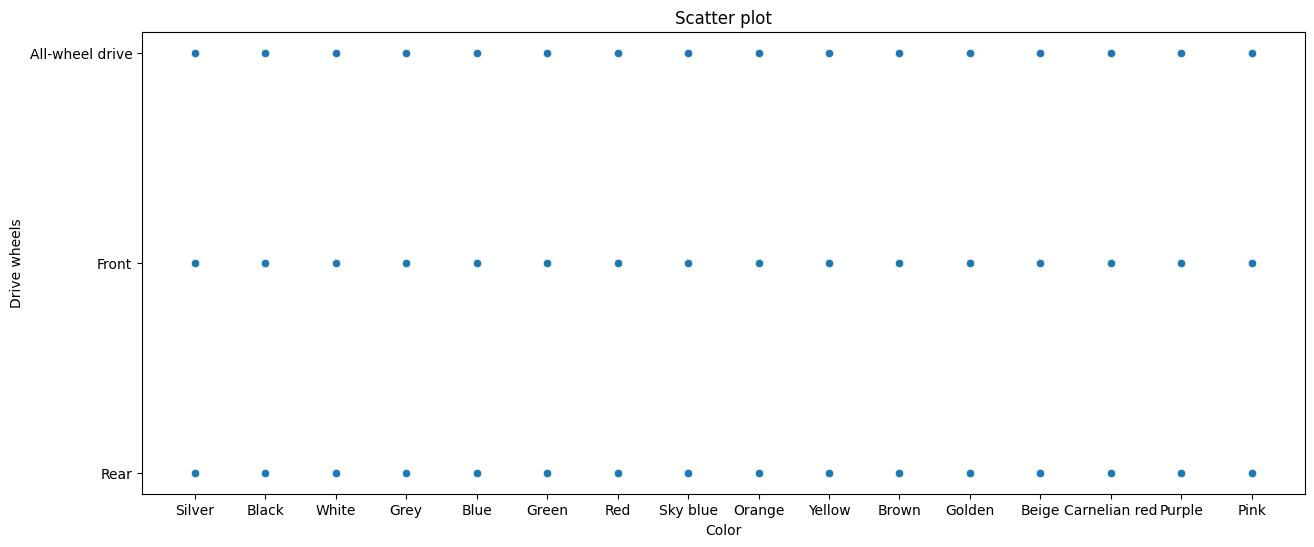

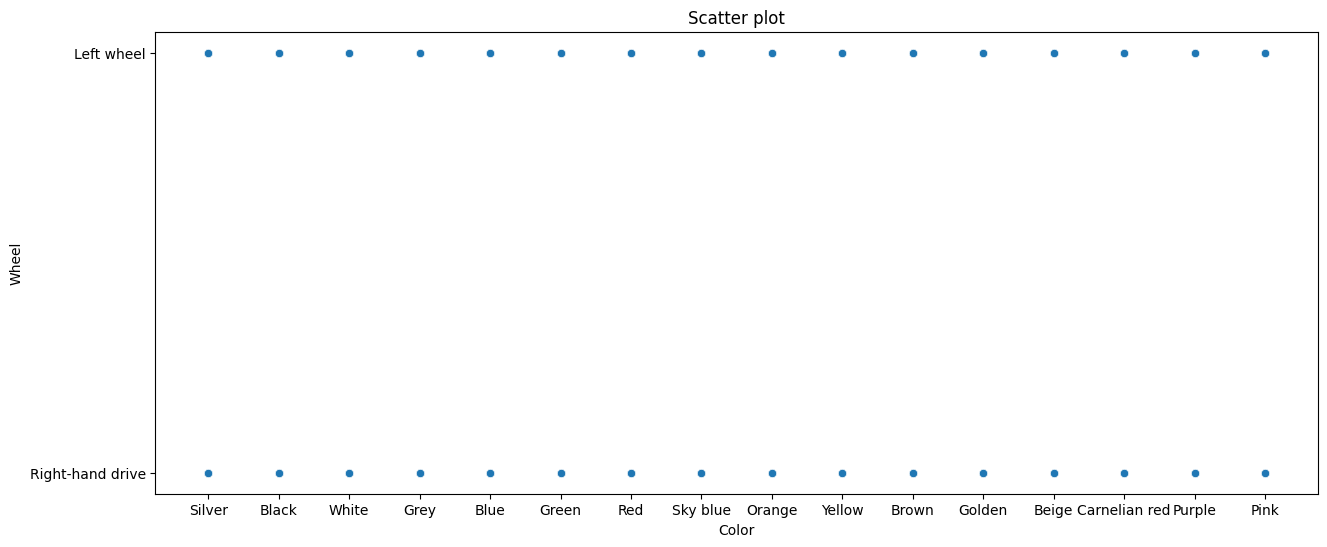

In [ ]:
for i in categorical:
    for j in categorical:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

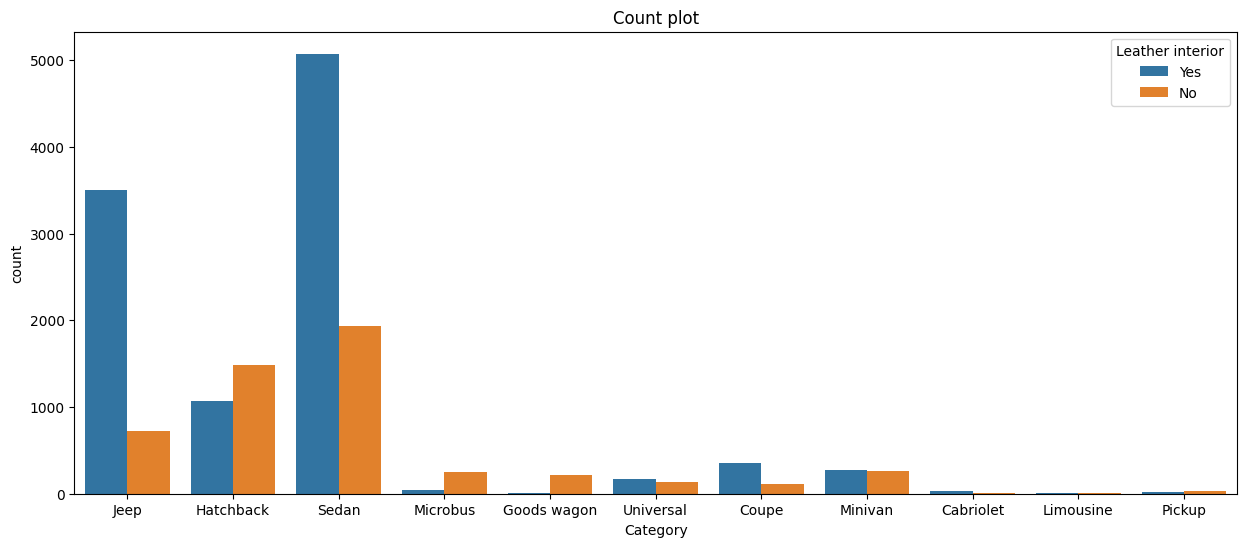

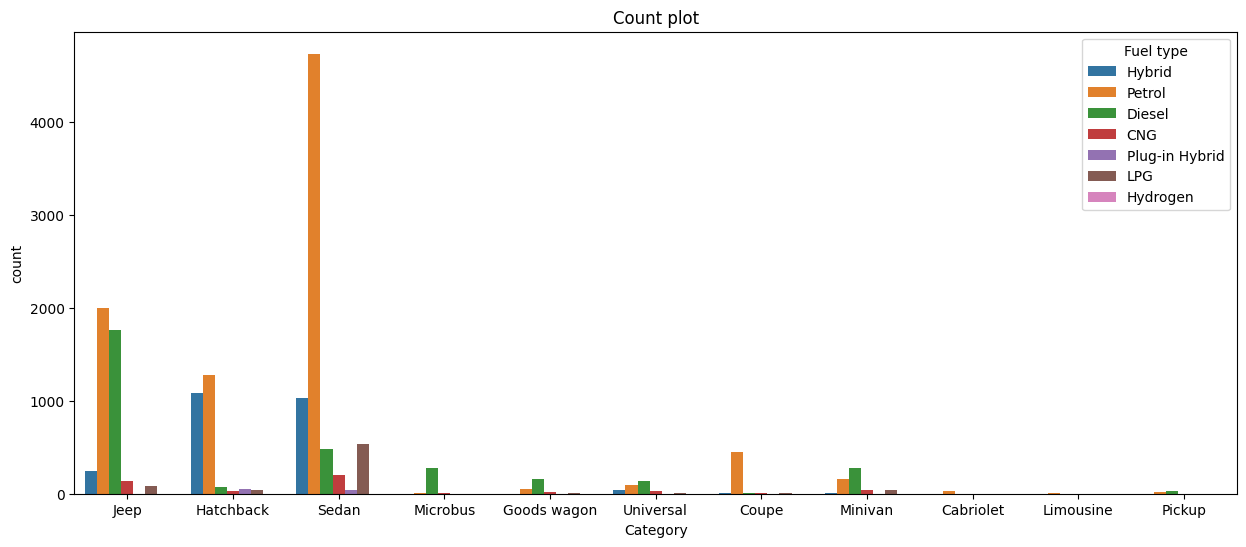

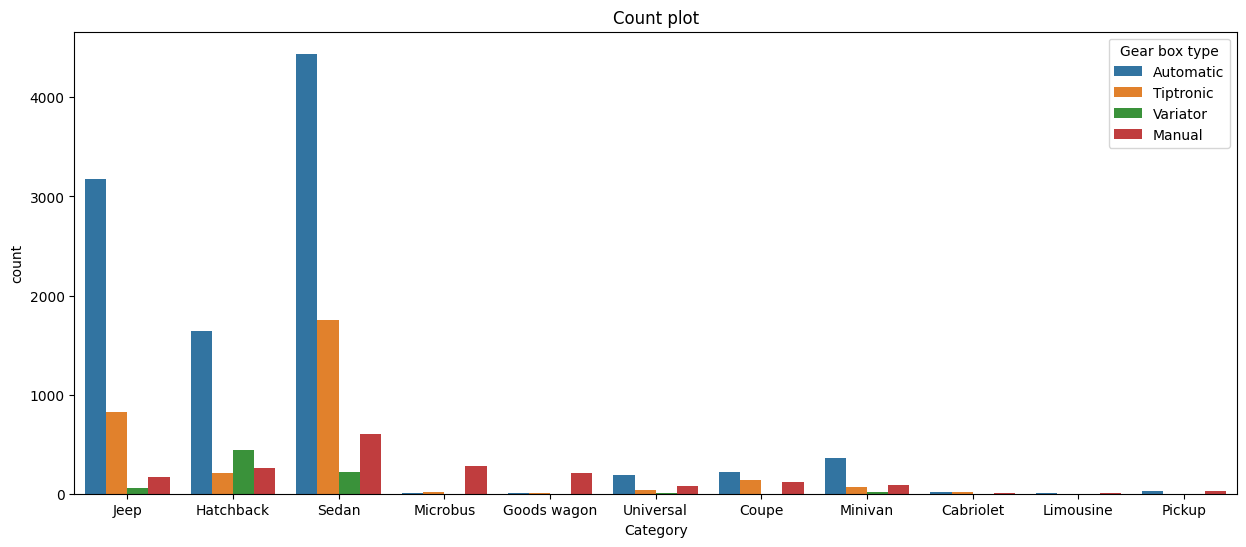

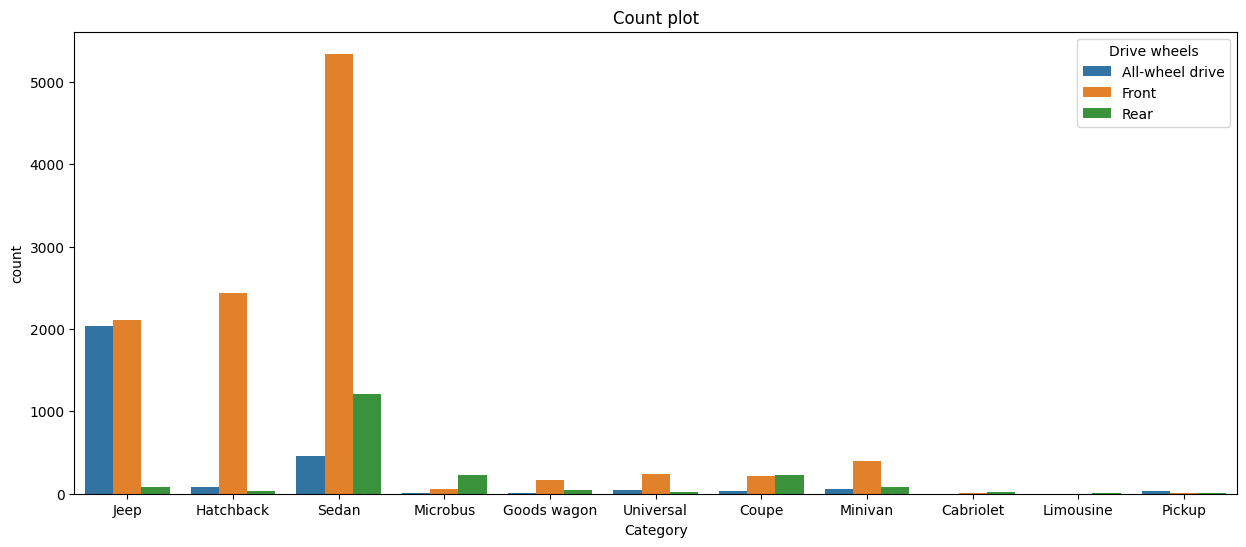

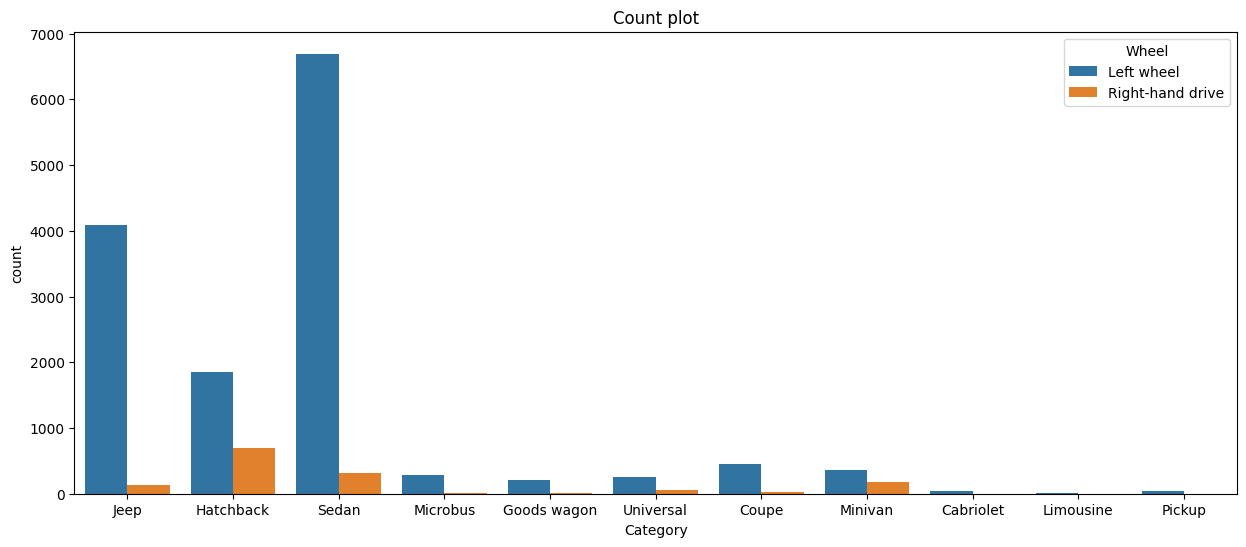

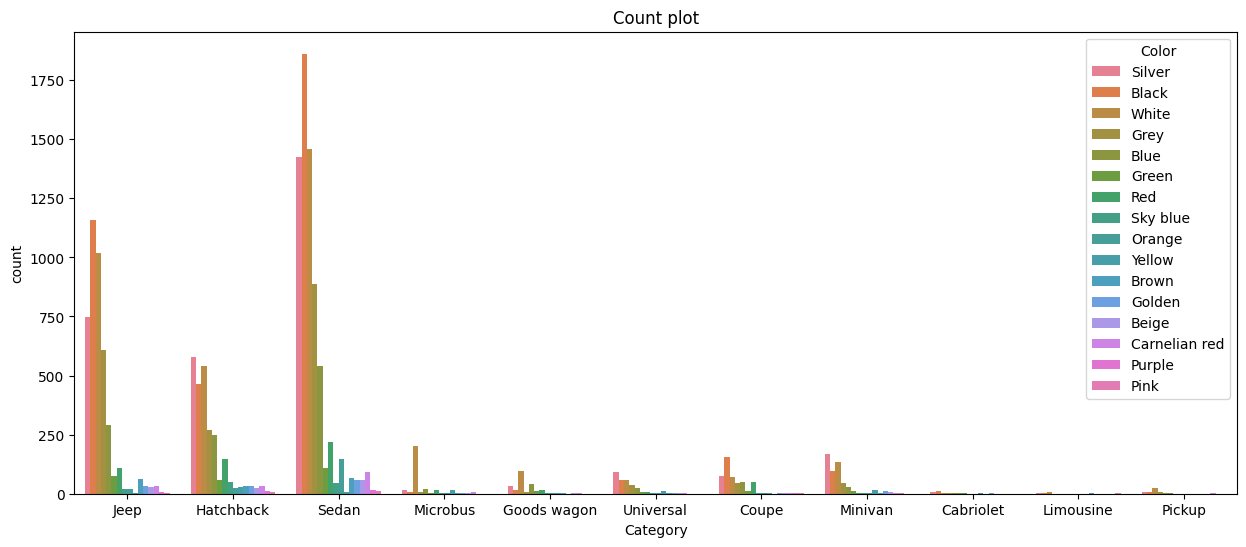

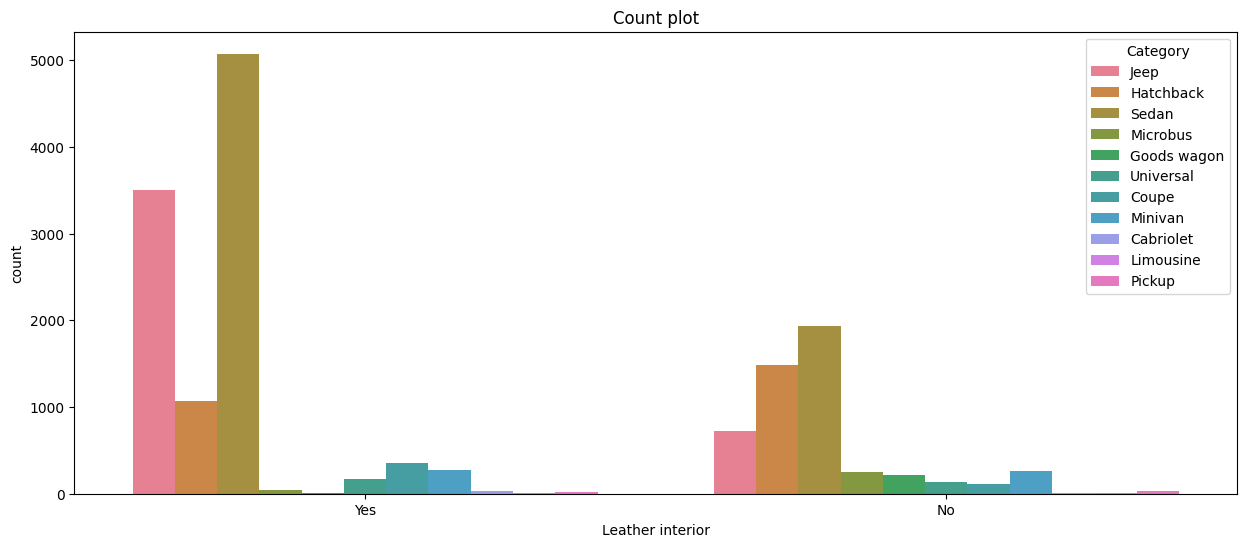

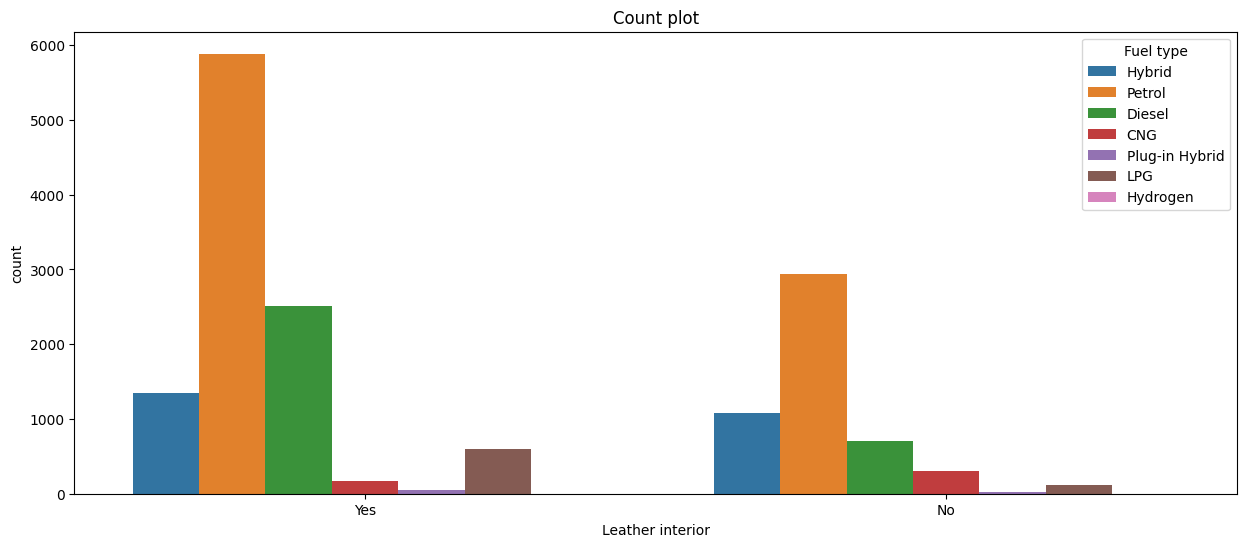

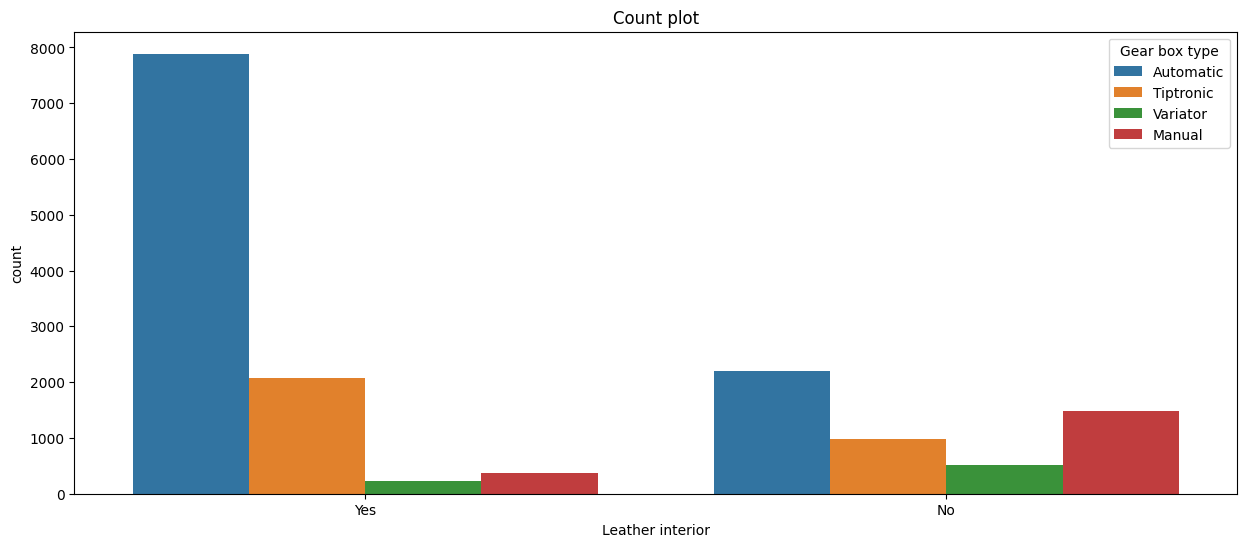

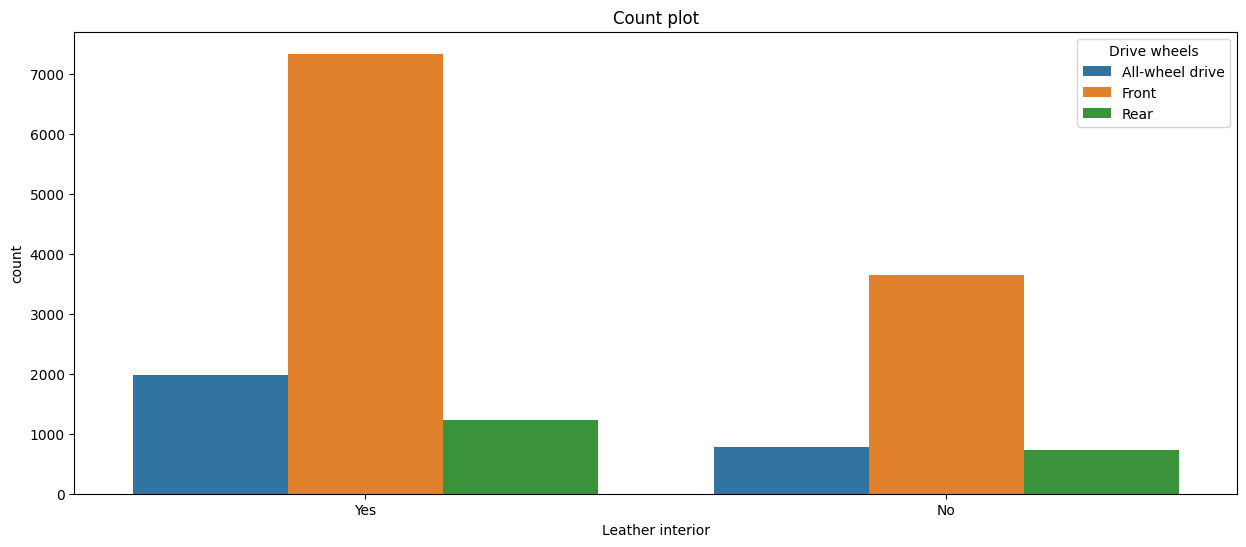

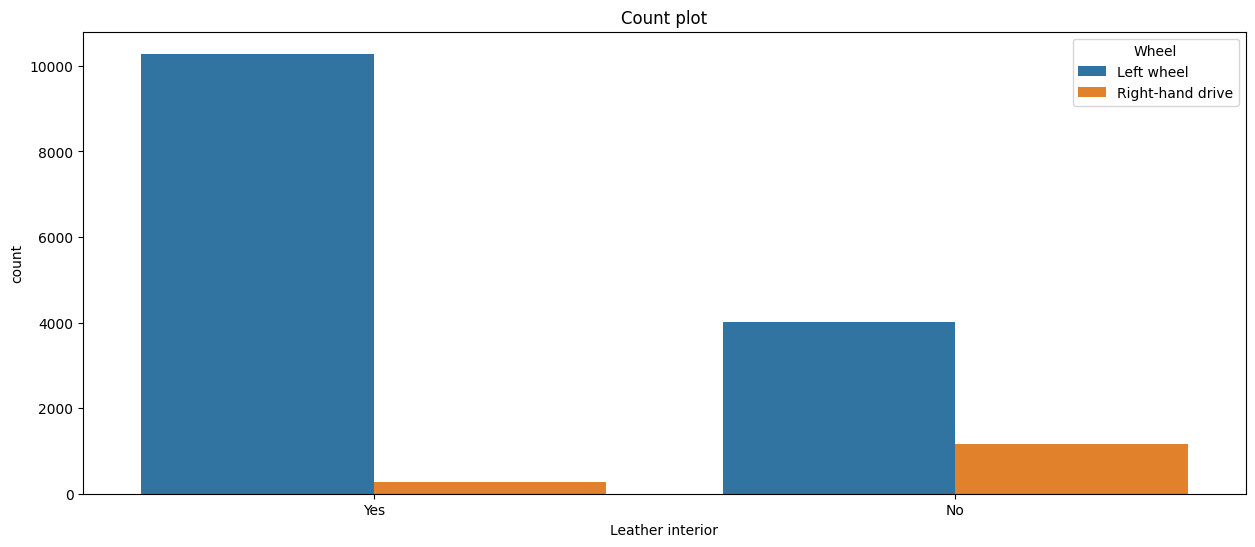

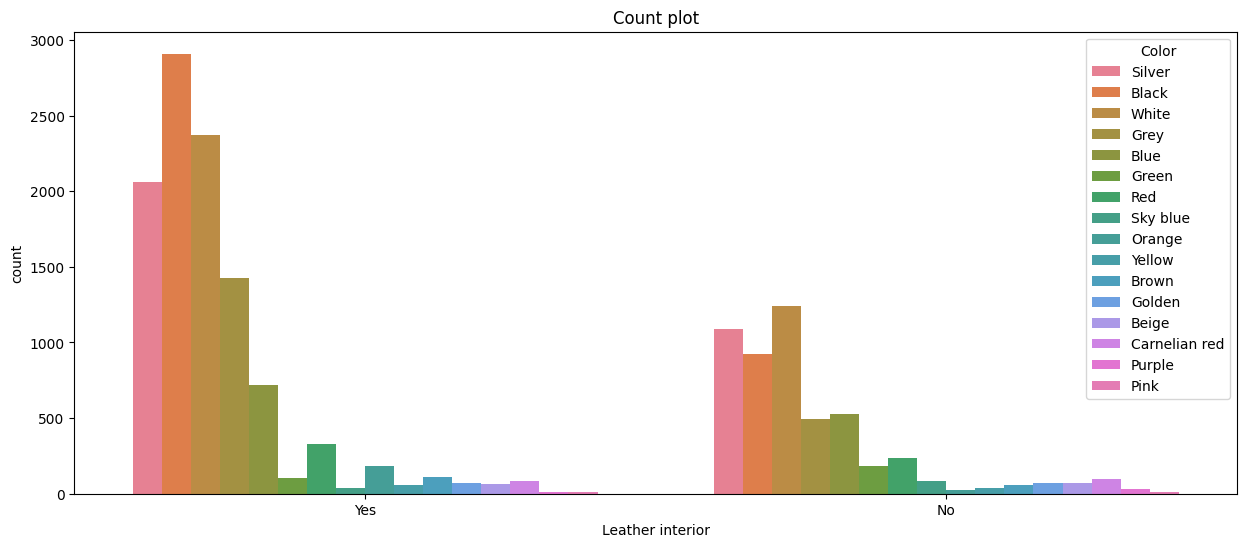

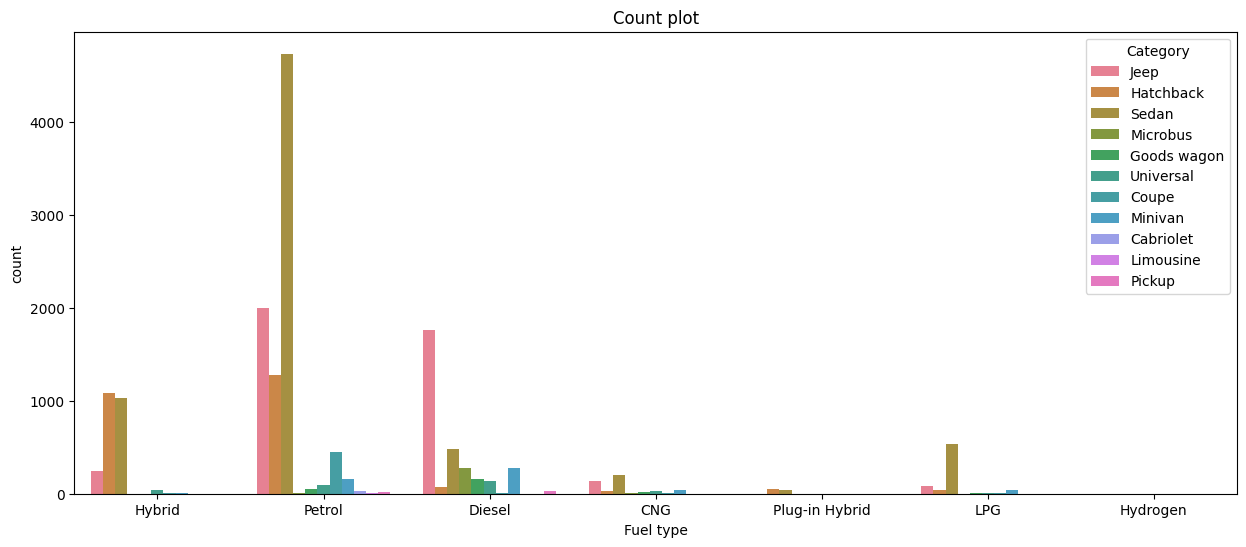

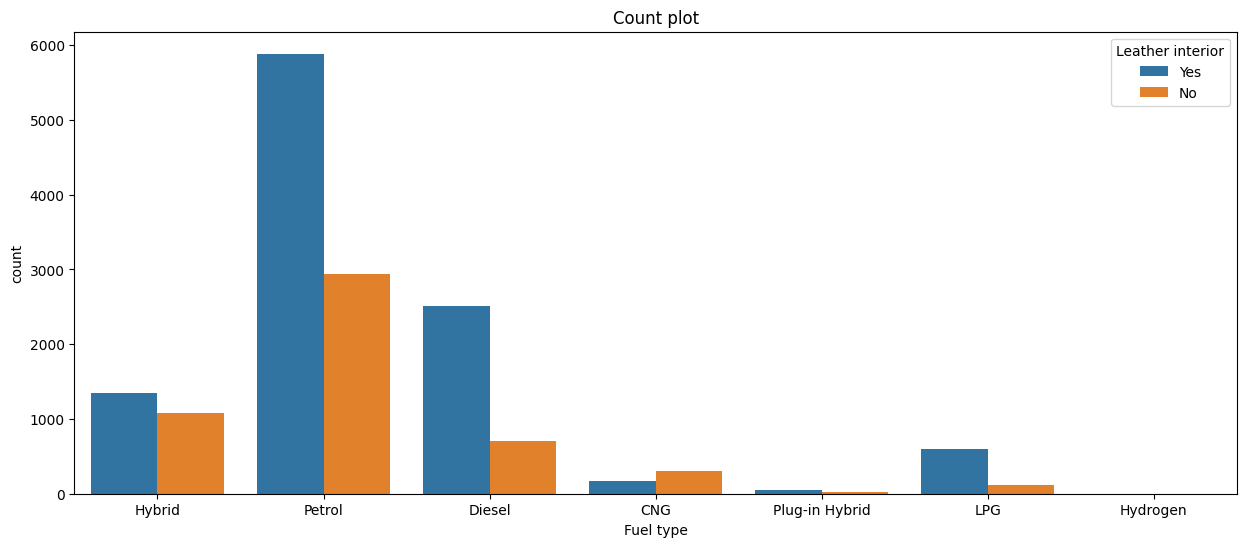

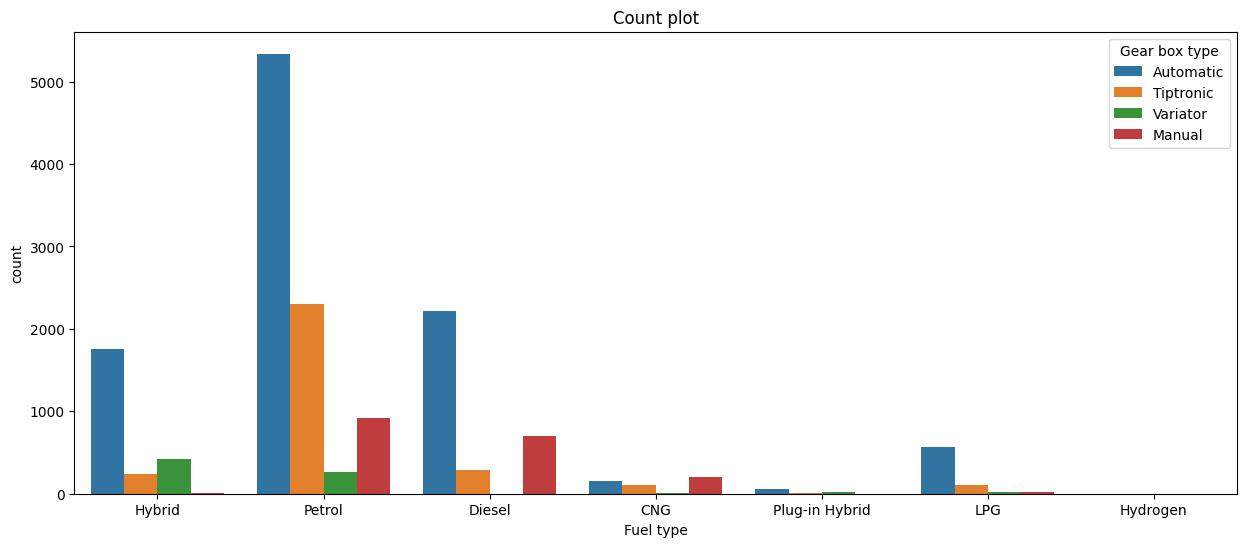

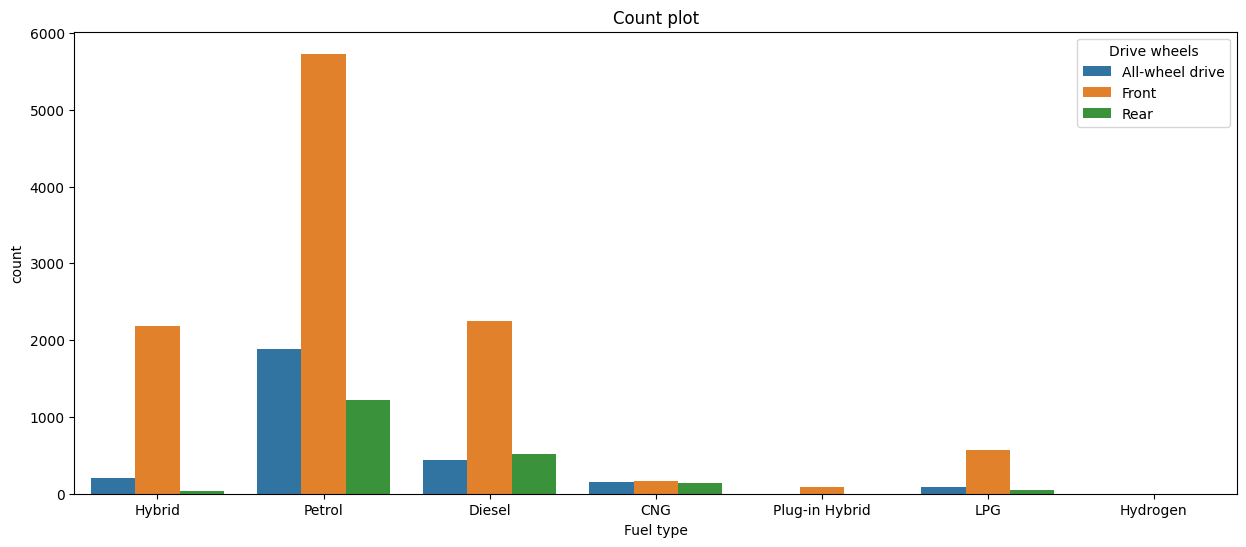

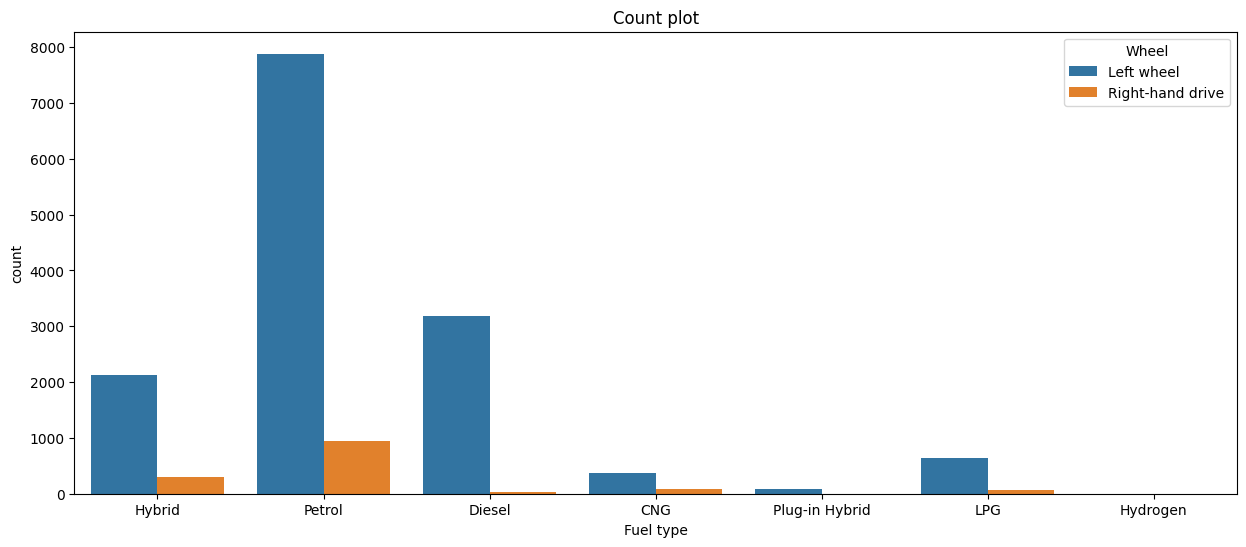

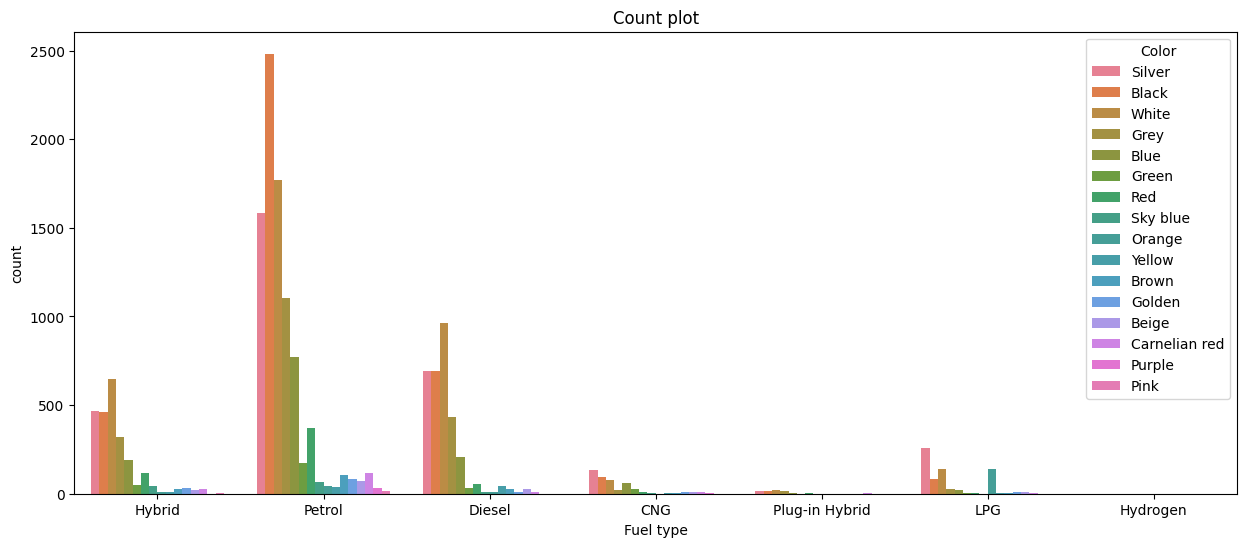

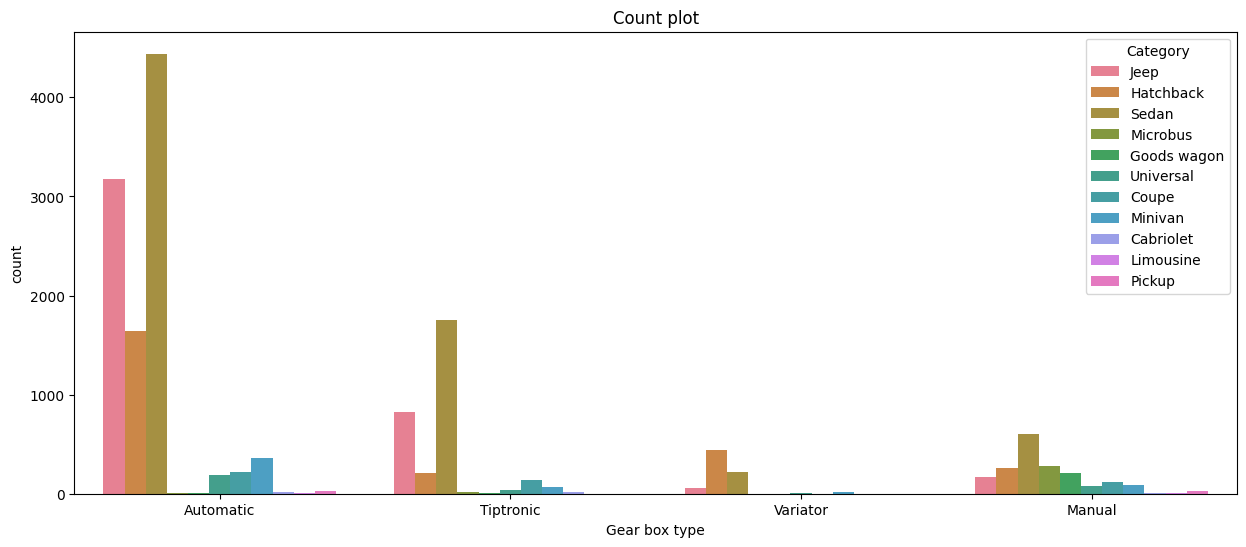

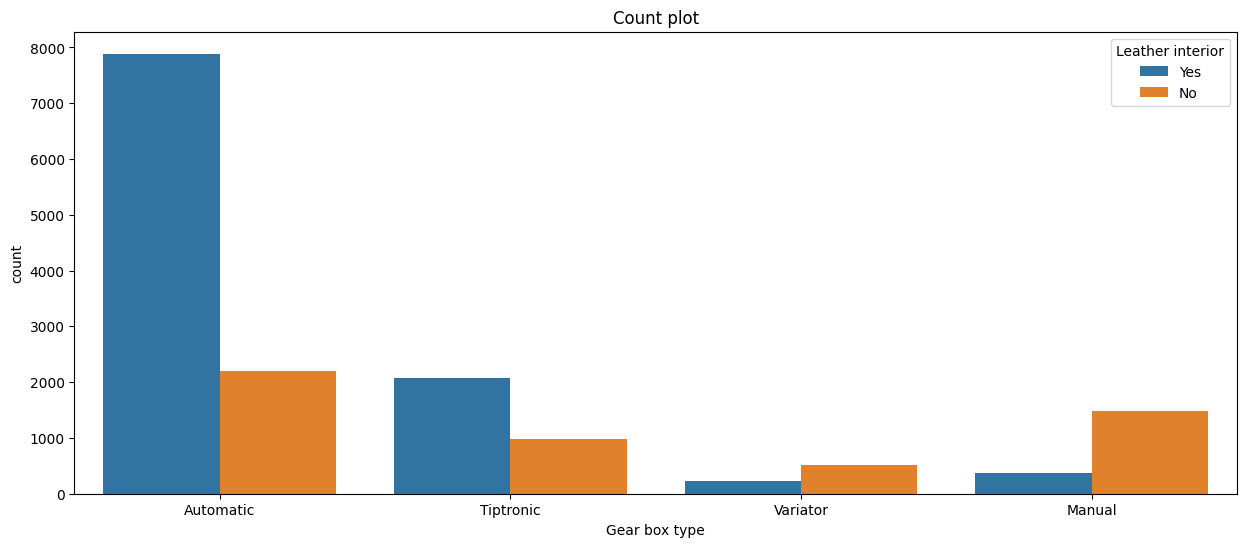

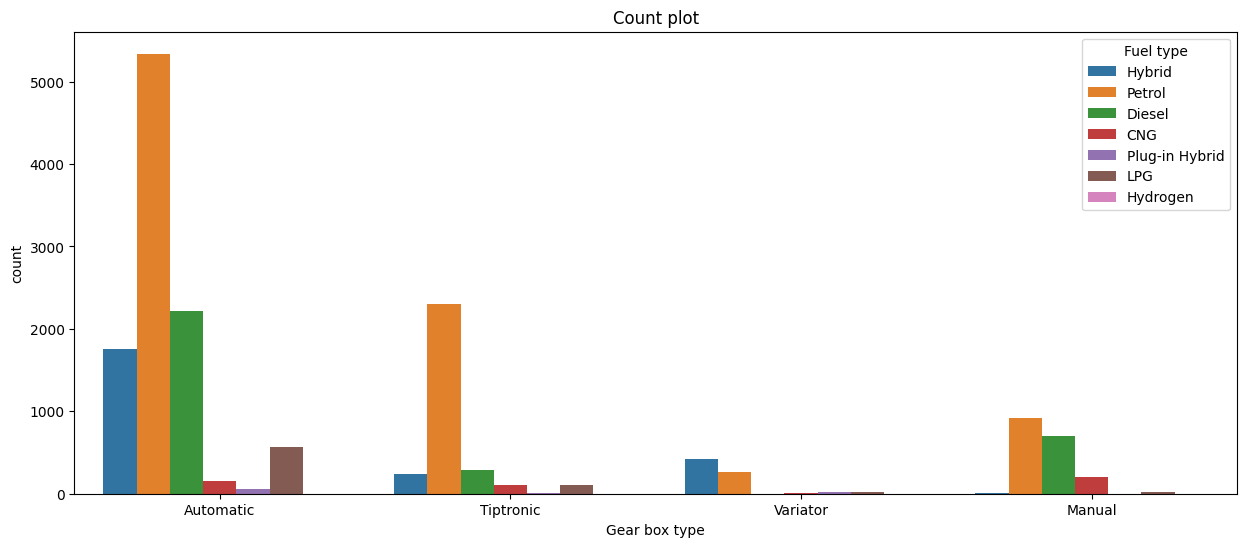

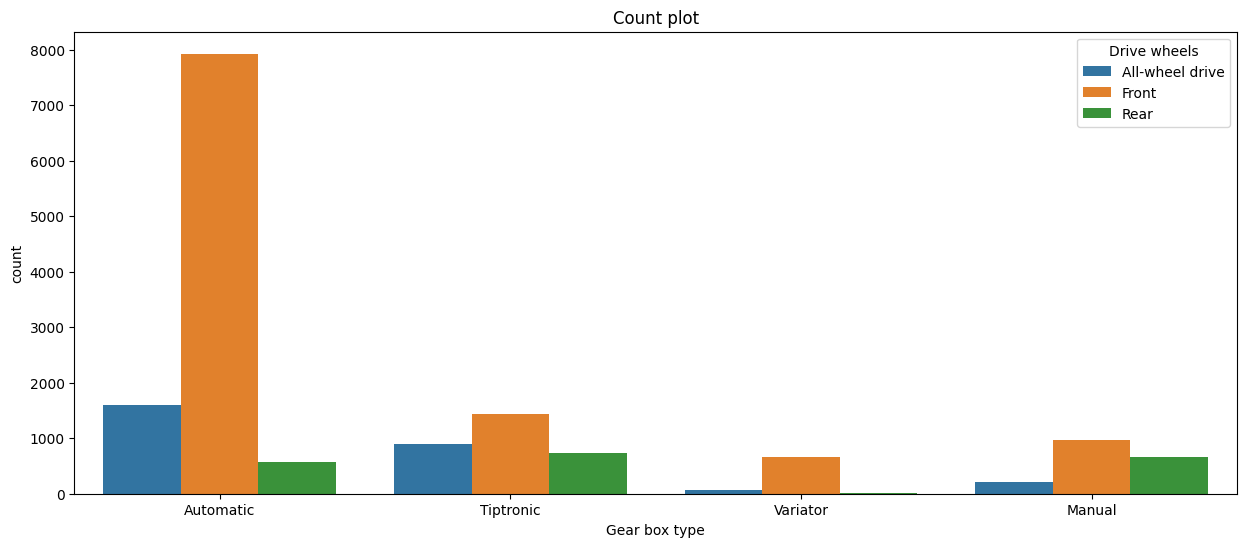

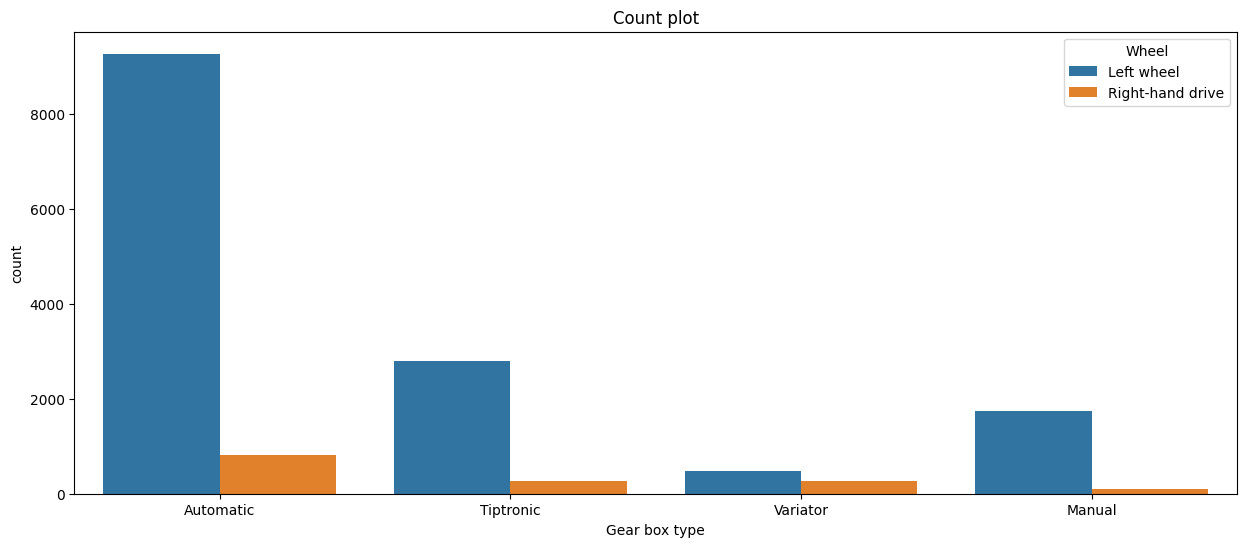

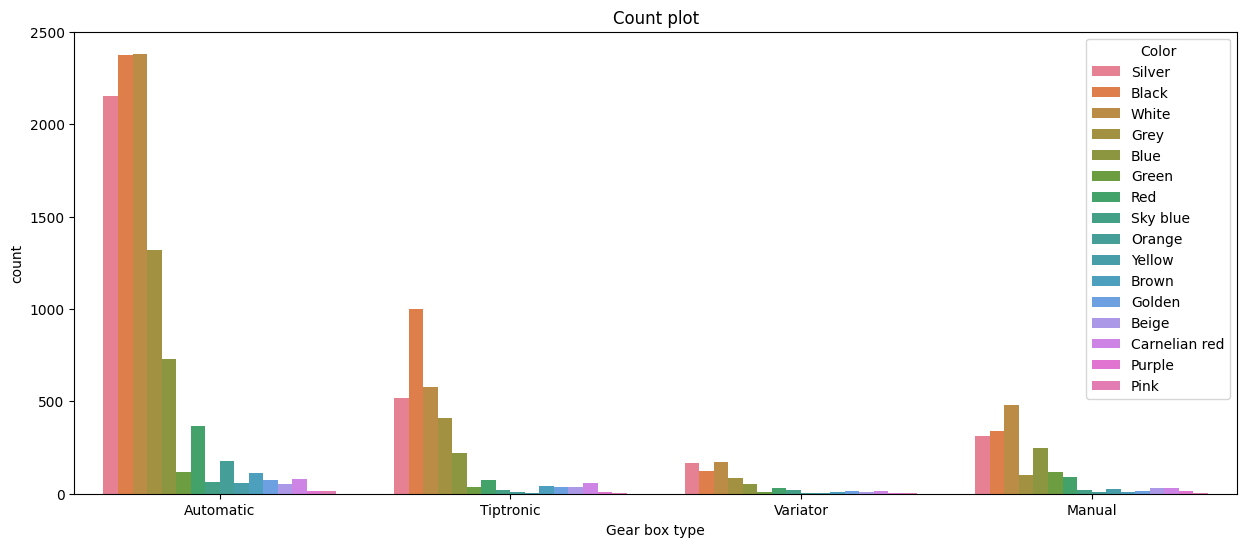

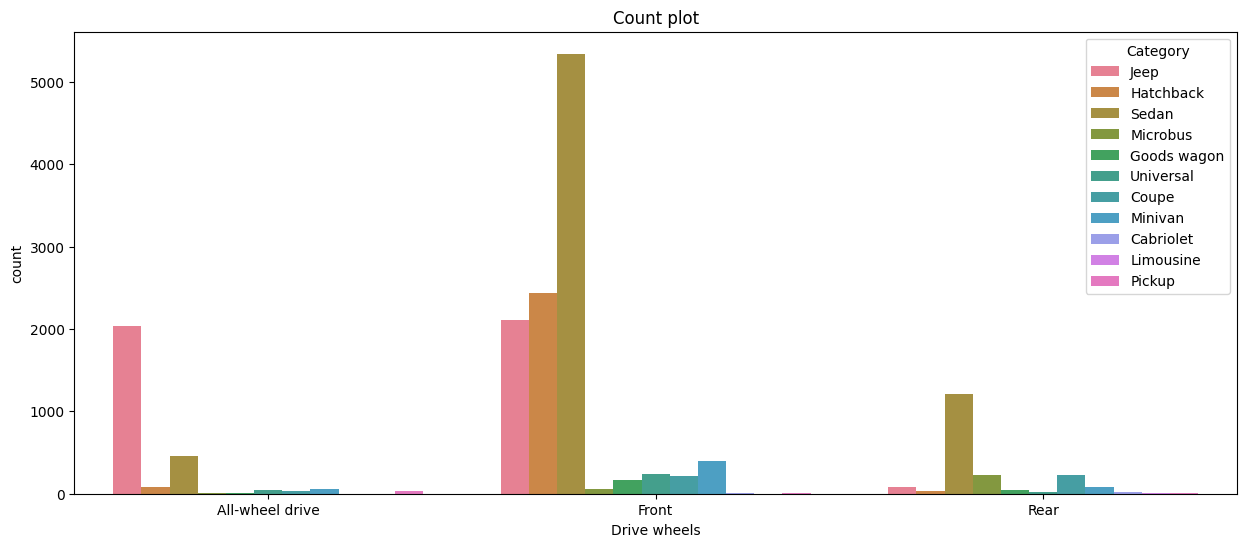

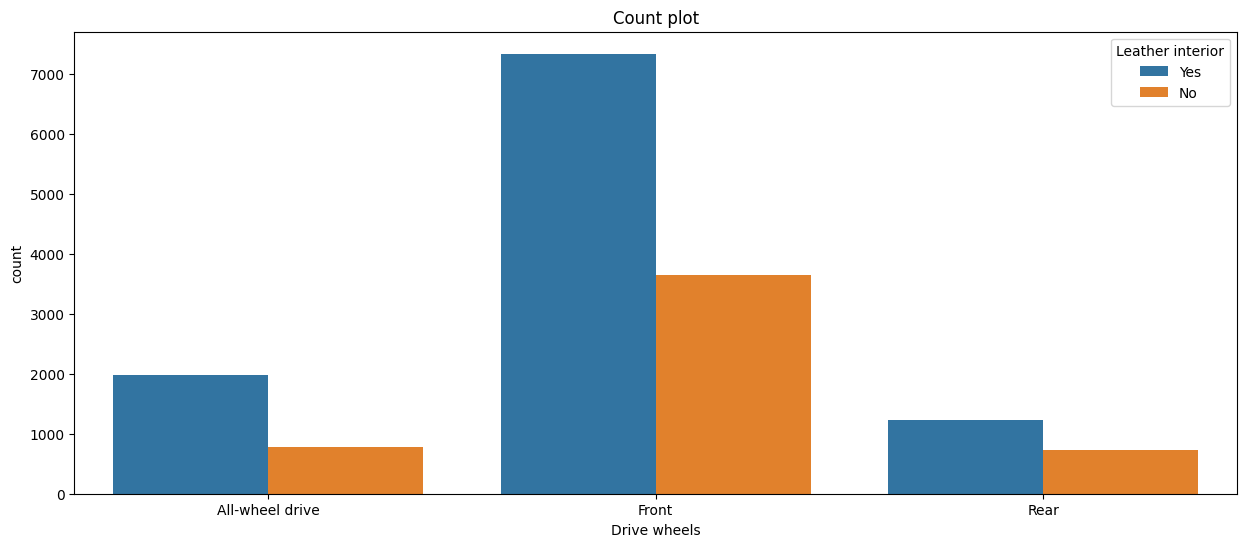

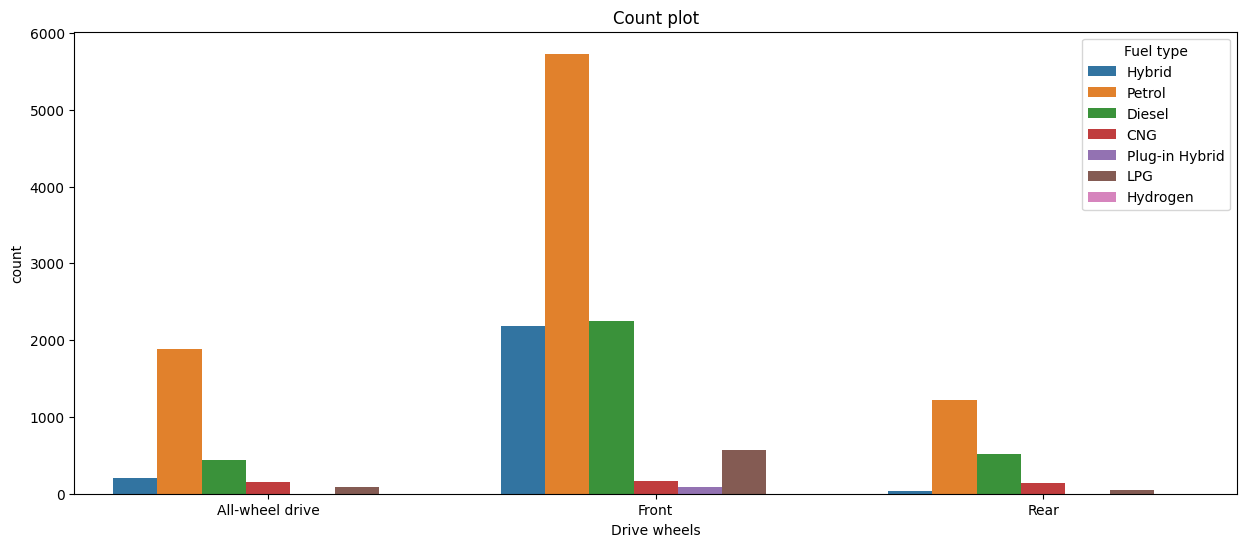

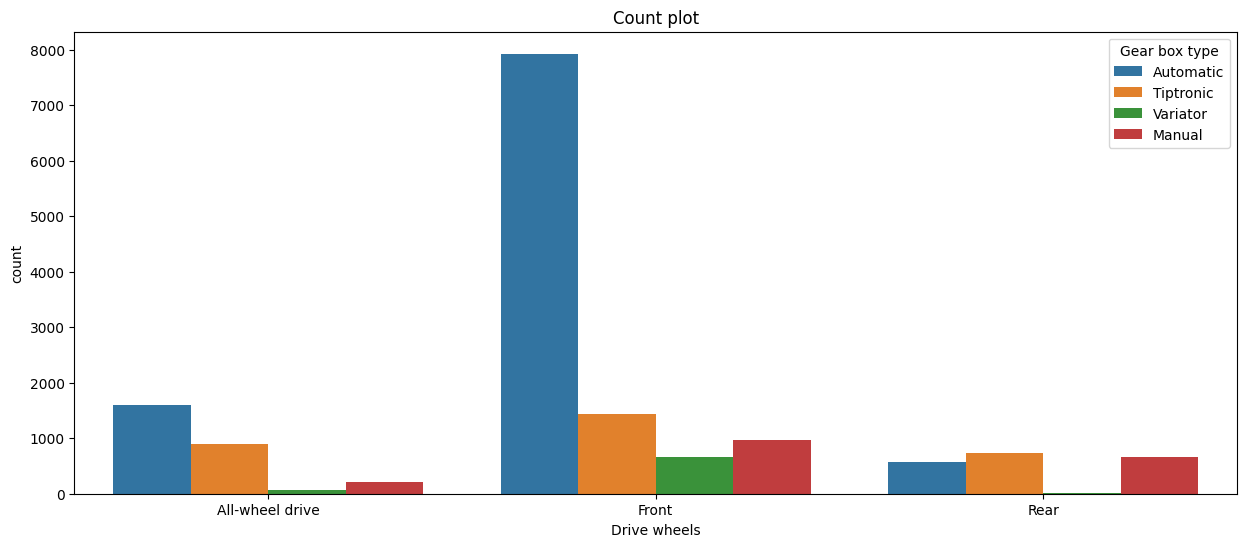

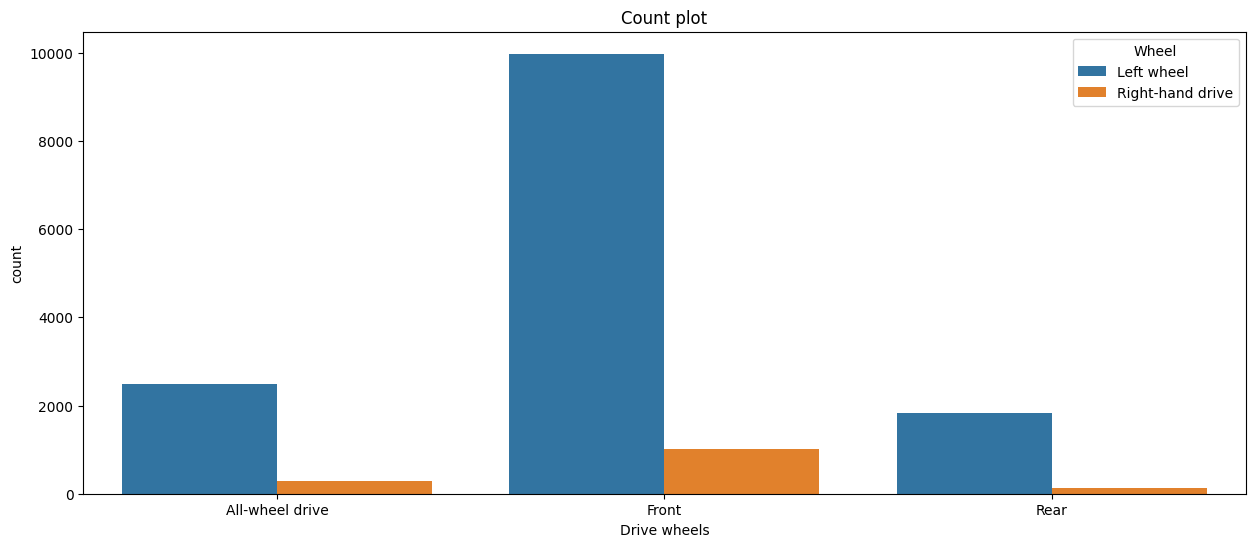

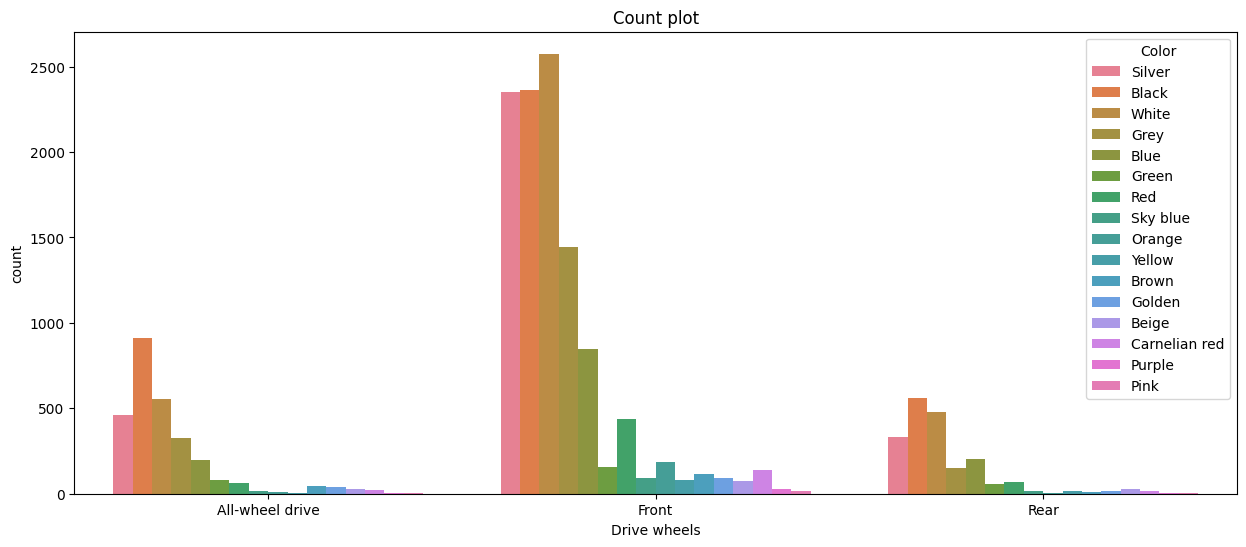

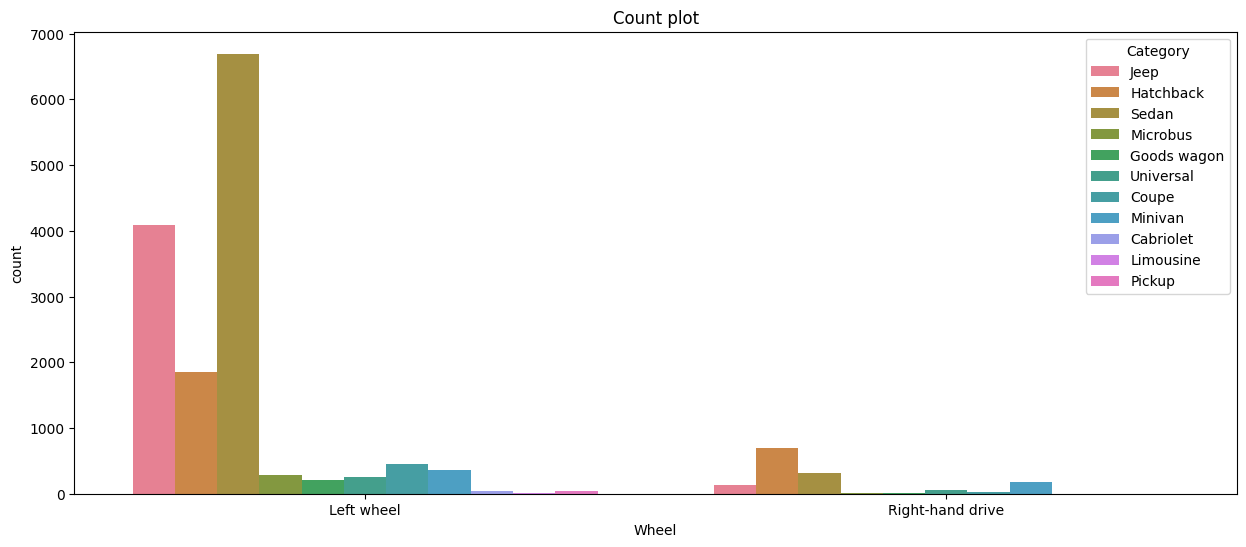

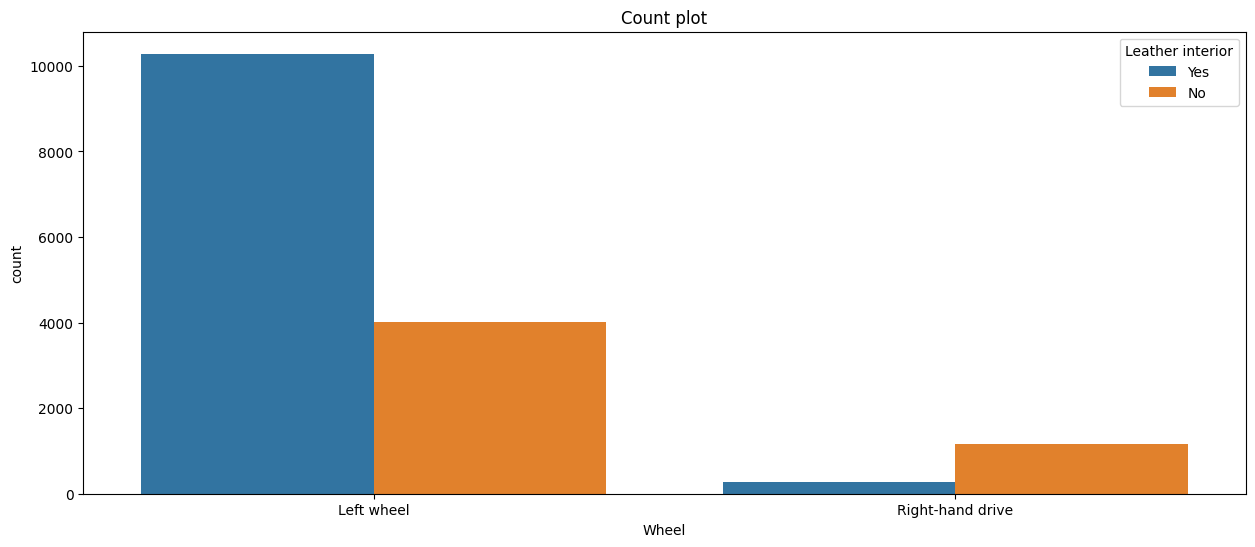

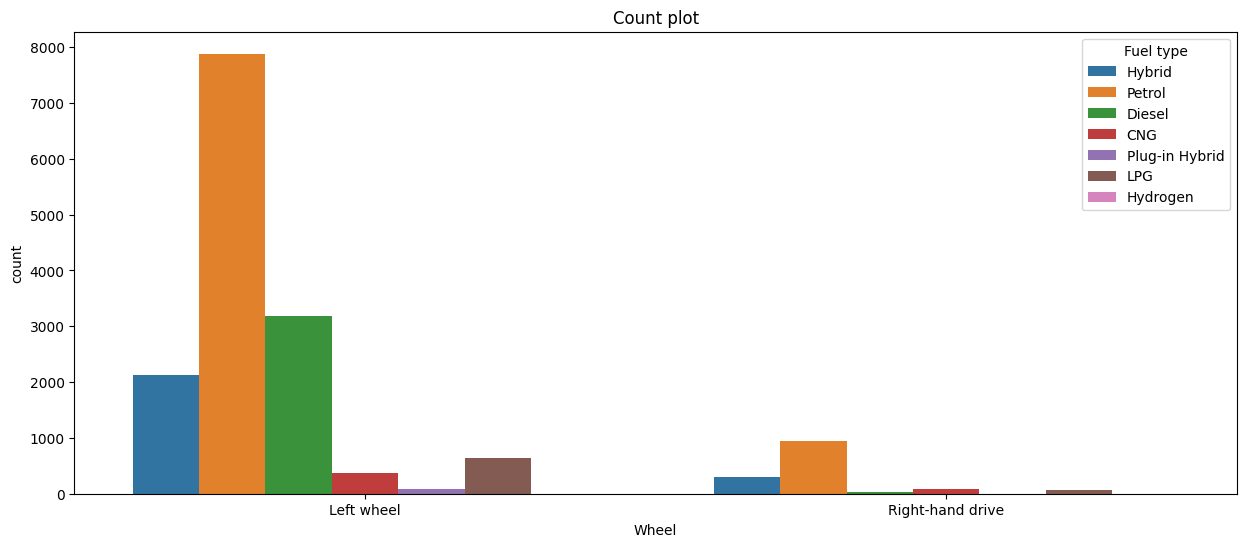

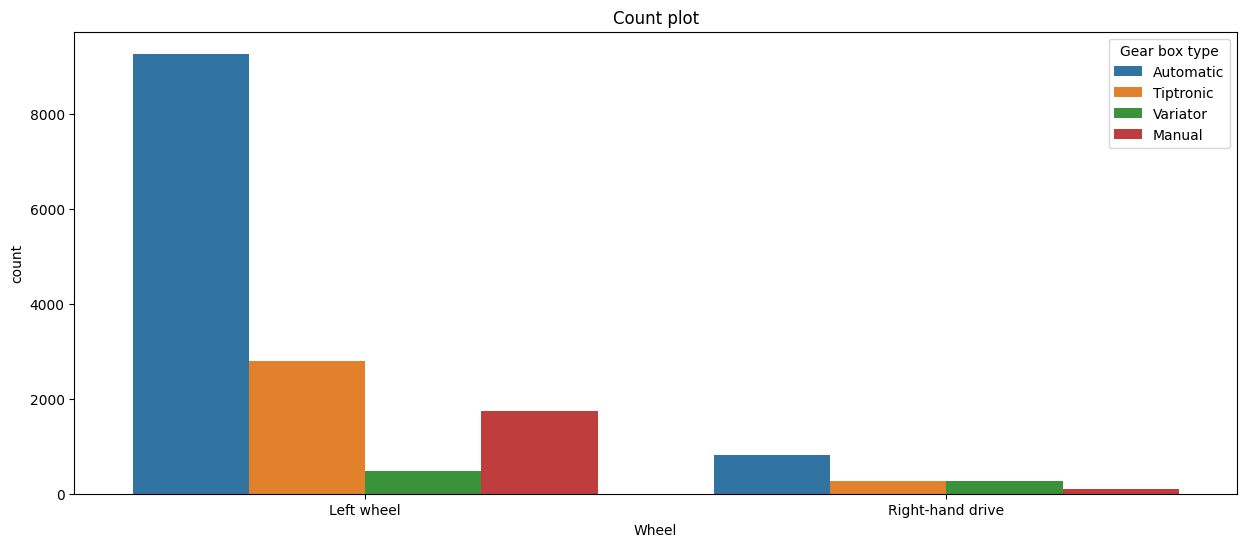

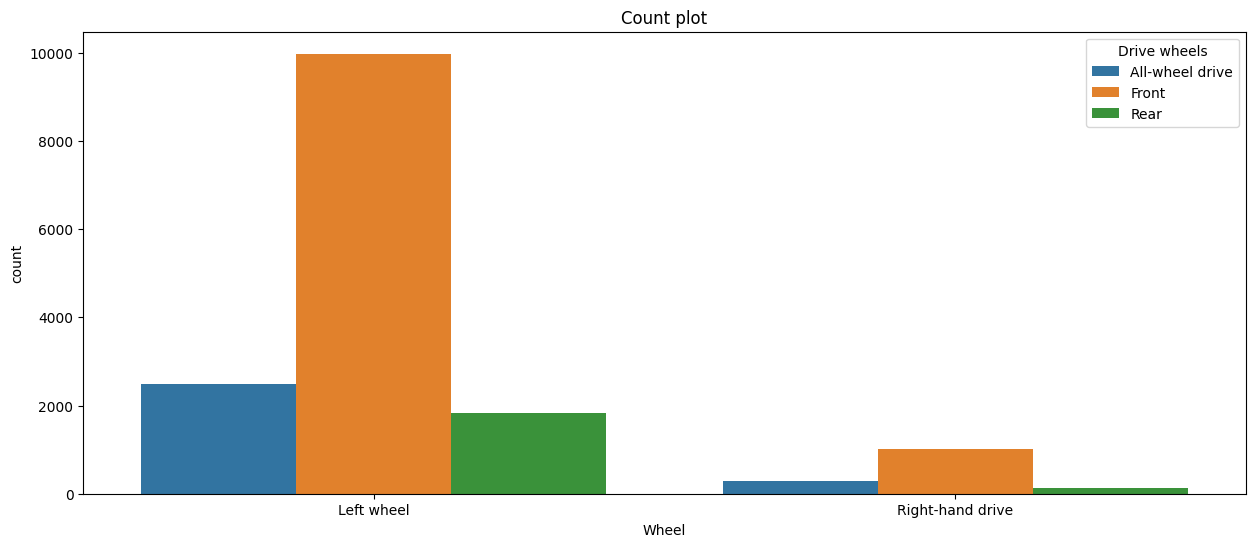

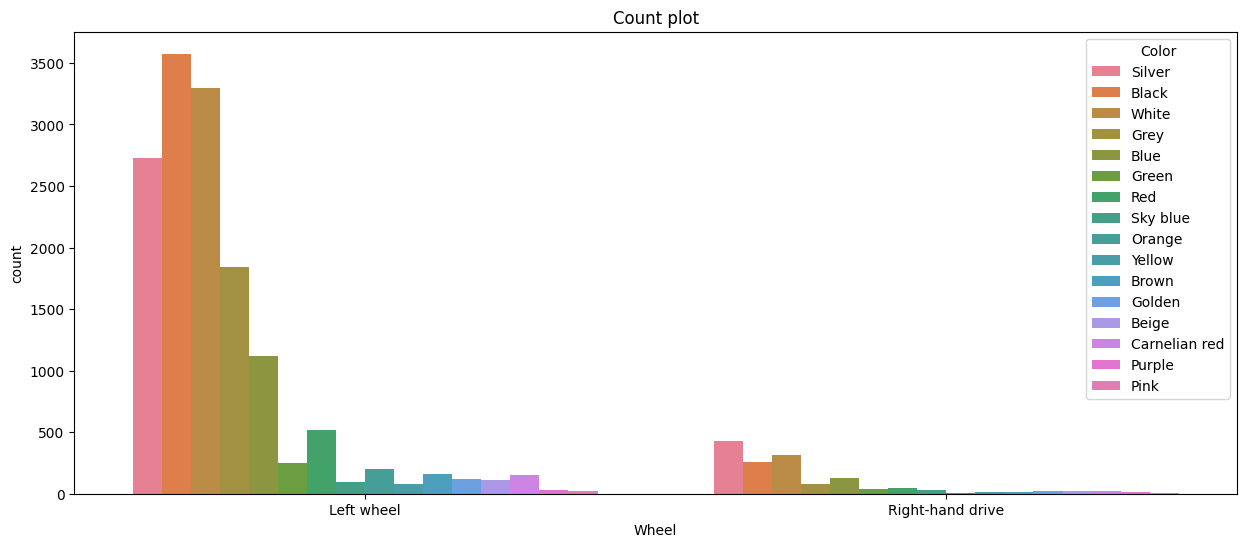

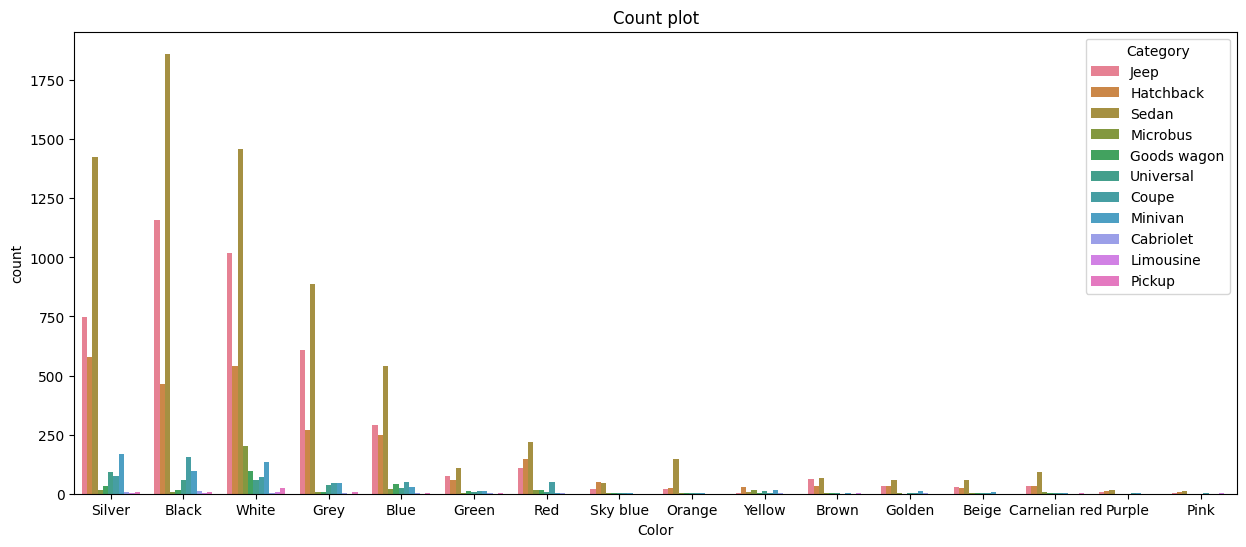

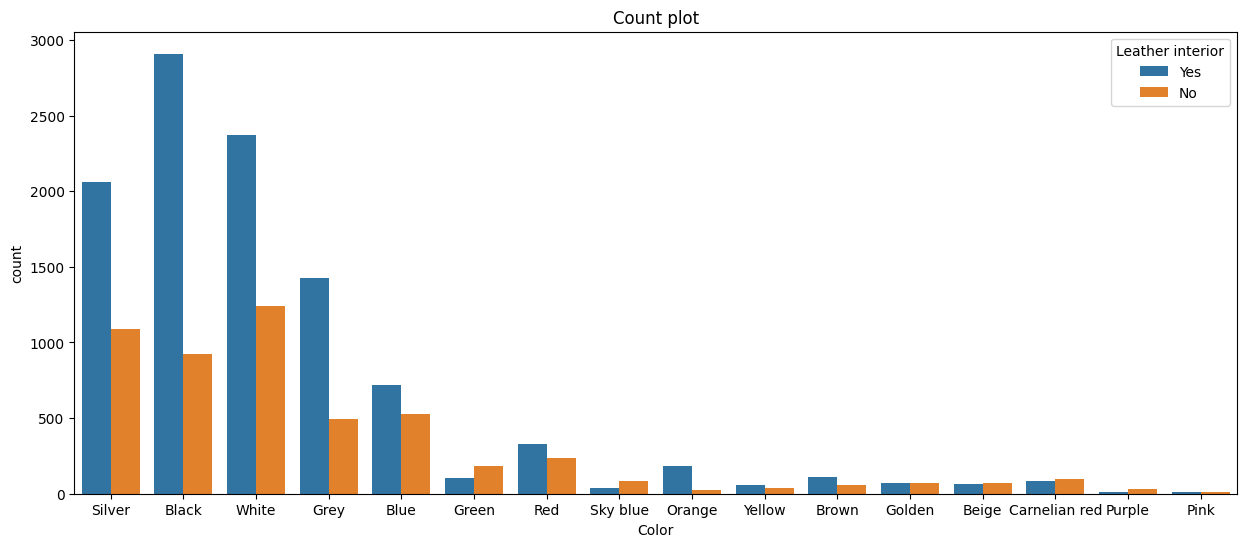

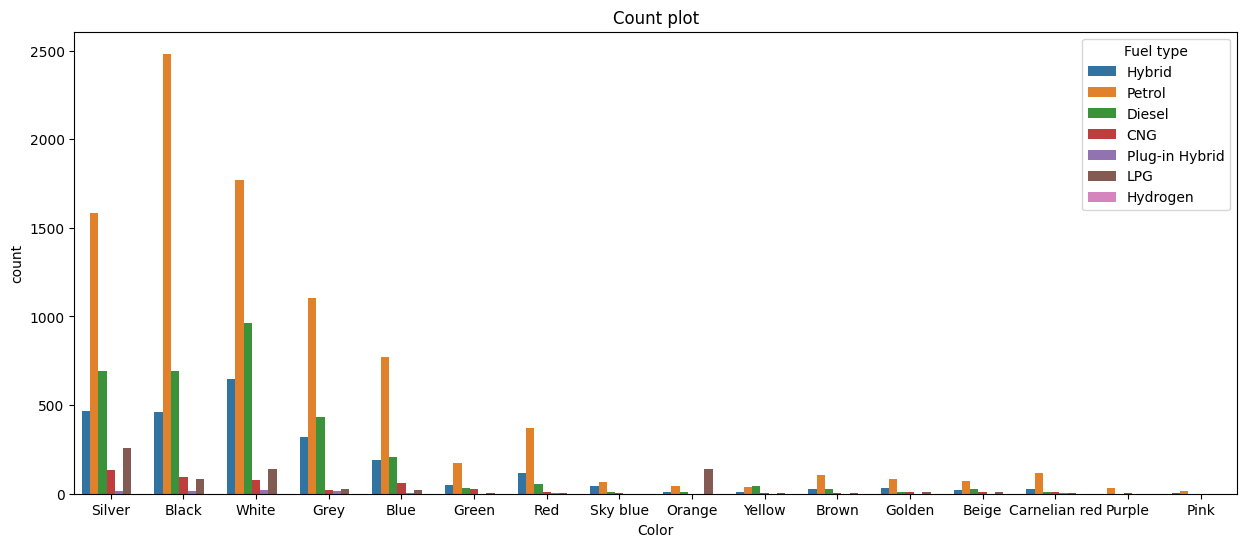

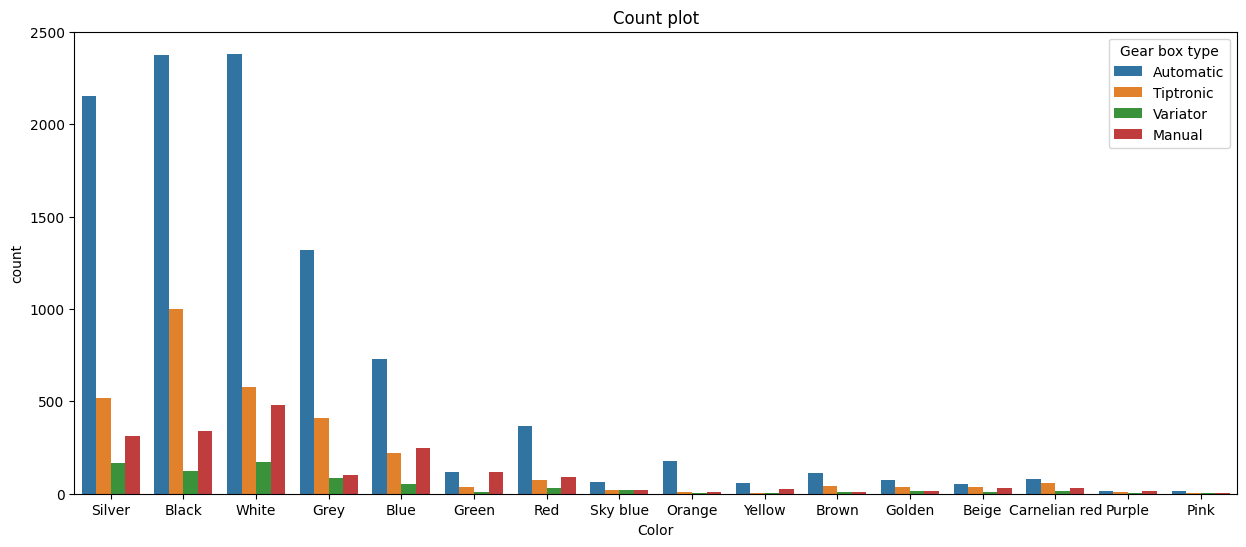

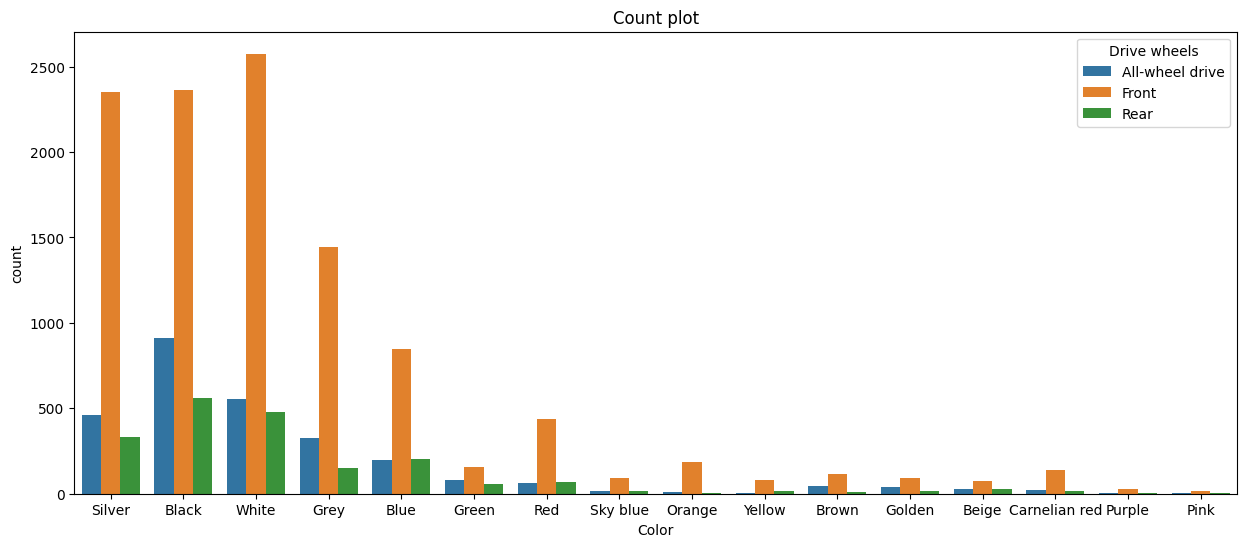

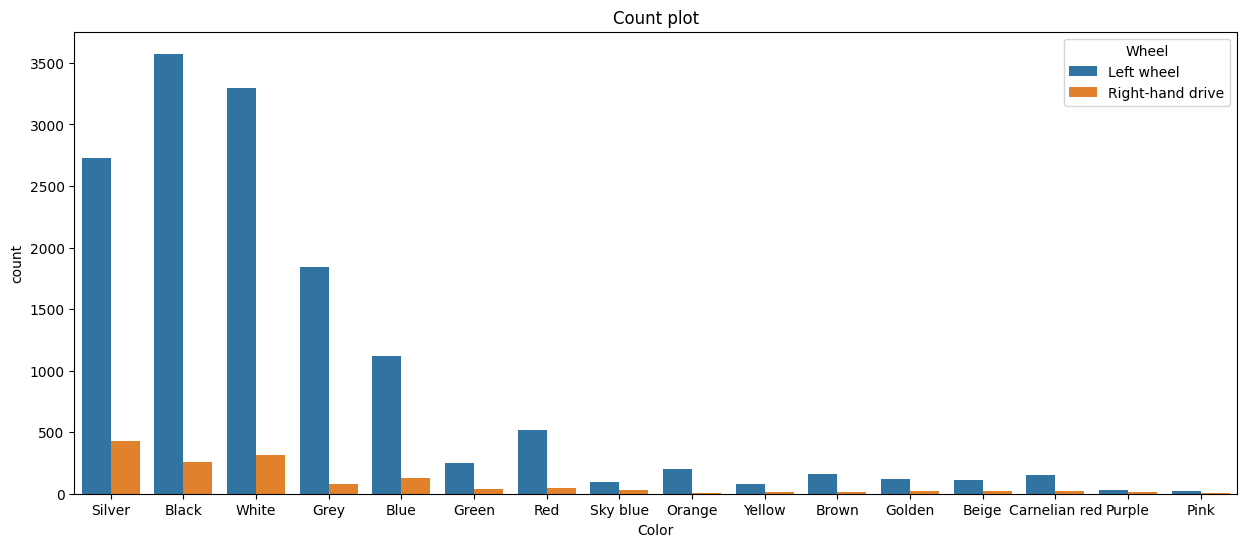

In [ ]:
for i in categorical:
    for j in categorical:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.countplot(data=df, x = i, hue = j)
          plt.title(f'Count plot')
          plt.show()

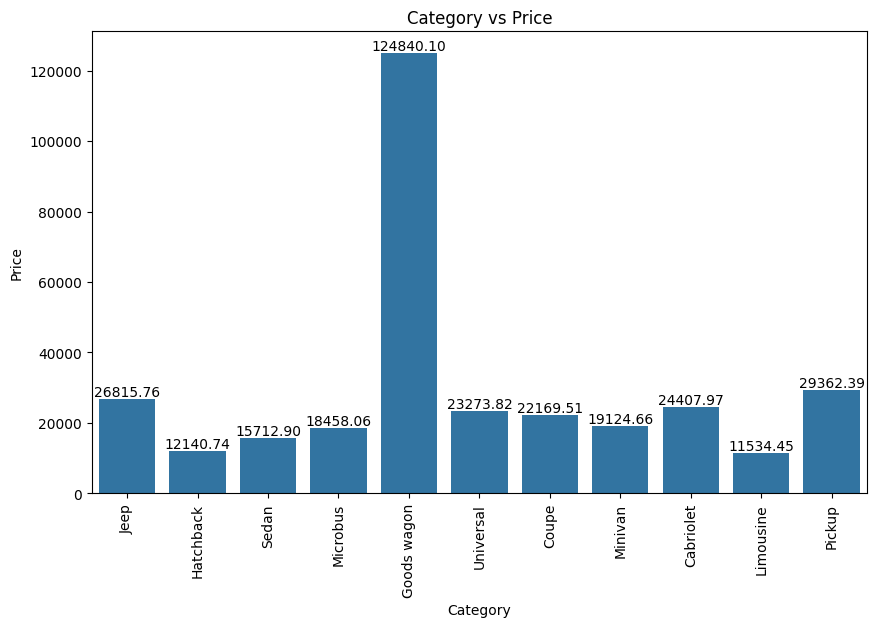

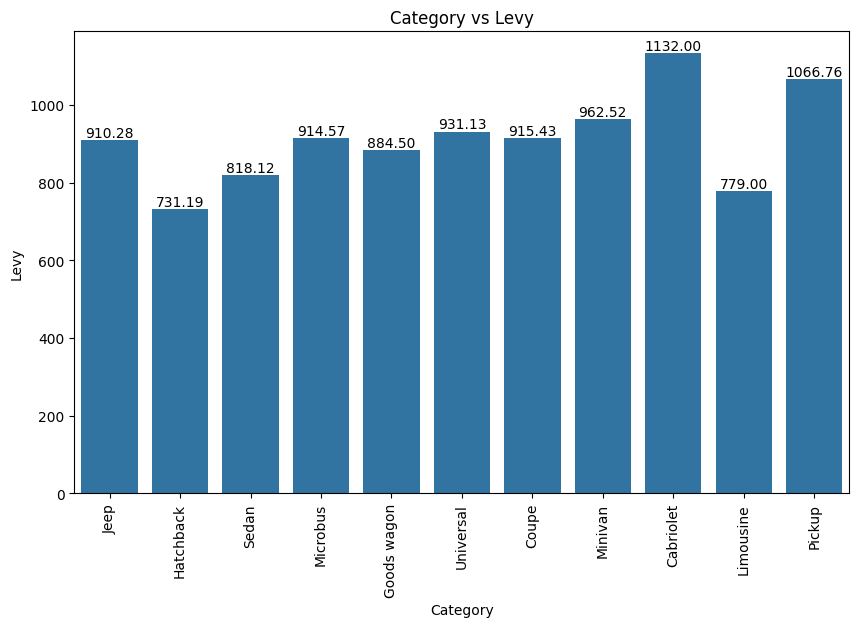

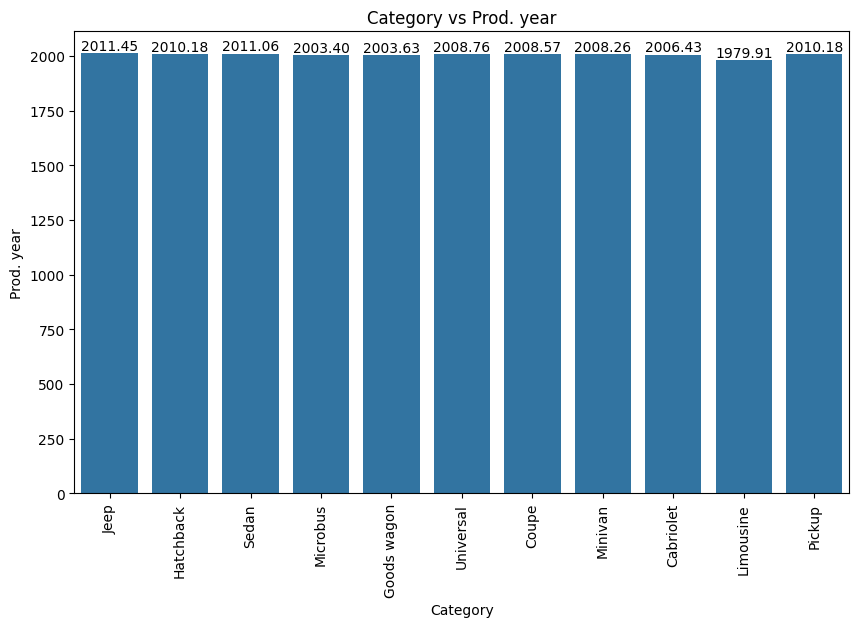

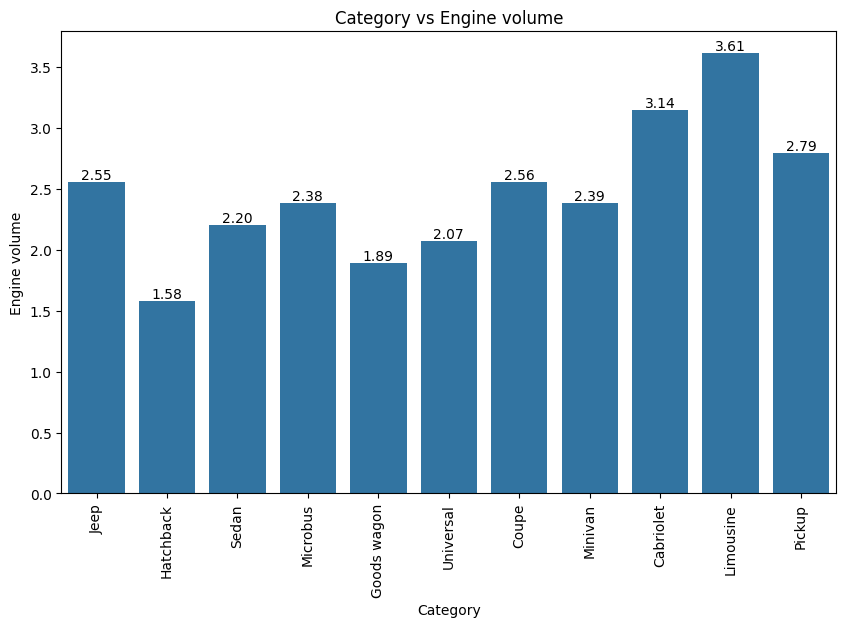

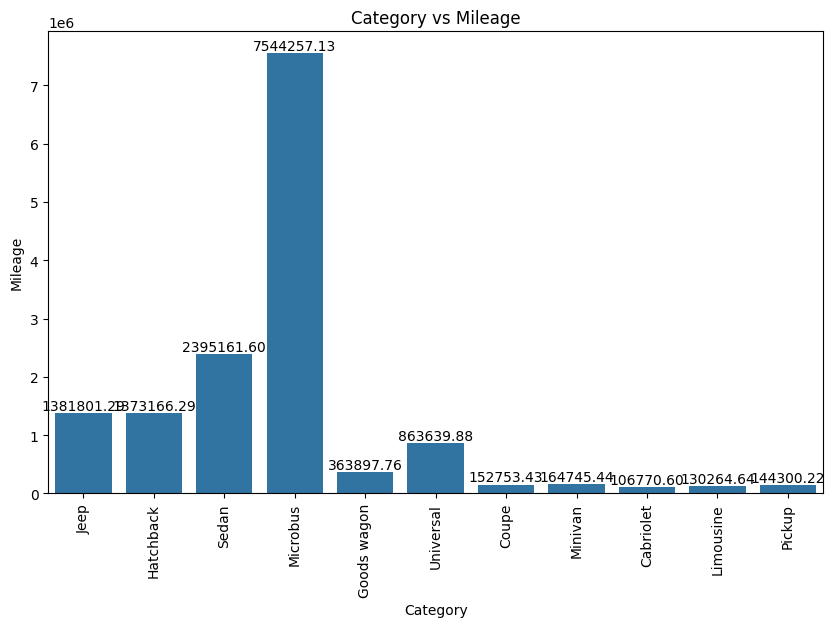

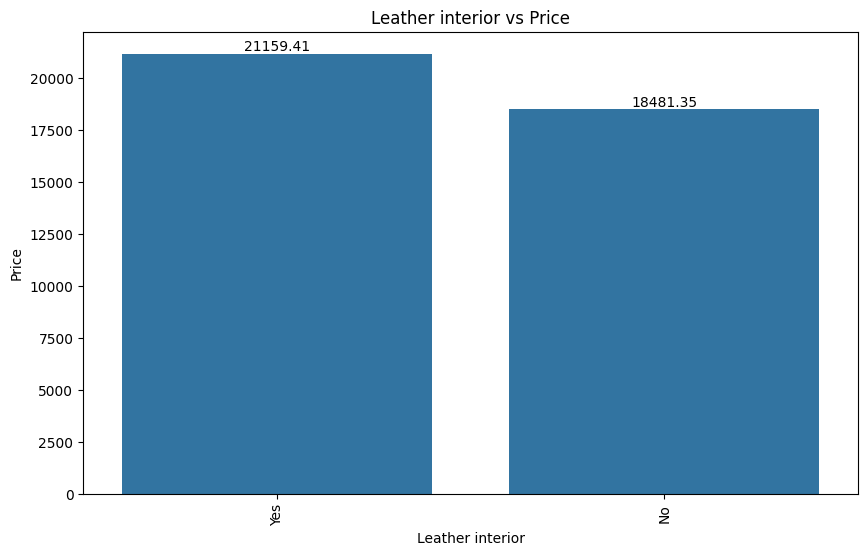

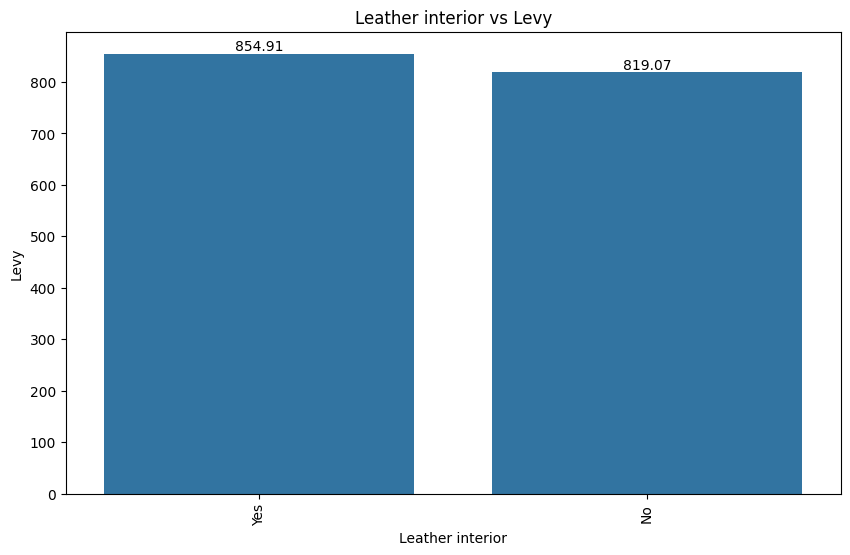

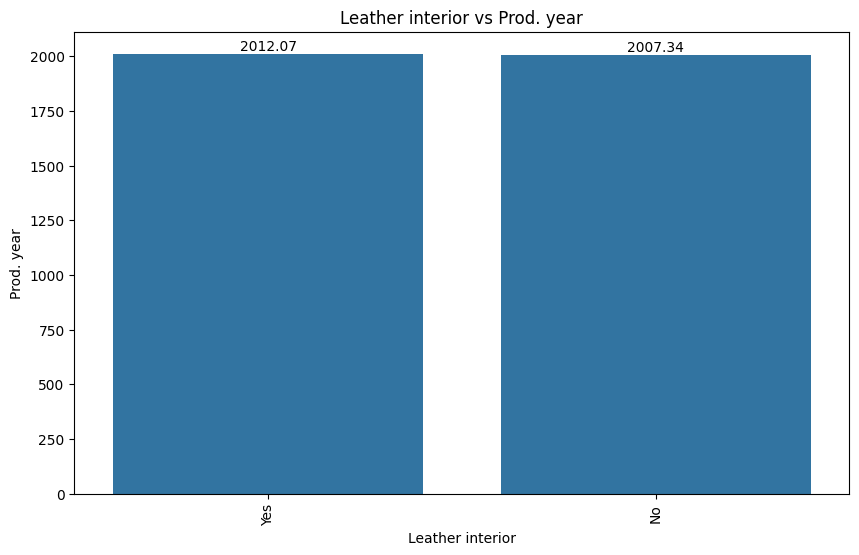

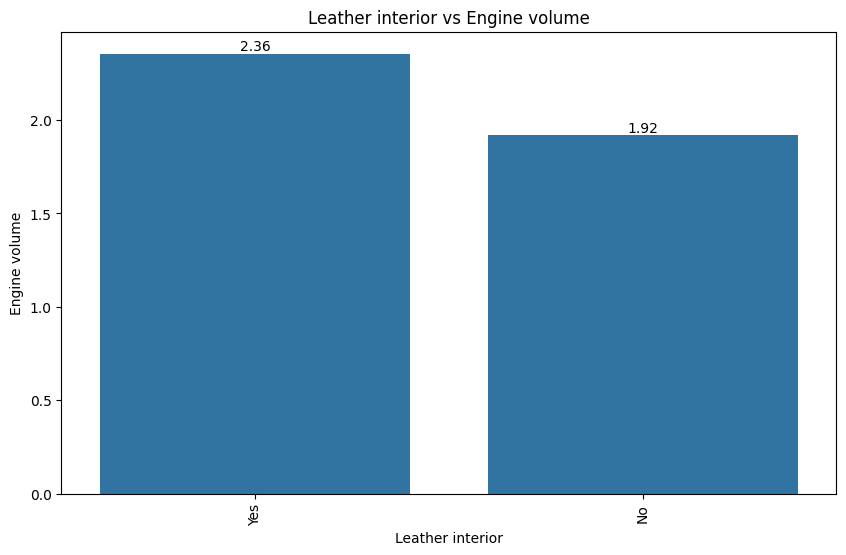

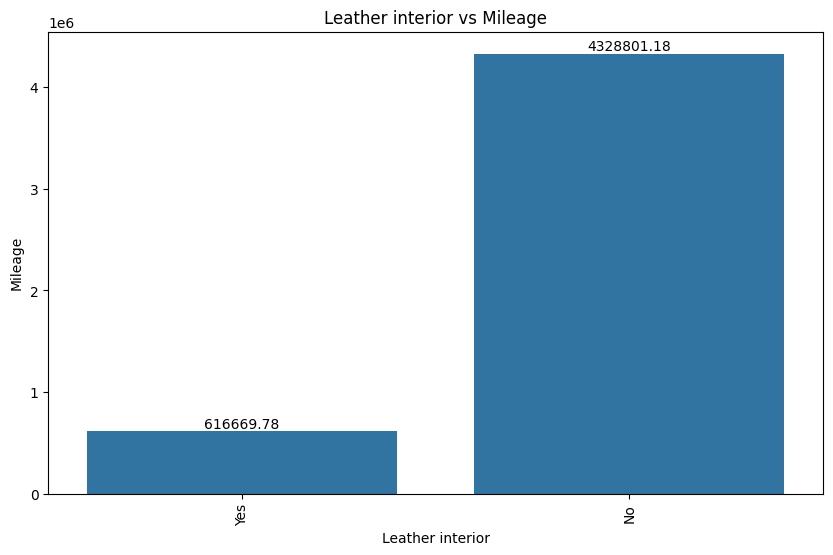

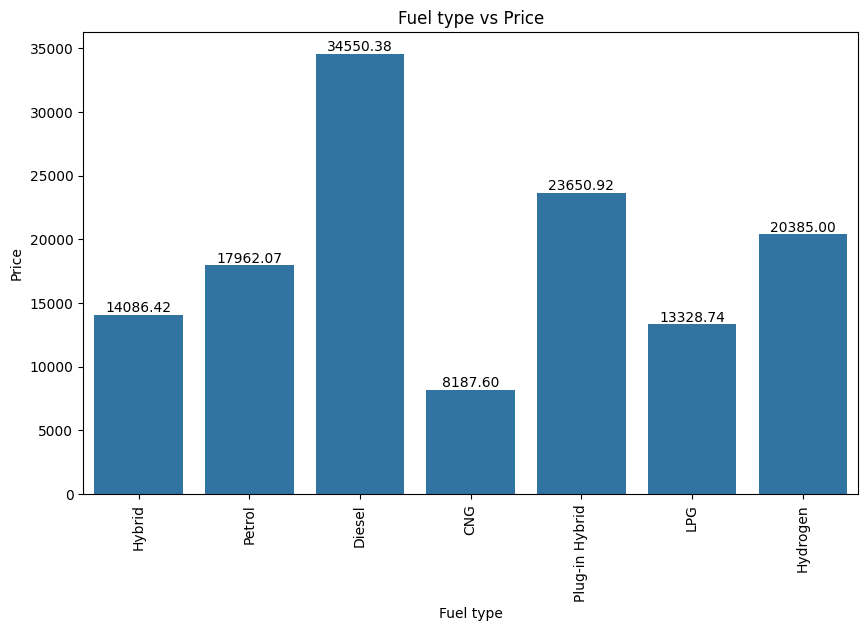

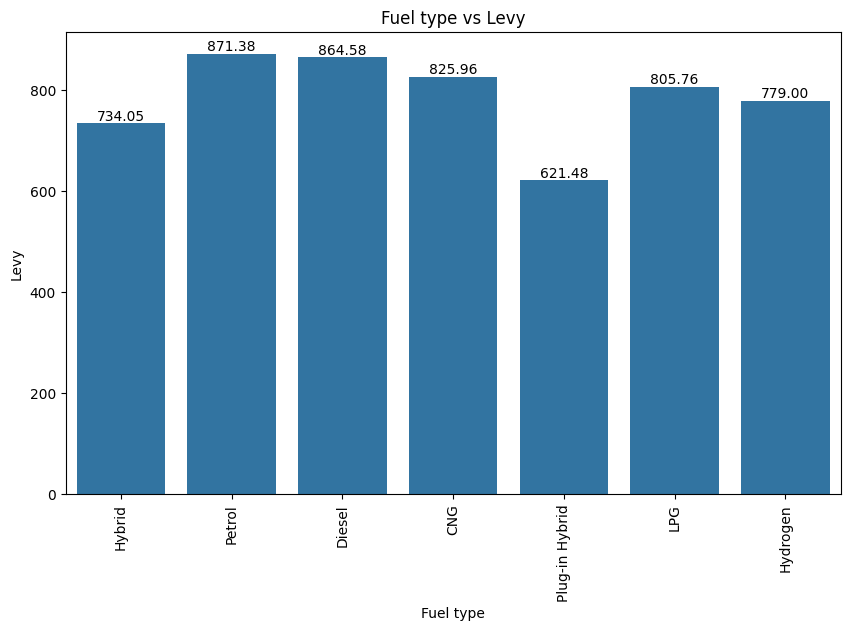

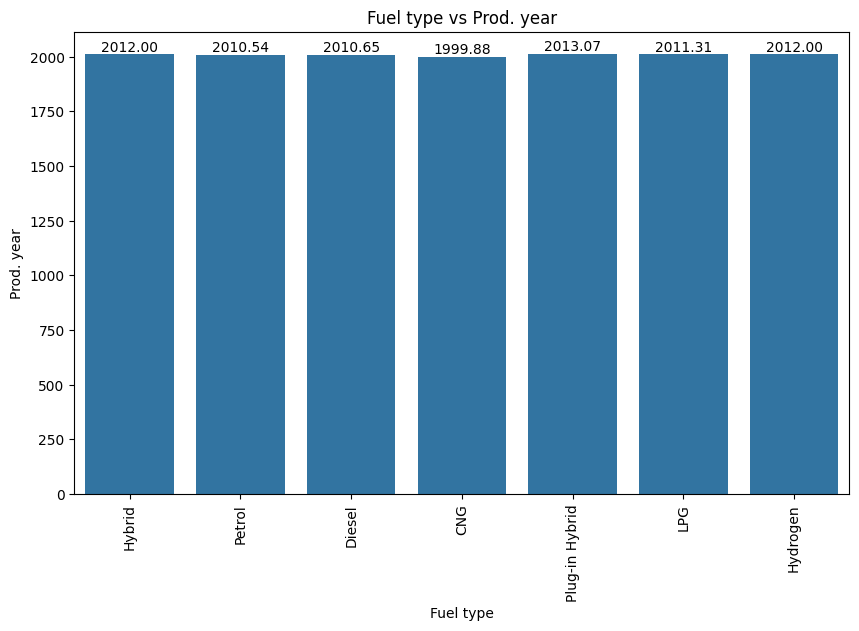

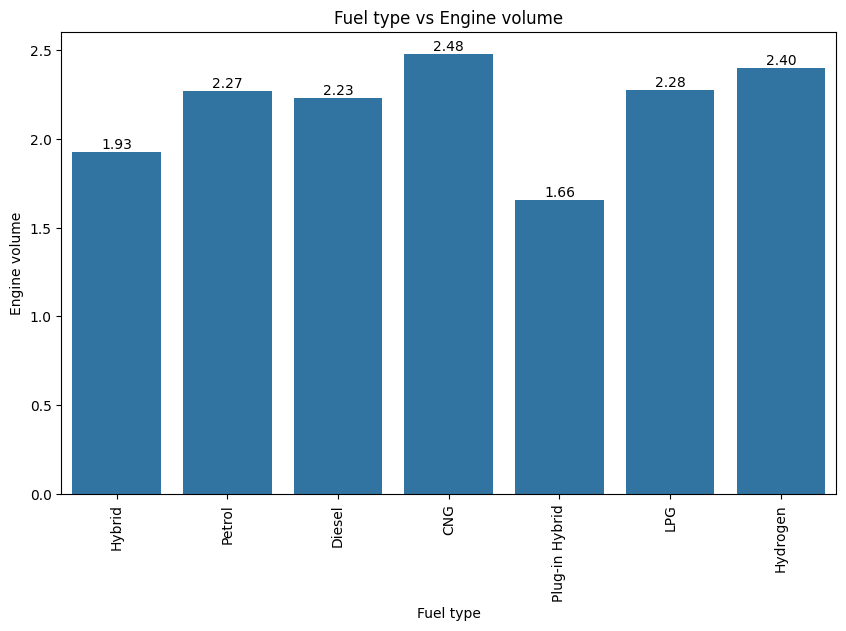

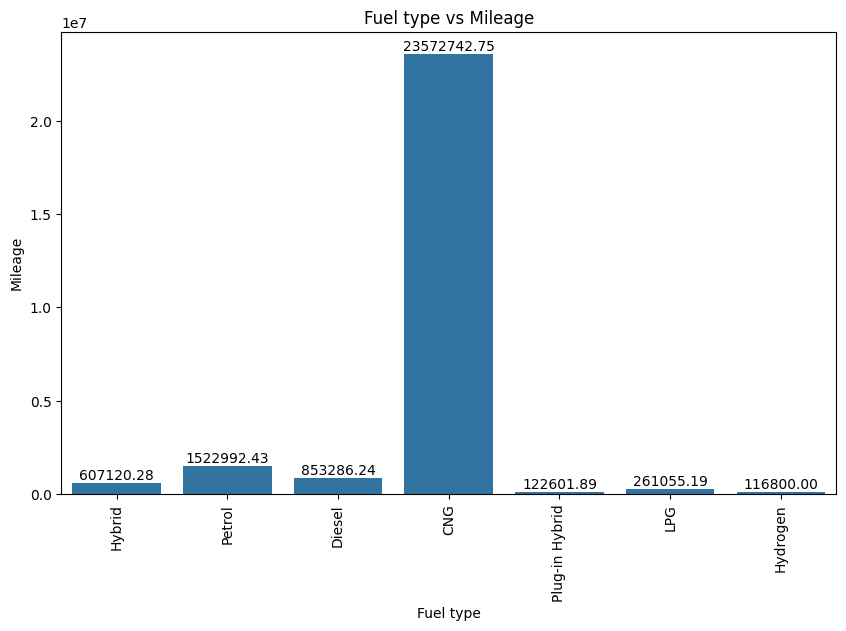

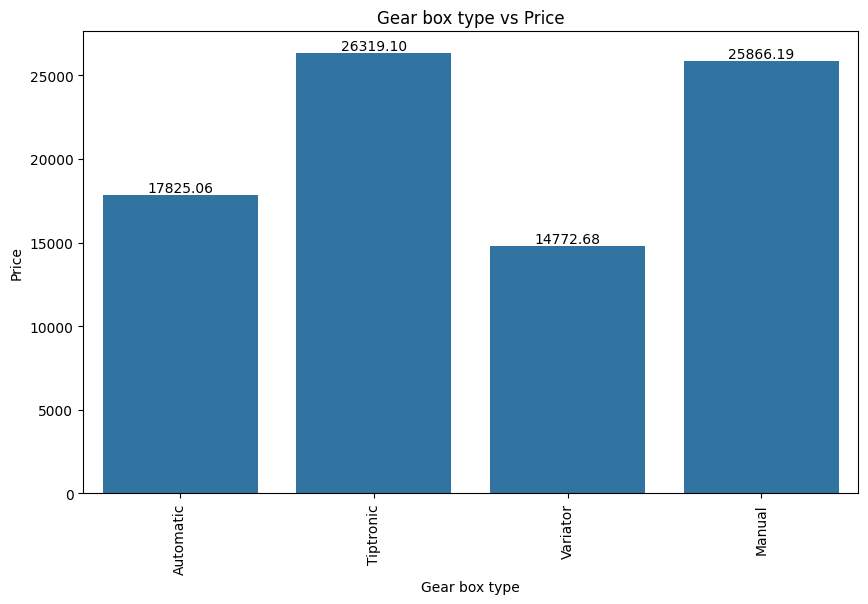

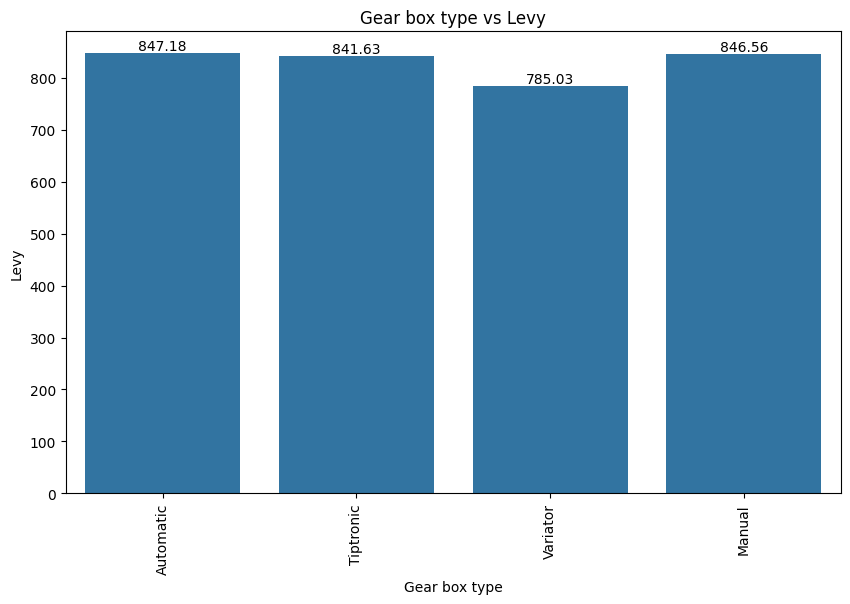

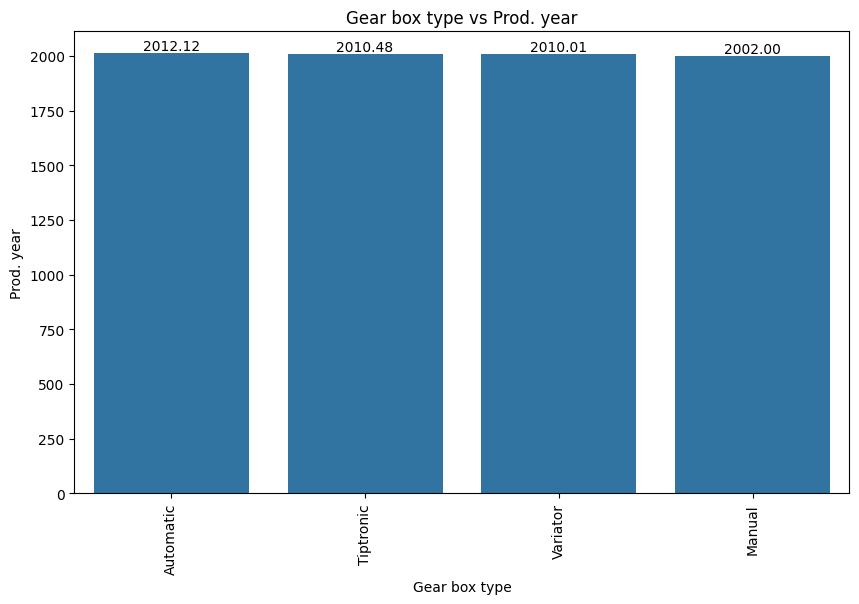

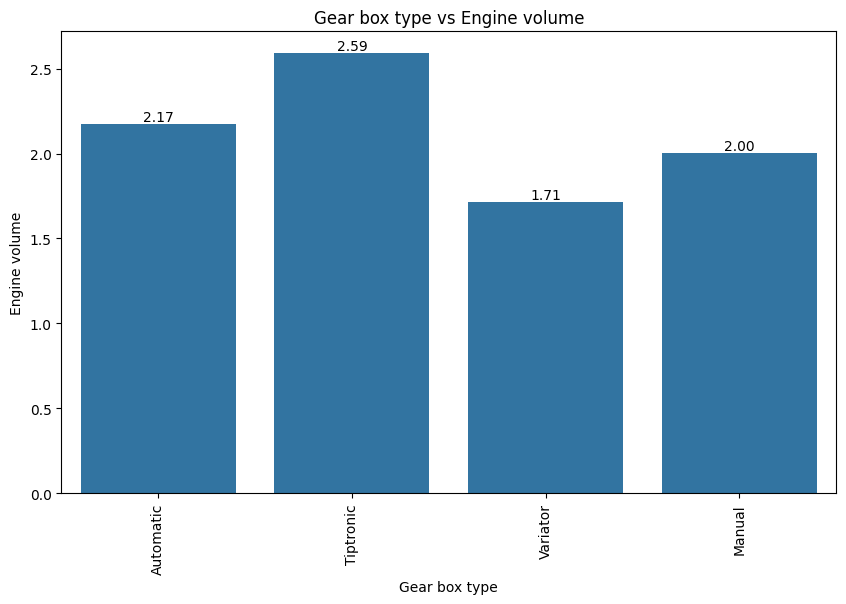

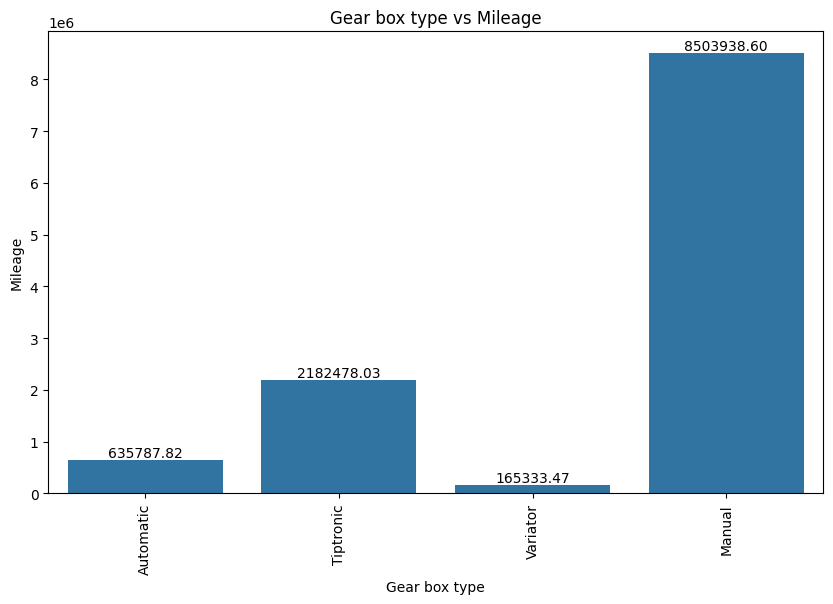

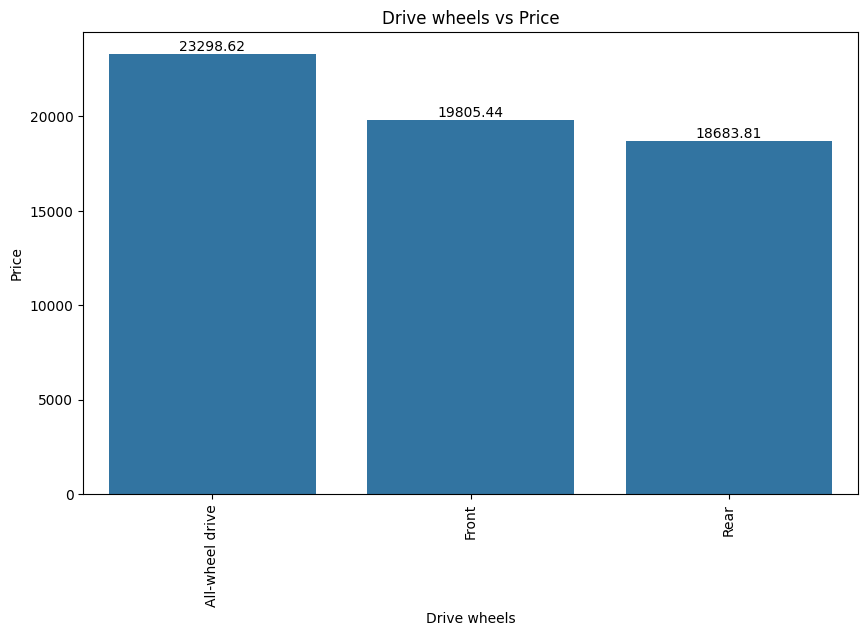

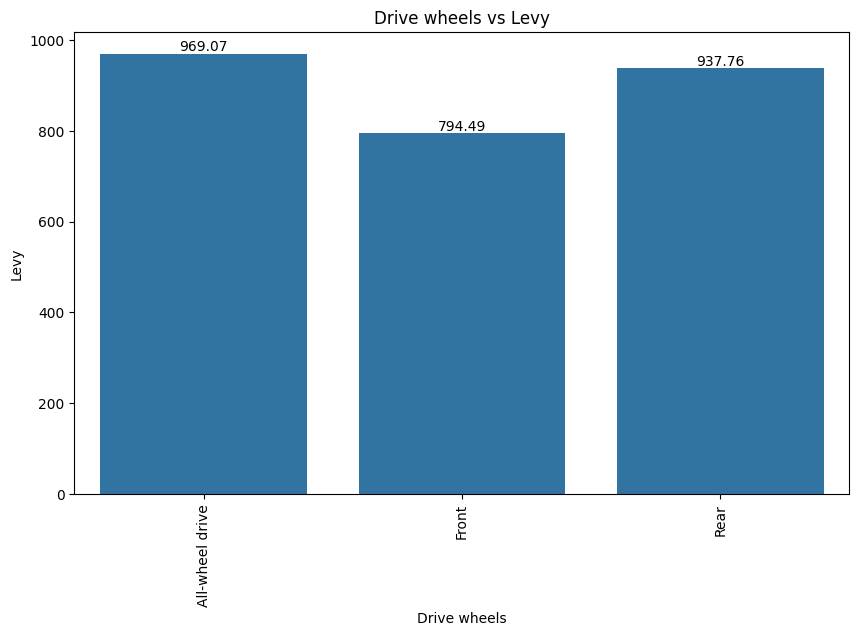

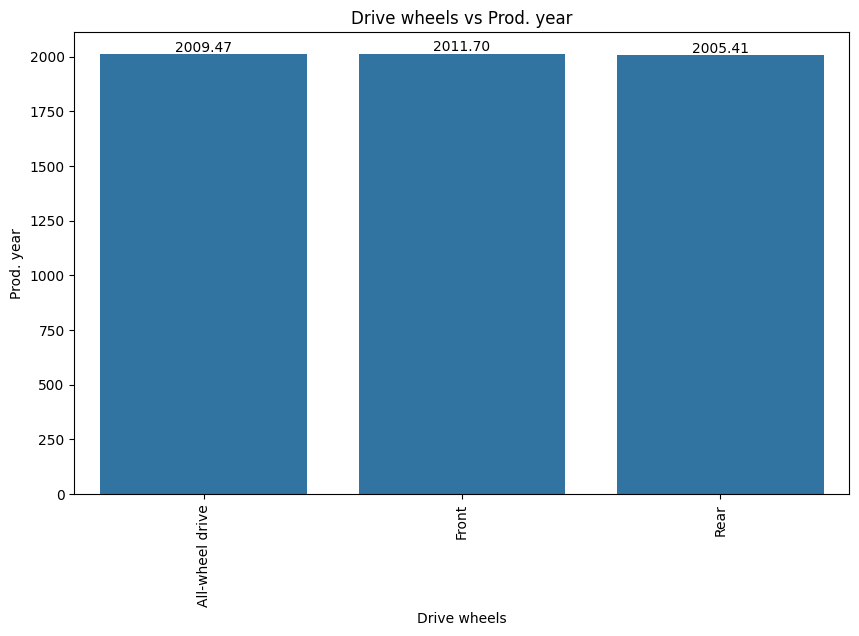

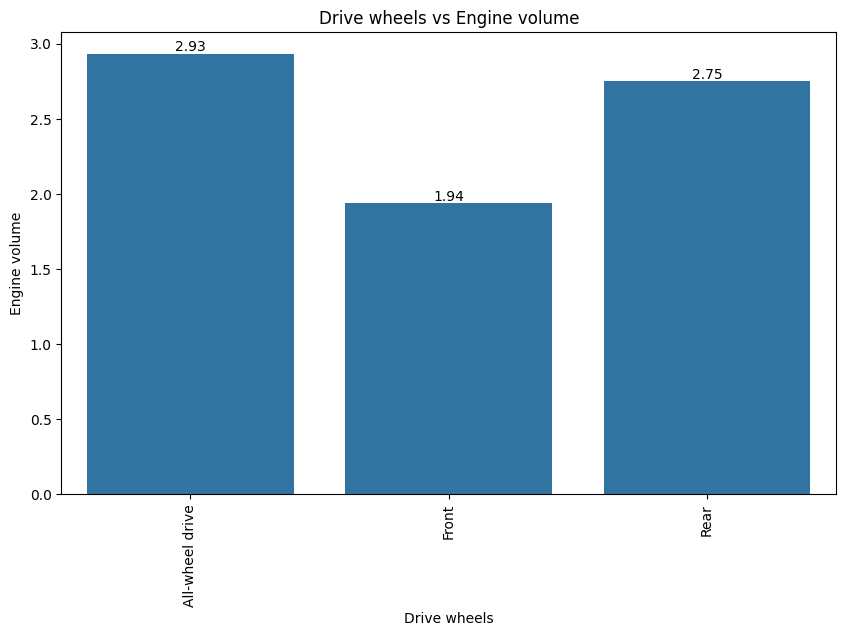

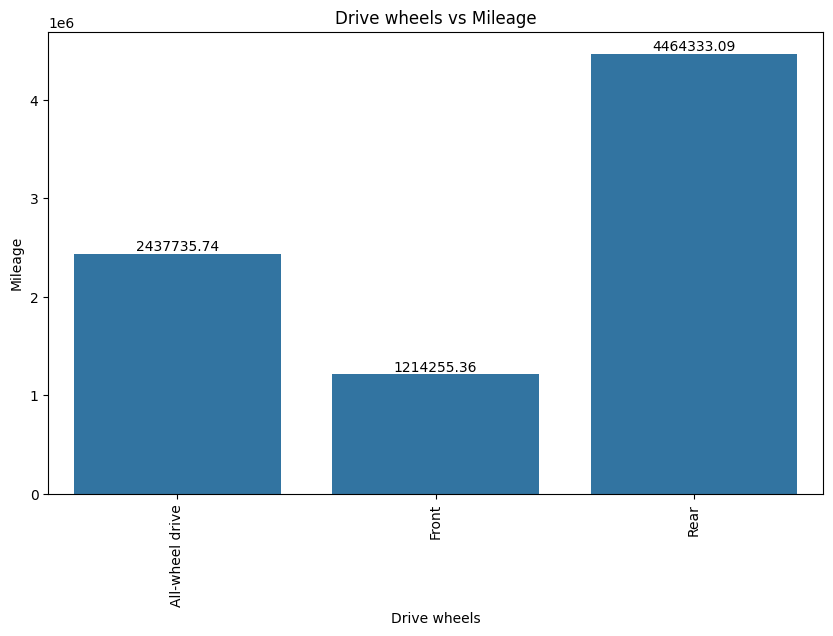

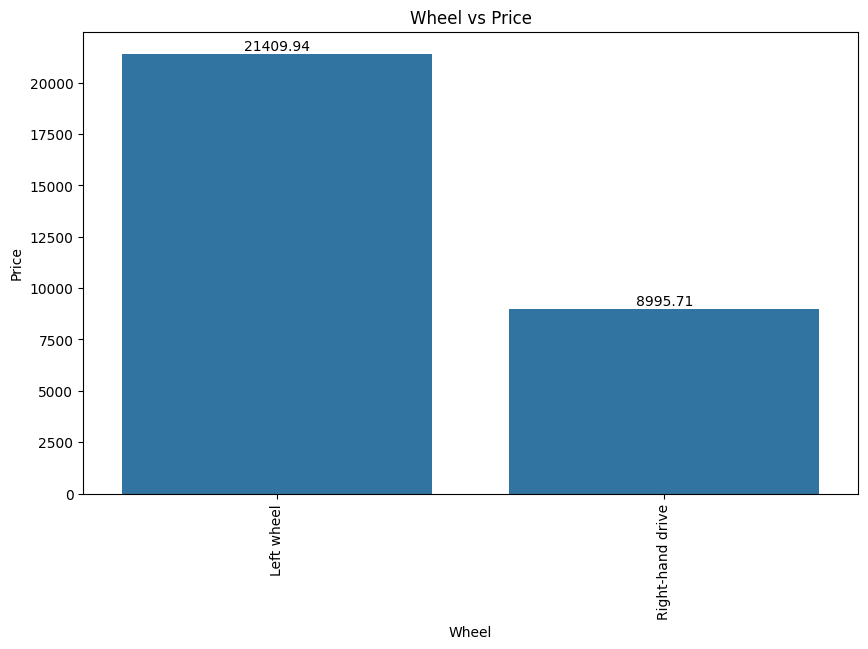

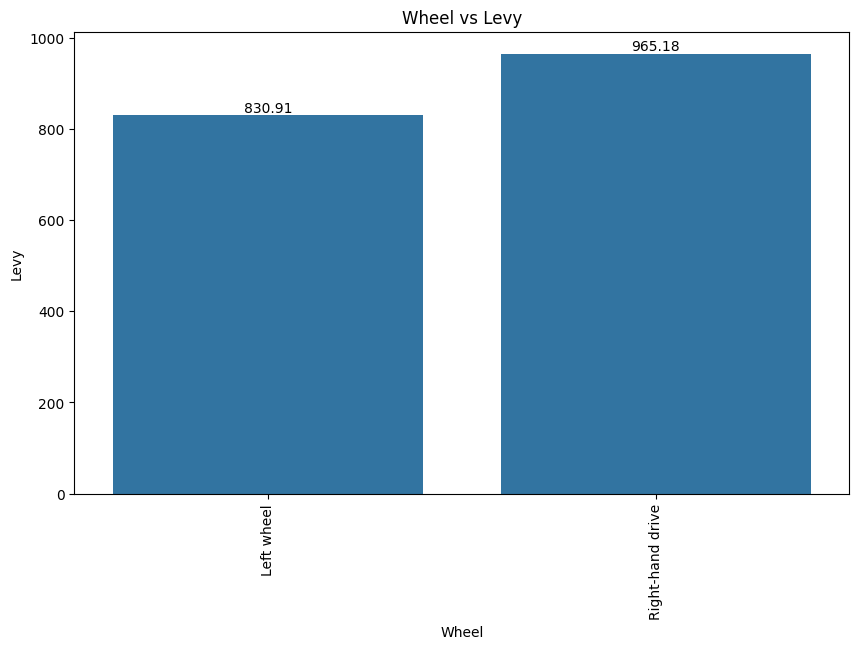

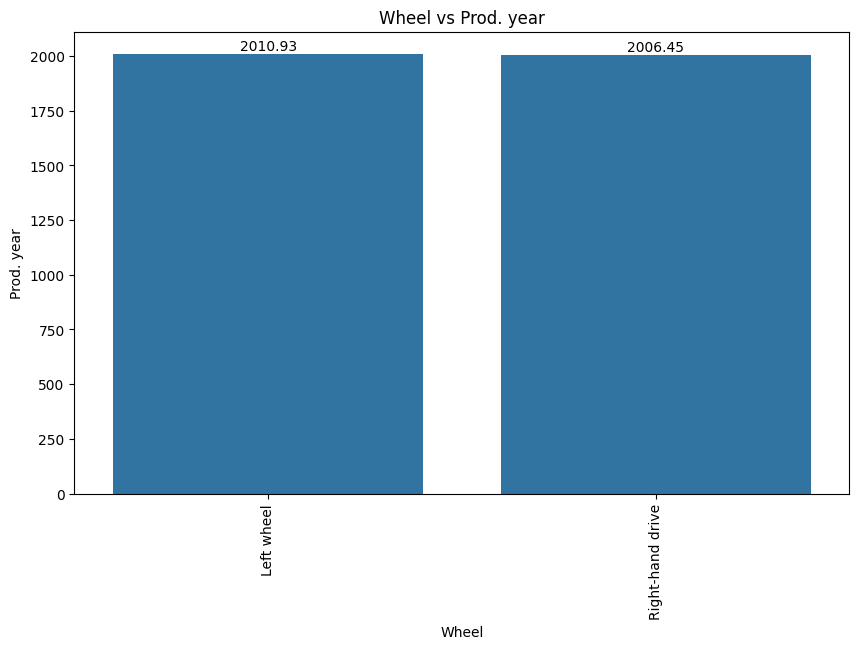

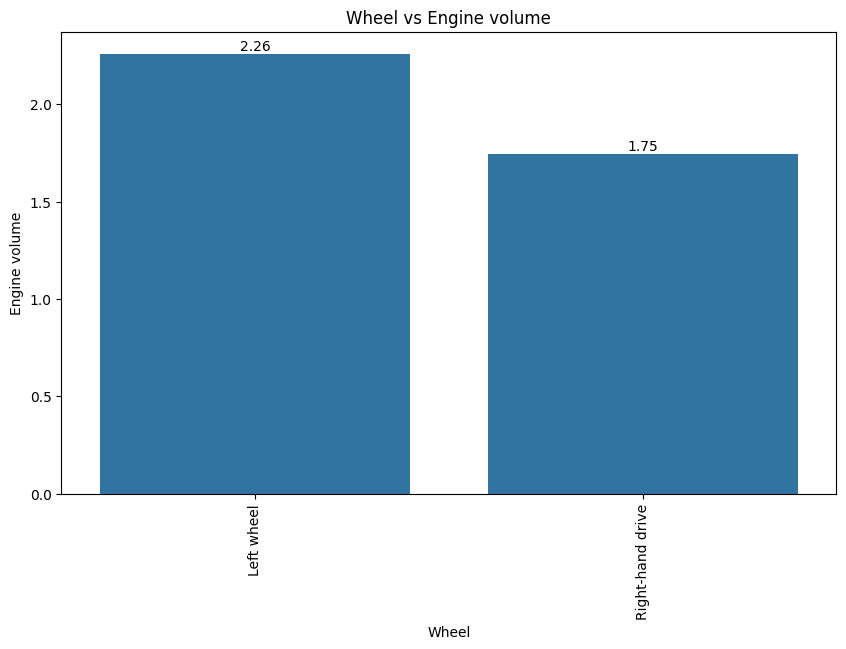

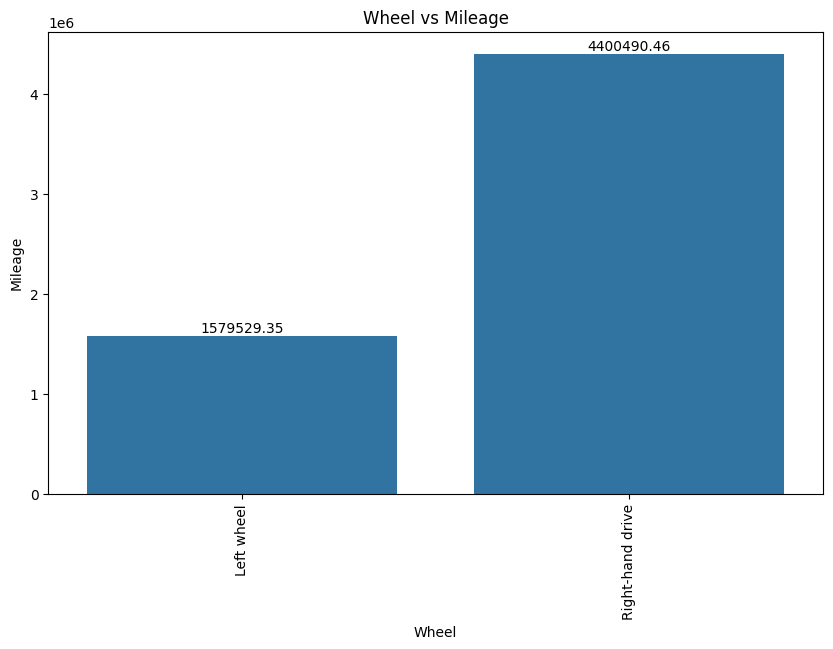

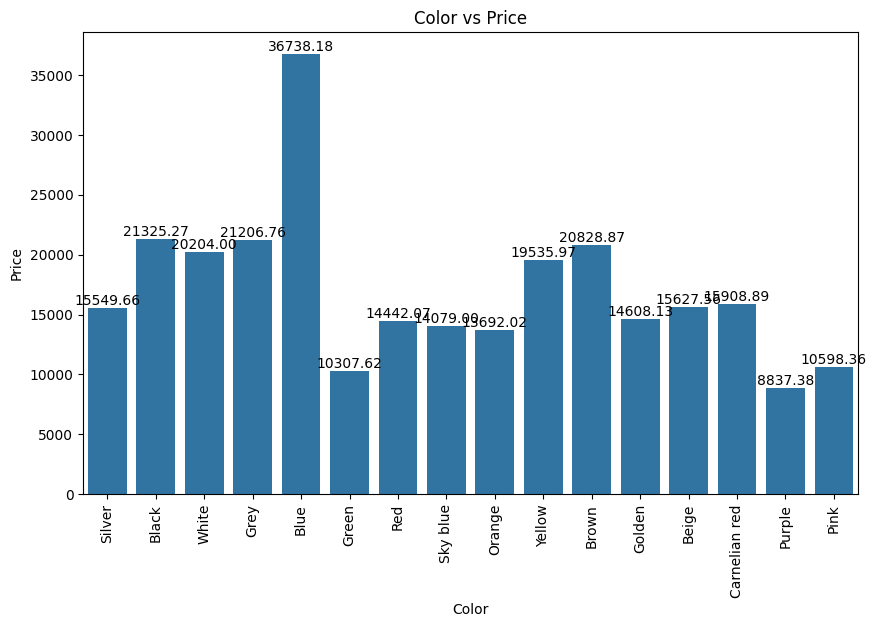

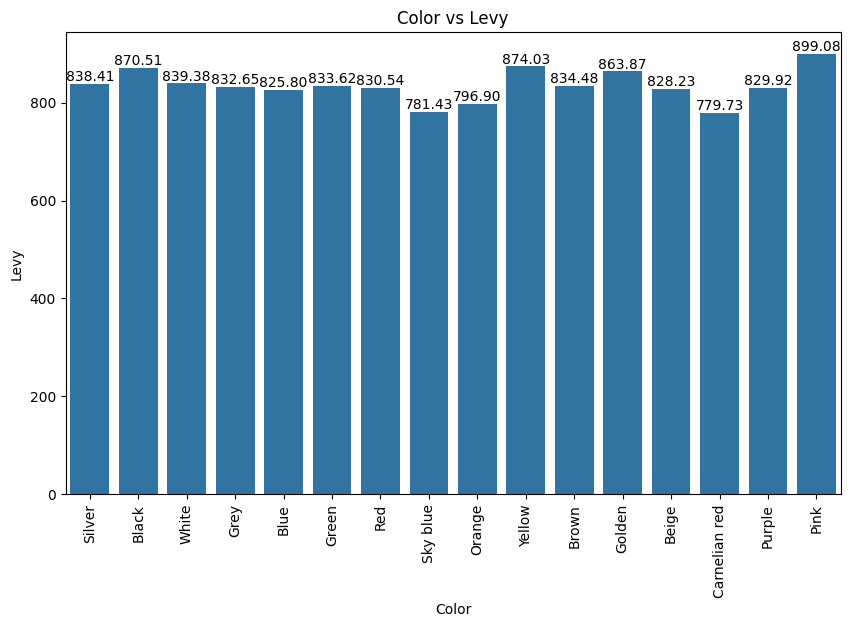

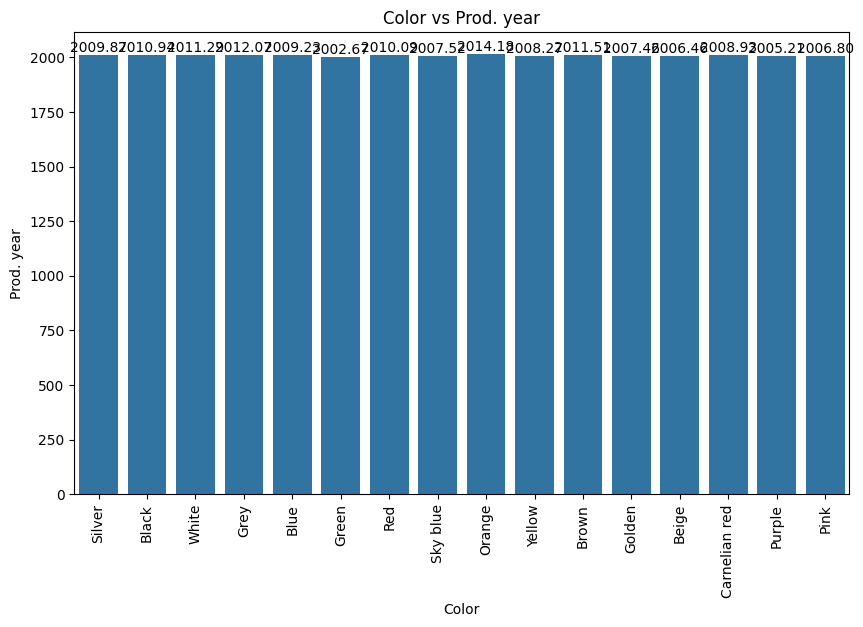

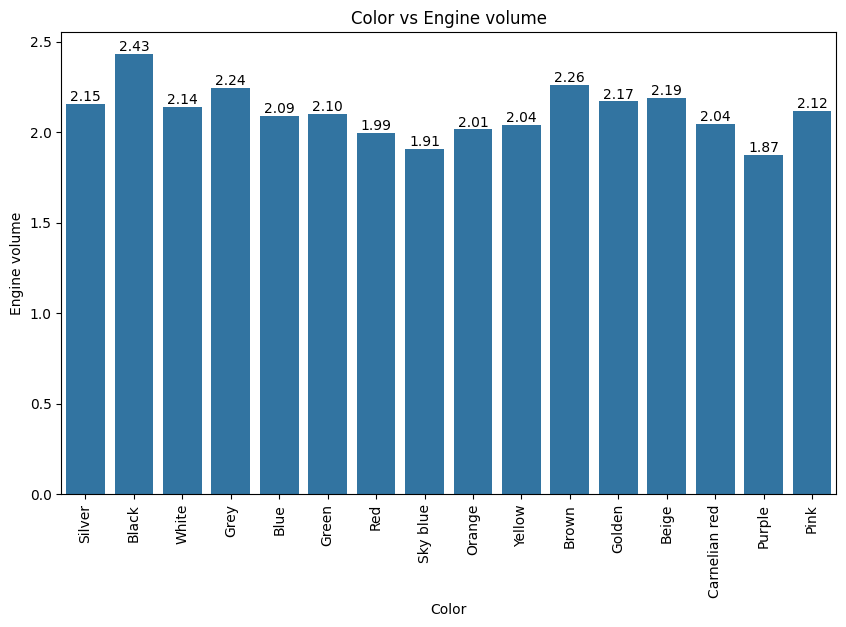

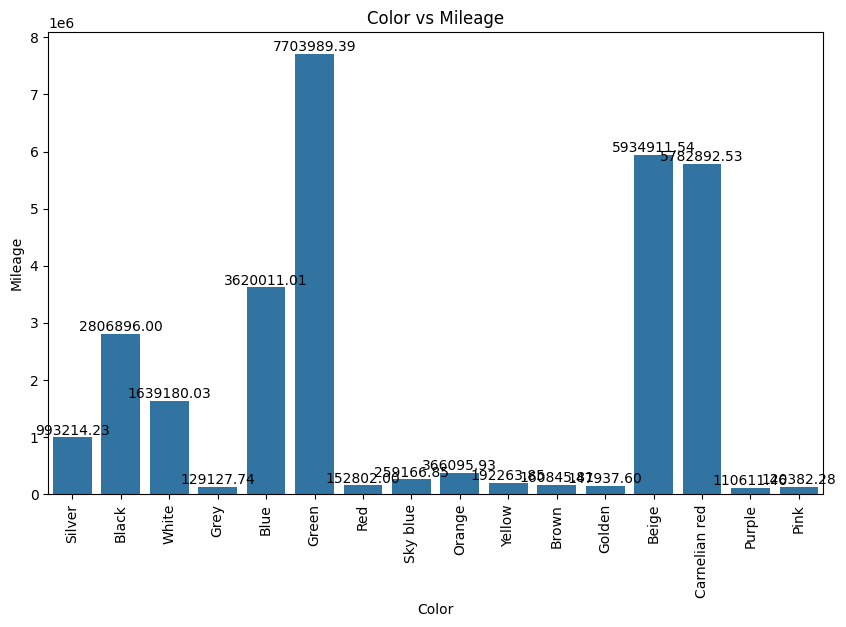

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

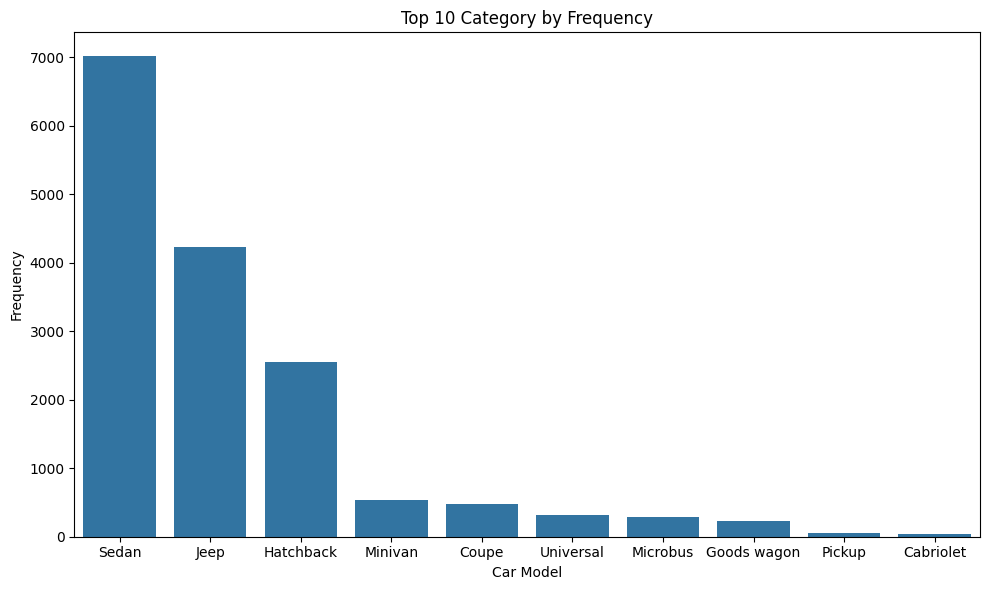

In [ ]:
n = 10
category_models = df['Category'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_models.index, y=category_models.values)
plt.title(f'Top {n} Category by Frequency')
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
avg_prices_by_car = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_prices_by_car)

Category
Goods wagon    124840.104803
Pickup          29362.392157
Jeep            26815.759763
Cabriolet       24407.971429
Universal       23273.816720
Coupe           22169.512605
Minivan         19124.661049
Microbus        18458.064407
Sedan           15712.898003
Hatchback       12140.744505
Limousine       11534.454545
Name: Price, dtype: float64


In [ ]:
max_prices_by_car = df.groupby('Category')['Price'].max().sort_values(ascending=False)
print(max_prices_by_car)

Category
Goods wagon    26307500
Universal        872946
Jeep             627220
Coupe            308906
Sedan            288521
Pickup           116036
Minivan          106668
Microbus          95000
Cabriolet         86142
Hatchback         78829
Limousine         30420
Name: Price, dtype: int64


In [ ]:
min_prices_by_car = df.groupby('Category')['Price'].min().sort_values(ascending=False)
print(min_prices_by_car)

Category
Universal      1490
Pickup          314
Limousine       150
Cabriolet       100
Microbus        100
Goods wagon      50
Minivan          50
Coupe             3
Jeep              3
Hatchback         1
Sedan             1
Name: Price, dtype: int64


In [ ]:
median_prices_by_car = df.groupby('Category')['Price'].median().sort_values(ascending=False)
print(median_prices_by_car)

Category
Jeep           22063.0
Pickup         21953.0
Microbus       15367.0
Minivan        15269.5
Cabriolet      15053.0
Universal      14768.0
Coupe          14113.0
Sedan          13485.0
Hatchback      10976.0
Limousine       9408.0
Goods wagon     8781.0
Name: Price, dtype: float64


In [ ]:
max_prices_by_car = df.groupby('Category')[['Price', 'Levy']].max().sort_values(by='Price', ascending=False)
print(max_prices_by_car)

                Price     Levy
Category                      
Goods wagon  26307500   3811.0
Universal      872946   5679.0
Jeep           627220   7536.0
Coupe          308906   4860.0
Sedan          288521  11714.0
Pickup         116036   3910.0
Minivan        106668   7063.0
Microbus        95000   2080.0
Cabriolet       86142   5877.0
Hatchback       78829   3141.0
Limousine       30420    779.0


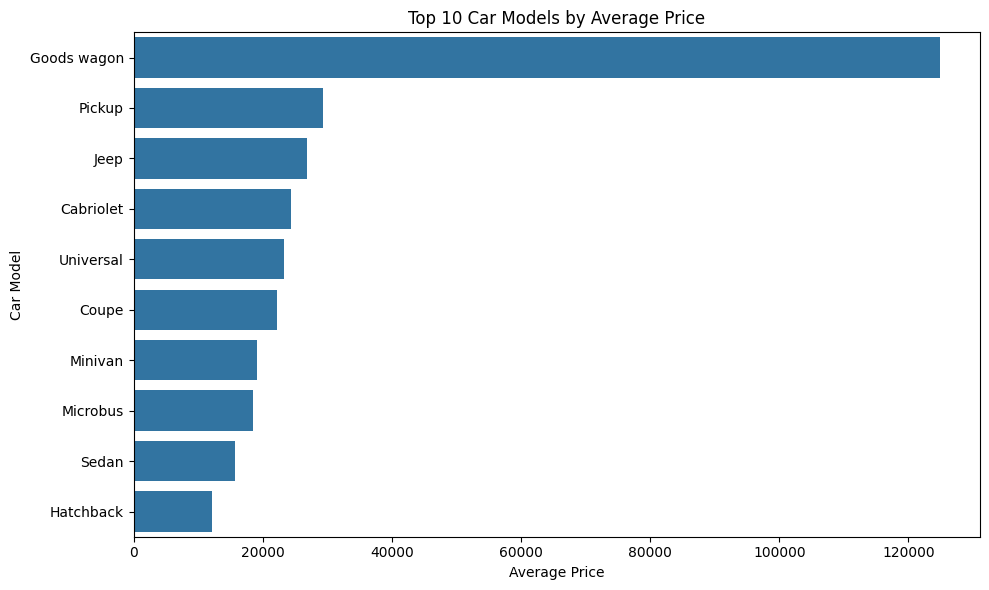

In [ ]:
avg_prices_by_car = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

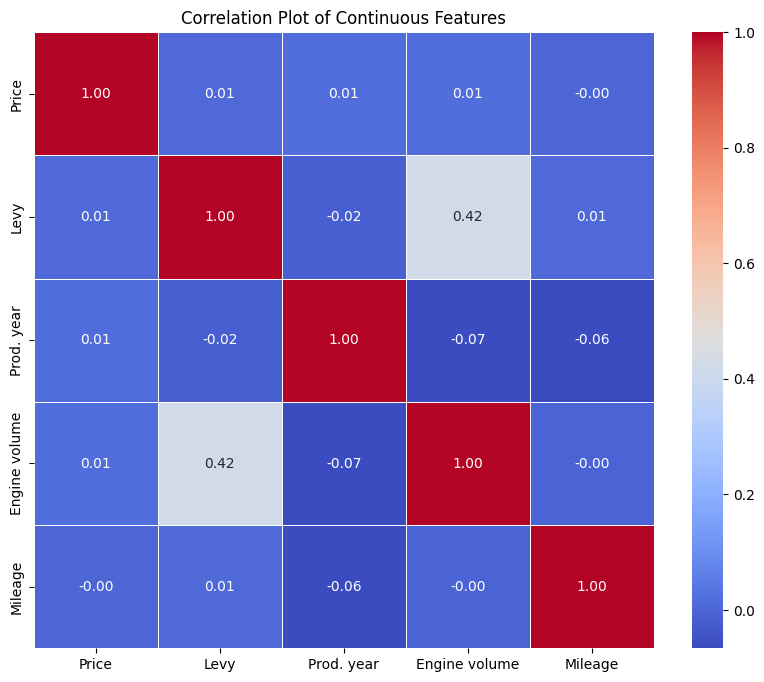

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

# Removing unnecessary features and creating dummies
 (sparse data - more no of zeroes)

In [ ]:
df


Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19230              Yes    Hybrid            1.8   307325          4   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  
0         Automatic  All-wheel drive        Left wheel  Silver       12  
1         Tiptronic  All-wheel drive        Left wheel   Black        8  
2          Variator            Front  Right-hand drive   Black        2  
3         Automatic  All-wheel drive        Left wheel   White        0  
4         Automatic            Front        Left wheel  Silver        4  
...             ...              ...               ...     ...      ...  
19230     Automatic            Front        Left wheel  Silver       12  
19232        Manual             Rear        Left wheel  Silver        5  
19233     Tiptronic            Front        Left wheel     Red        8  
19234     Automatic            Front        Left wheel    Grey        4  
19236     Automatic            Front        Left wheel   White       12  

[15725 rows x 16 columns]

In [ ]:
df['Color']

0        Silver
1         Black
2         Black
3         White
4        Silver
          ...  
19230    Silver
19232    Silver
19233       Red
19234      Grey
19236     White
Name: Color, Length: 15725, dtype: object

In [ ]:
x = ['Black', 'White','Silver']
for i in df['Color']:
    if i not in x:
        df['Color'] = 'Other'

In [ ]:
df['Color']

0        Other
1        Other
2        Other
3        Other
4        Other
         ...  
19230    Other
19232    Other
19233    Other
19234    Other
19236    Other
Name: Color, Length: 15725, dtype: object

In [ ]:
object_types = ['Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color']

In [ ]:
df_dummies = pd.get_dummies(df[object_types])

In [ ]:
df_dummies

Category_Cabriolet  Category_Coupe  Category_Goods wagon  \
0                   False           False                 False   
1                   False           False                 False   
2                   False           False                 False   
3                   False           False                 False   
4                   False           False                 False   
...                   ...             ...                   ...   
19230               False           False                 False   
19232               False            True                 False   
19233               False           False                 False   
19234               False           False                 False   
19236               False           False                 False   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
0                   False           True               False   
1                   False           True               False   
2                    True          False               False   
3                   False           True               False   
4                    True          False               False   
...                   ...            ...                 ...   
19230                True          False               False   
19232               False          False               False   
19233               False          False               False   
19234               False           True               False   
19236               False          False               False   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
0                  False             False            False           False   
1                  False             False            False           False   
2                  False             False            False           False   
3                  False             False            False           False   
4                  False             False            False           False   
...                  ...               ...              ...             ...   
19230              False             False            False           False   
19232              False             False            False           False   
19233              False             False            False            True   
19234              False             False            False           False   
19236              False             False            False            True   

       ...  Gear box type_Automatic  Gear box type_Manual  \
0      ...                     True                 False   
1      ...                    False                 False   
2      ...                    False                 False   
3      ...                     True                 False   
4      ...                     True                 False   
...    ...                      ...                   ...   
19230  ...                     True                 False   
19232  ...                    False                  True   
19233  ...                    False                 False   
19234  ...                     True                 False   
19236  ...                     True                 False   

       Gear box type_Tiptronic  Gear box type_Variator  \
0                        False                   False   
1                         True                   False   
2                        False                    True   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
19230                    False                   False   
19232                    False                   False   
19233                     True                   False   
19234                    False                   False   
19236                    False                   False   

       Drive wheels_All-wheel drive  Drive wheels_Fron

In [ ]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)

In [ ]:
df_final = df_final.drop('Model', axis = 1)

In [ ]:
df_final = df_final.drop('Manufacturer', axis = 1)

In [ ]:
df_final

Price    Levy  Prod. year  Engine volume  Mileage  Cylinders  Airbags  \
0      13328  1399.0        2010            3.5   186005          6       12   
1      16621  1018.0        2011            3.0   192000          6        8   
2       8467   779.0        2006            1.3   200000          4        2   
3       3607   862.0        2011            2.5   168966          4        0   
4      11726   446.0        2014            1.3    91901          4        4   
...      ...     ...         ...            ...      ...        ...      ...   
19230    470   645.0        2011            1.8   307325          4       12   
19232   8467   779.0        1999            2.0   300000          4        5   
19233  15681   831.0        2011            2.4   161600          4        8   
19234  26108   836.0        2010            2.0   116365          4        4   
19236    470   753.0        2012            2.4   186923          4       12   

       Category_Cabriolet  Category_Coupe  Category_Goods wagon  ...  \
0                   False           False                 False  ...   
1                   False           False                 False  ...   
2                   False           False                 False  ...   
3                   False           False                 False  ...   
4                   False           False                 False  ...   
...                   ...             ...                   ...  ...   
19230               False           False                 False  ...   
19232               False            True                 False  ...   
19233               False           False                 False  ...   
19234               False           False                 False  ...   
19236               False           False                 False  ...   

       Gear box type_Automatic  Gear box type_Manual  Gear box type_Tiptronic  \
0                         True                 False                    False   
1                        False                 False                     True   
2                        False                 False                    False   
3                         True                 False                    False   
4                         True                 False                    False   
...                        ...                   ...                      ...   
19230                     True                 False                    False   
19232                    False                  True                    False   
19233                    False                 False                     True   
19234                     True                 False                    False   
19236                     True                 False                    False   

       Gear box type_Variator  Drive wheels_All-wheel drive  \
0                       False                          True   
1                       False                          True   
2                        True                         False   
3                       False                          True   
4                       False                         False   
...                       ...                           ...   
19230                   False                         False   
19232                   False                         False   
19233                   False                         False   
19234                   False                         False   
19236                   False                         False   

       Drive wheels_Front  Drive wheels_Rear  Wheel_Left wheel  \
0                   False              False              True   
1                   False              False              True   
2                    True              False             False   
3                   False              False              True   
4                    True              False              True   
...                   ...                ...           

In [ ]:
df1 = df_final.copy()

In [ ]:
X = df1.drop('Price', axis = 1)
y = df1['Price']

# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
y_pred_train = lr_model.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 55005596976.341354


#Soo High Error, we have to reduce this by log-scaling : Linear Regression

In [ ]:
df2 = df_final.copy()

In [ ]:
for feature in continuous:
    df2[feature + '_log'] = np.log(df2[feature]+1)

In [ ]:
df2 = df2.drop(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage'], axis = 1)

In [ ]:
df2

Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0              6       12               False           False   
1              6        8               False           False   
2              4        2               False           False   
3              4        0               False           False   
4              4        4               False           False   
...          ...      ...                 ...             ...   
19230          4       12               False           False   
19232          4        5               False            True   
19233          4        8               False           False   
19234          4        4               False           False   
19236          4       12               False           False   

       Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                     False               False           True   
1                     False               False           True   
2                     False                True          False   
3                     False               False           True   
4                     False                True          False   
...                     ...                 ...            ...   
19230                 False                True          False   
19232                 False               False          False   
19233                 False               False          False   
19234                 False               False           True   
19236                 False               False          False   

       Category_Limousine  Category_Microbus  Category_Minivan  ...  \
0                   False              False             False  ...   
1                   False              False             False  ...   
2                   False              False             False  ...   
3                   False              False             False  ...   
4                   False              False             False  ...   
...                   ...                ...               ...  ...   
19230               False              False             False  ...   
19232               False              False             False  ...   
19233               False              False             False  ...   
19234               False              False             False  ...   
19236               False              False             False  ...   

       Drive wheels_Front  Drive wheels_Rear  Wheel_Left wheel  \
0                   False              False              True   
1                   False              False              True   
2                    True              False             False   
3                   False              False              True   
4                    True              False              True   
...                   ...                ...               ...   
19230                True              False              True   
19232               False               True              True   
19233                True              False              True   
19234                True              False              True   
19236                True              False              True   

       Wheel_Right-hand drive  Color_Other  Price_log  Levy_log  \
0                       False         True   9.497697  7.244228   
1                       False         True   9.718482  6.926577   
2                        True         True   9.044050  6.659294   
3                       False         True   8.190909  6.760415   
4                       False         True   9.369649  6.102559   
...                       ...          ...        ...       ...   
19230                   False         True   6.154858  6.470800   
19232                   False         True   9.044050  6.659294   
19233                   False         True   9.660269  6.723832   
19234                   False         True  10.170035  6.729824   
19236                   False         True   6.154

In [ ]:
X = df2.drop('Price_log', axis = 1)
y = df2['Price_log']

In [ ]:
df2

Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0              6       12               False           False   
1              6        8               False           False   
2              4        2               False           False   
3              4        0               False           False   
4              4        4               False           False   
...          ...      ...                 ...             ...   
19230          4       12               False           False   
19232          4        5               False            True   
19233          4        8               False           False   
19234          4        4               False           False   
19236          4       12               False           False   

       Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                     False               False           True   
1                     False               False           True   
2                     False                True          False   
3                     False               False           True   
4                     False                True          False   
...                     ...                 ...            ...   
19230                 False                True          False   
19232                 False               False          False   
19233                 False               False          False   
19234                 False               False           True   
19236                 False               False          False   

       Category_Limousine  Category_Microbus  Category_Minivan  ...  \
0                   False              False             False  ...   
1                   False              False             False  ...   
2                   False              False             False  ...   
3                   False              False             False  ...   
4                   False              False             False  ...   
...                   ...                ...               ...  ...   
19230               False              False             False  ...   
19232               False              False             False  ...   
19233               False              False             False  ...   
19234               False              False             False  ...   
19236               False              False             False  ...   

       Drive wheels_Front  Drive wheels_Rear  Wheel_Left wheel  \
0                   False              False              True   
1                   False              False              True   
2                    True              False             False   
3                   False              False              True   
4                    True              False              True   
...                   ...                ...               ...   
19230                True              False              True   
19232               False               True              True   
19233                True              False              True   
19234                True              False              True   
19236                True              False              True   

       Wheel_Right-hand drive  Color_Other  Price_log  Levy_log  \
0                       False         True   9.497697  7.244228   
1                       False         True   9.718482  6.926577   
2                        True         True   9.044050  6.659294   
3                       False         True   8.190909  6.760415   
4                       False         True   9.369649  6.102559   
...                       ...          ...        ...       ...   
19230                   False         True   6.154858  6.470800   
19232                   False         True   9.044050  6.659294   
19233                   False         True   9.660269  6.723832   
19234                   False         True  10.170035  6.729824   
19236                   False         True   6.154

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
y_pred_train = lr_model.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.6402042929738025


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.8158785937564839


# Using Ridge and check the MSE score

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Ridge): 1.9083524074973657


# Using Lasso and check the MSE score

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

Mean Squared Error (Lasso): 2.2093760268893496


**Here, Lasso score is more than Ridge and Linear regression.** \\
**For this case, Linear regression model works well.**